# 1. Isabel's Method

## Ising 1D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms, build_matrix_from_terms

method = 'Le'
num_sites = 6
degree = 2
n_repetitions = 6
n_id_layers = 0
J=1.0

# Ising-1d
t = 0.25
g=0.75
h=0.6
system = 'ising-1d'

terms, params = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=J, g=g, h=h)

J = params['J']
h = params['h']
g = params['g']


2. Get Trotterised brickwall gates

In [3]:
from ropt_aqc.spin_systems import get_brickwall_trotter_gates_spin_chain

gates_ising = get_brickwall_trotter_gates_spin_chain(t=t, n_sites=num_sites, n_repetitions=n_repetitions, hamiltonian=system, degree=degree, J=J, g=g, h=h)

In [4]:
# Matrices for qc
import numpy as np
from ropt_aqc.brickwall_circuit import get_initial_gates

gates_initial = get_initial_gates(n_sites=num_sites, t=t, n_repetitions=n_repetitions, degree=degree, hamiltonian=system, n_id_layers=n_id_layers, use_TN=False, J=-J, g=g, h=h)
print(np.array(gates_initial).shape) 
print(gates_initial)

(33, 4, 4)
[[[ 9.99845252e-01+2.08398802e-03j -9.76452826e-05-7.81057972e-03j
   -9.76495209e-05-1.56234014e-02j -1.22051301e-04-8.47604798e-07j]
  [-9.76452826e-05-7.81057972e-03j  9.99480709e-01-2.70788996e-02j
   -1.22051301e-04+8.47657775e-07j  9.76325684e-05-1.56206891e-02j]
  [-9.76495209e-05-1.56234014e-02j -1.22051301e-04+8.47657775e-07j
    9.99741092e-01-1.45818201e-02j  9.76368065e-05-7.80990165e-03j]
  [-1.22051301e-04-8.47604798e-07j  9.76325684e-05-1.56206891e-02j
    9.76368065e-05-7.80990165e-03j  9.99064144e-01+3.95702223e-02j]]

 [[ 9.99904246e-01+8.33332115e-03j -4.88250850e-05-7.81175263e-03j
   -4.88250850e-05-7.81175263e-03j -6.10287049e-05-4.23821748e-07j]
  [-4.88250850e-05-7.81175263e-03j  9.99721965e-01-2.08314025e-02j
   -6.10287048e-05+4.23834993e-07j  4.88208467e-05-7.81107451e-03j]
  [-4.88250850e-05-7.81175263e-03j -6.10287048e-05+4.23834993e-07j
    9.99721965e-01-2.08314025e-02j  4.88208467e-05-7.81107451e-03j]
  [-6.10287049e-05-4.23821748e-07j  4.8820

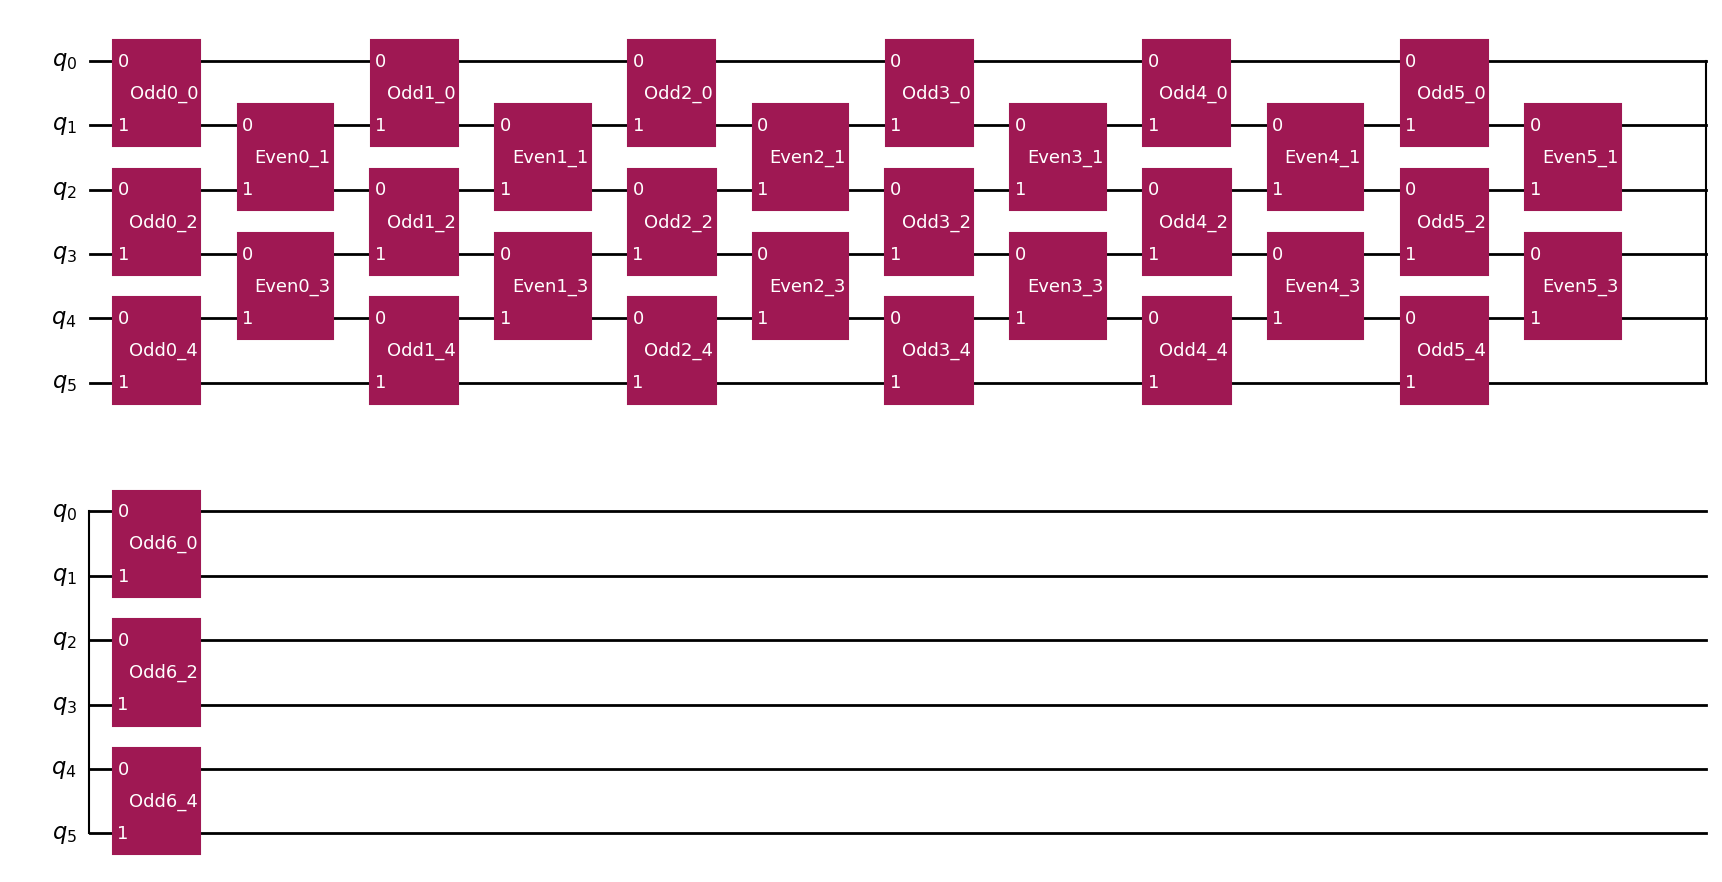

In [5]:
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate

qc_initial = transform_to_bw_qc_unitarygate(num_sites=num_sites, n_repetitions=n_repetitions, system = system, gates=gates_initial)
depth = qc_initial.depth()
qc_initial.draw('mpl')

# from qiskit.visualization import circuit_drawer
# Save the circuit diagram as a PDF or PNG
# circuit_drawer(qc_initial, output='mpl', filename='qc_bw_ising.pdf')  


In [6]:
import jax.numpy as jnp
# TN for optimisation
from ropt_aqc.brickwall_circuit import get_initial_gates
gates = get_initial_gates(n_sites=num_sites, t=t, n_repetitions=n_repetitions, degree=degree, hamiltonian=system, n_id_layers=n_id_layers, use_TN=True, J=J, g=g, h=h)
print(np.array(gates).shape)  # Should be (N, 4, 4) for 2-qubit gates
print(gates)
# print("Gate[0] norm:", jnp.linalg.norm(gates[0].reshape(4, 4)))


(33, 2, 2, 2, 2)
[[[[[ 9.99064144e-01-3.95702223e-02j -9.76368065e-05-7.80990165e-03j]
    [-9.76325684e-05-1.56206891e-02j -1.22051301e-04+8.47604798e-07j]]

   [[-9.76368065e-05-7.80990165e-03j  9.99741092e-01+1.45818201e-02j]
    [-1.22051301e-04-8.47657775e-07j  9.76495209e-05-1.56234014e-02j]]]


  [[[-9.76325684e-05-1.56206891e-02j -1.22051301e-04-8.47657775e-07j]
    [ 9.99480709e-01+2.70788996e-02j  9.76452826e-05-7.81057972e-03j]]

   [[-1.22051301e-04+8.47604798e-07j  9.76495209e-05-1.56234014e-02j]
    [ 9.76452826e-05-7.81057972e-03j  9.99845252e-01-2.08398802e-03j]]]]



 [[[[ 9.99383474e-01-3.33262290e-02j -4.88208467e-05-7.81107451e-03j]
    [-4.88208467e-05-7.81107451e-03j -6.10287049e-05+4.23821748e-07j]]

   [[-4.88208467e-05-7.81107451e-03j  9.99721965e-01+2.08314025e-02j]
    [-6.10287048e-05-4.23834993e-07j  4.88250850e-05-7.81175263e-03j]]]


  [[[-4.88208467e-05-7.81107451e-03j -6.10287048e-05-4.23834993e-07j]
    [ 9.99721965e-01+2.08314025e-02j  4.88250850e-05-

In [7]:
from ropt_aqc.brickwall_circuit import get_gates_per_layer
import jax.numpy as jnp
from itertools import chain

N = depth

gates_per_layer, gate_sites_per_layer, layer_is_odd = get_gates_per_layer(
    gates, n_sites=num_sites, degree=degree, n_repetitions=n_repetitions, hamiltonian=system
)

for i, layer in enumerate(gates_per_layer[:N]):
    print(f"Layer {i} ({'odd' if layer_is_odd[i] else 'even'}), #gates: {len(layer)}")
gates_layer_structure = [len(layer) for layer in gates_per_layer[:N]]

gates_subset = gates_per_layer[:N]
layer_is_odd_subset = layer_is_odd[:N]
gates_subset = list(chain(*gates_per_layer[:N]))
gates_subset = jnp.asarray(gates_subset)
print(np.array(gates_subset).shape)


Layer 0 (odd), #gates: 3
Layer 1 (even), #gates: 2
Layer 2 (odd), #gates: 3
Layer 3 (even), #gates: 2
Layer 4 (odd), #gates: 3
Layer 5 (even), #gates: 2
Layer 6 (odd), #gates: 3
Layer 7 (even), #gates: 2
Layer 8 (odd), #gates: 3
Layer 9 (even), #gates: 2
Layer 10 (odd), #gates: 3
Layer 11 (even), #gates: 2
Layer 12 (odd), #gates: 3
(33, 2, 2, 2, 2)


In [8]:
print(gates_per_layer)

[Array([[[[[ 9.99064144e-01-3.95702223e-02j,
           -9.76368065e-05-7.80990165e-03j],
          [-9.76325684e-05-1.56206891e-02j,
           -1.22051301e-04+8.47604798e-07j]],

         [[-9.76368065e-05-7.80990165e-03j,
            9.99741092e-01+1.45818201e-02j],
          [-1.22051301e-04-8.47657775e-07j,
            9.76495209e-05-1.56234014e-02j]]],


        [[[-9.76325684e-05-1.56206891e-02j,
           -1.22051301e-04-8.47657775e-07j],
          [ 9.99480709e-01+2.70788996e-02j,
            9.76452826e-05-7.81057972e-03j]],

         [[-1.22051301e-04+8.47604798e-07j,
            9.76495209e-05-1.56234014e-02j],
          [ 9.76452826e-05-7.81057972e-03j,
            9.99845252e-01-2.08398802e-03j]]]],



       [[[[ 9.99383474e-01-3.33262290e-02j,
           -4.88208467e-05-7.81107451e-03j],
          [-4.88208467e-05-7.81107451e-03j,
           -6.10287049e-05+4.23821748e-07j]],

         [[-4.88208467e-05-7.81107451e-03j,
            9.99721965e-01+2.08314025e-02j],
    

In [9]:
from ropt_aqc.save_model import load_reference
import os
import yaml
repo_root = "/Users/aag/Documents/ropt-aqc/"
config_file = os.path.join(repo_root, "run", system, "configs", "config.yml") 

with open(config_file, "r") as f:
    config = yaml.safe_load(f)

config['reference_dir'] = f'/Users/aag/Documents/ropt-aqc/run/{system}/reference'

U_ref, t, _, _, _, _, _, _, _, J, g, h= load_reference(config['reference_dir'], config['n_sites'], config['n_repetitions'], config['t'])
print(U_ref)

[Array([[[[-6.94292316e-01-1.50899700e-18j,
          -6.39955301e-01-3.00687022e-01j,
          -2.35889964e-16+3.32526763e-17j,
           1.14761376e-01-6.95164243e-02j],
         [-2.02670631e-02-1.32466696e-01j,
           6.39568654e-03+1.90329421e-03j,
           3.78710225e-01-5.97141998e-01j,
          -4.17822157e-01-5.54456435e-01j]],

        [[-2.02670631e-02-1.32466696e-01j,
           6.39568654e-03+1.90329421e-03j,
          -3.78710225e-01+5.97141998e-01j,
          -4.17822157e-01-5.54456435e-01j],
         [-6.62531498e-01+2.07590547e-01j,
           7.00231464e-01+9.81395443e-02j,
          -4.65570422e-16+7.07085177e-16j,
           9.84540553e-02-9.11564900e-02j]]]], dtype=complex128), Array([[[[-6.72688080e-01-5.41963511e-03j,
           9.38238151e-02-6.78817056e-01j,
           9.16173994e-16-1.26860241e-15j,
          -6.00114261e-02+1.16637431e-01j,
           2.30940768e-02-4.42227239e-03j,
          -1.36403864e-13+3.58091708e-14j,
          -1.70188850e-01

QR sweep on U_ref

In [10]:
from ropt_aqc.tn_helpers import left_to_right_QR_sweep

U_ref = left_to_right_QR_sweep(U_ref, get_norm=False, normalize=config['normalize_reference'])
print("U_ref shape:", [m.shape for m in U_ref])
print(U_ref)

U_ref shape: [(1, 2, 2, 4), (4, 2, 2, 16), (16, 2, 2, 64), (64, 2, 2, 16), (16, 2, 2, 4), (4, 2, 2, 1)]
[Array([[[[-6.94292316e-01-1.50899700e-18j,
          -6.39955301e-01-3.00687022e-01j,
          -2.03957077e-16+1.19447173e-16j,
           1.14761376e-01-6.95164243e-02j],
         [-2.02670631e-02-1.32466696e-01j,
           6.39568654e-03+1.90329421e-03j,
           3.78710225e-01-5.97141998e-01j,
          -4.17822157e-01-5.54456435e-01j]],

        [[-2.02670631e-02-1.32466696e-01j,
           6.39568654e-03+1.90329421e-03j,
          -3.78710225e-01+5.97141998e-01j,
          -4.17822157e-01-5.54456435e-01j],
         [-6.62531498e-01+2.07590547e-01j,
           7.00231464e-01+9.81395443e-02j,
          -4.70611870e-16+6.77555643e-16j,
           9.84540553e-02-9.11564900e-02j]]]], dtype=complex128), Array([[[[-6.72688080e-01-5.41963511e-03j,
           9.38238151e-02-6.78817056e-01j,
           9.17420494e-16-1.19840332e-15j,
          -6.00114261e-02+1.16637431e-01j,
       

4. Optimisation of Frobenius norm

Start Riemannian ADAM optimization ...
	 0 	Current cost:  3.331719922172738e-08
	 1 	Current cost:  0.0002420817935351316
	 2 	Current cost:  2.819176962365333e-05
	 3 	Current cost:  7.134548373954885e-05
	 4 	Current cost:  9.923806588196804e-05
	 5 	Current cost:  7.463168824273225e-05
	 6 	Current cost:  5.739986791897245e-05
	 7 	Current cost:  4.369692086991783e-05
	 8 	Current cost:  2.408442793155885e-05
	 9 	Current cost:  1.7491859328089276e-05
	 10 	Current cost:  3.3049526472428425e-05
	 11 	Current cost:  4.73608833706507e-05
	 12 	Current cost:  3.7766600127442373e-05
	 13 	Current cost:  1.4842315301688558e-05
	 14 	Current cost:  4.075123828162219e-06
	 15 	Current cost:  1.2682135666297611e-05
	 16 	Current cost:  2.3814766137553178e-05
	 17 	Current cost:  2.2371357297767958e-05
	 18 	Current cost:  1.2831460248330373e-05
	 19 	Current cost:  7.523087038219245e-06
	 20 	Current cost:  9.178360141026687e-06
	 21 	Current cost:  1.0950216797089851e-05
	 22 	Current cos

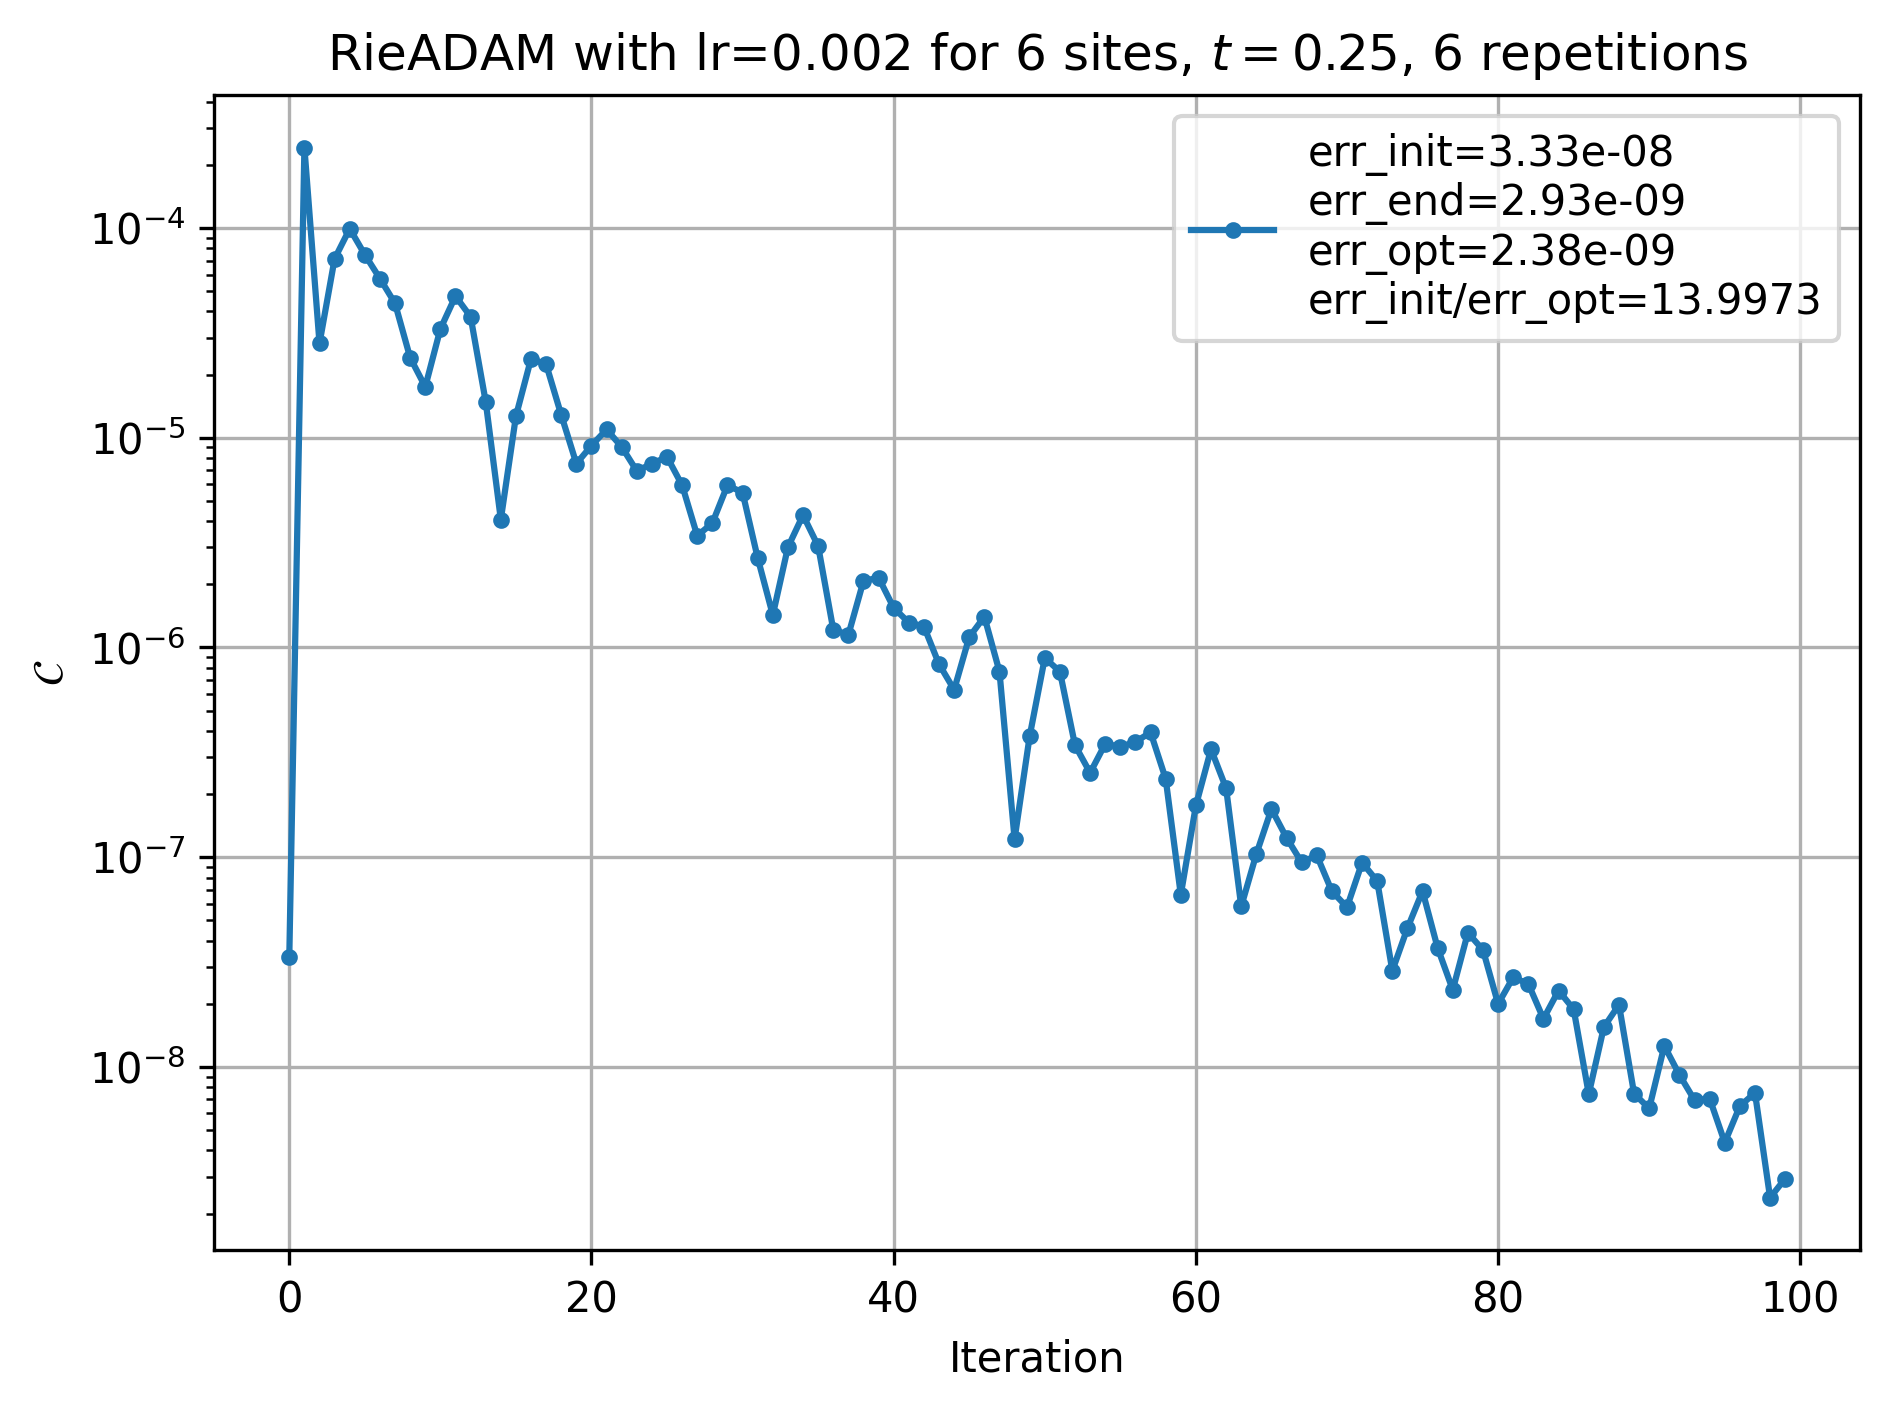

In [11]:
from ropt_aqc.brickwall_opt import optimize_swap_network_circuit_RieADAM

gates_optimised, err_iter = optimize_swap_network_circuit_RieADAM(config, U_ref, gates)


=== Optimizing with N = 1 layers ===
Start Riemannian ADAM optimization ...
	 0 	Current cost:  0.5135659322867003
	 1 	Current cost:  0.5117876662874195
	 2 	Current cost:  0.5100121528708694
	 3 	Current cost:  0.5082394459995512
	 4 	Current cost:  0.50646959929733
	 5 	Current cost:  0.5047026660460445
	 6 	Current cost:  0.5029386991056914
	 7 	Current cost:  0.5011777508239019
	 8 	Current cost:  0.499419872945305
	 9 	Current cost:  0.49766511652385725
	 10 	Current cost:  0.4959135318395671
	 11 	Current cost:  0.4941651683204298
	 12 	Current cost:  0.4924200744701146
	 13 	Current cost:  0.49067829780187777
	 14 	Current cost:  0.48893988477894745
	 15 	Current cost:  0.48720488076163115
	 16 	Current cost:  0.48547332996120884
	 17 	Current cost:  0.48374527540071366
	 18 	Current cost:  0.48202075888247875
	 19 	Current cost:  0.48029982096239654
	 20 	Current cost:  0.4785825009306879
	 21 	Current cost:  0.4768688367989442
	 22 	Current cost:  0.47515886529317863
	 23 	C

KeyboardInterrupt: 

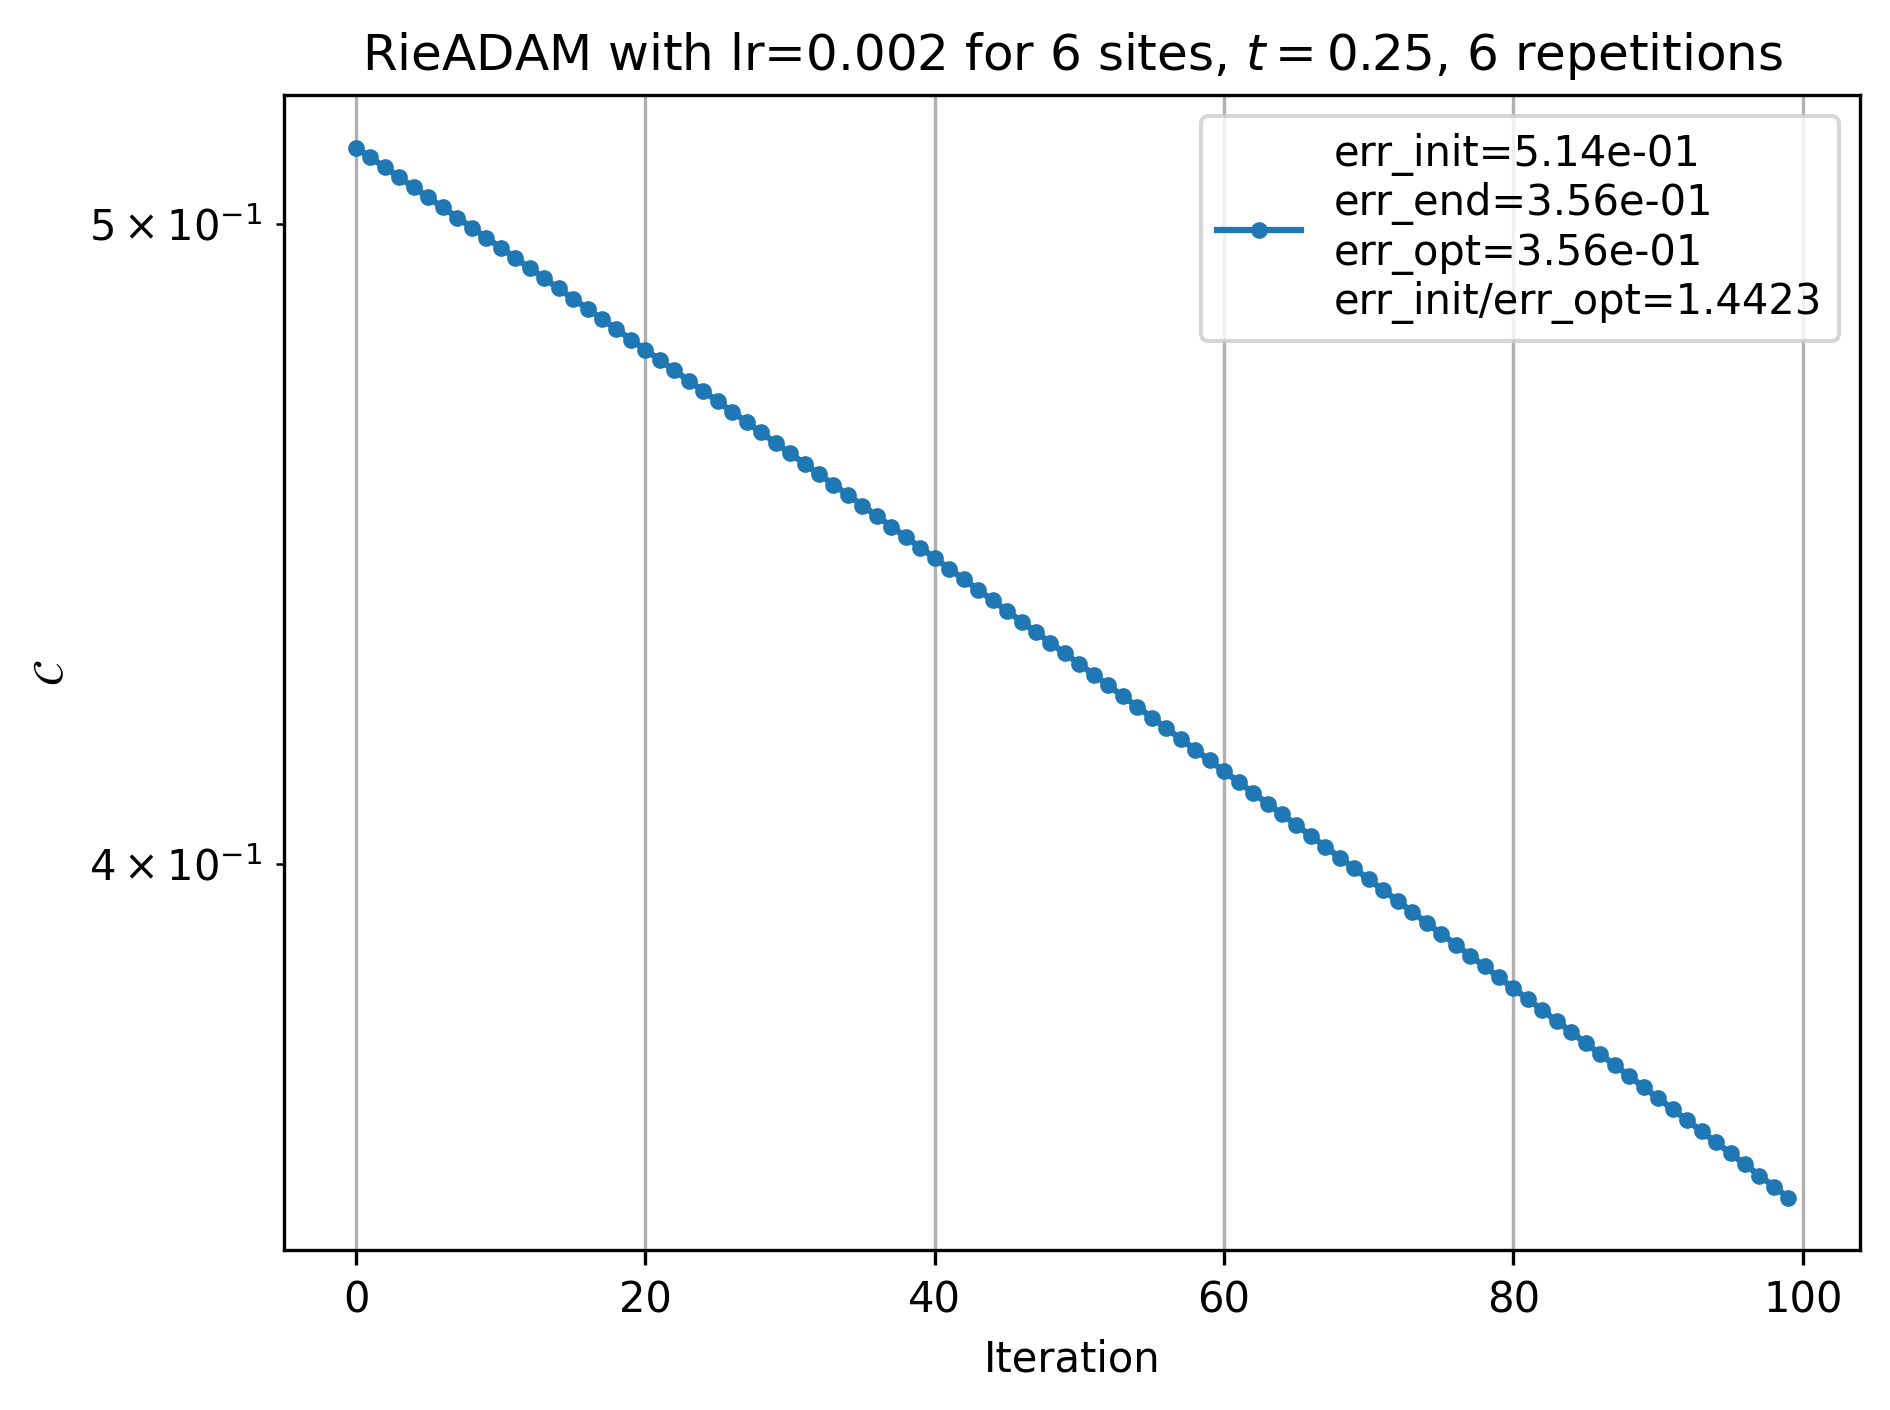

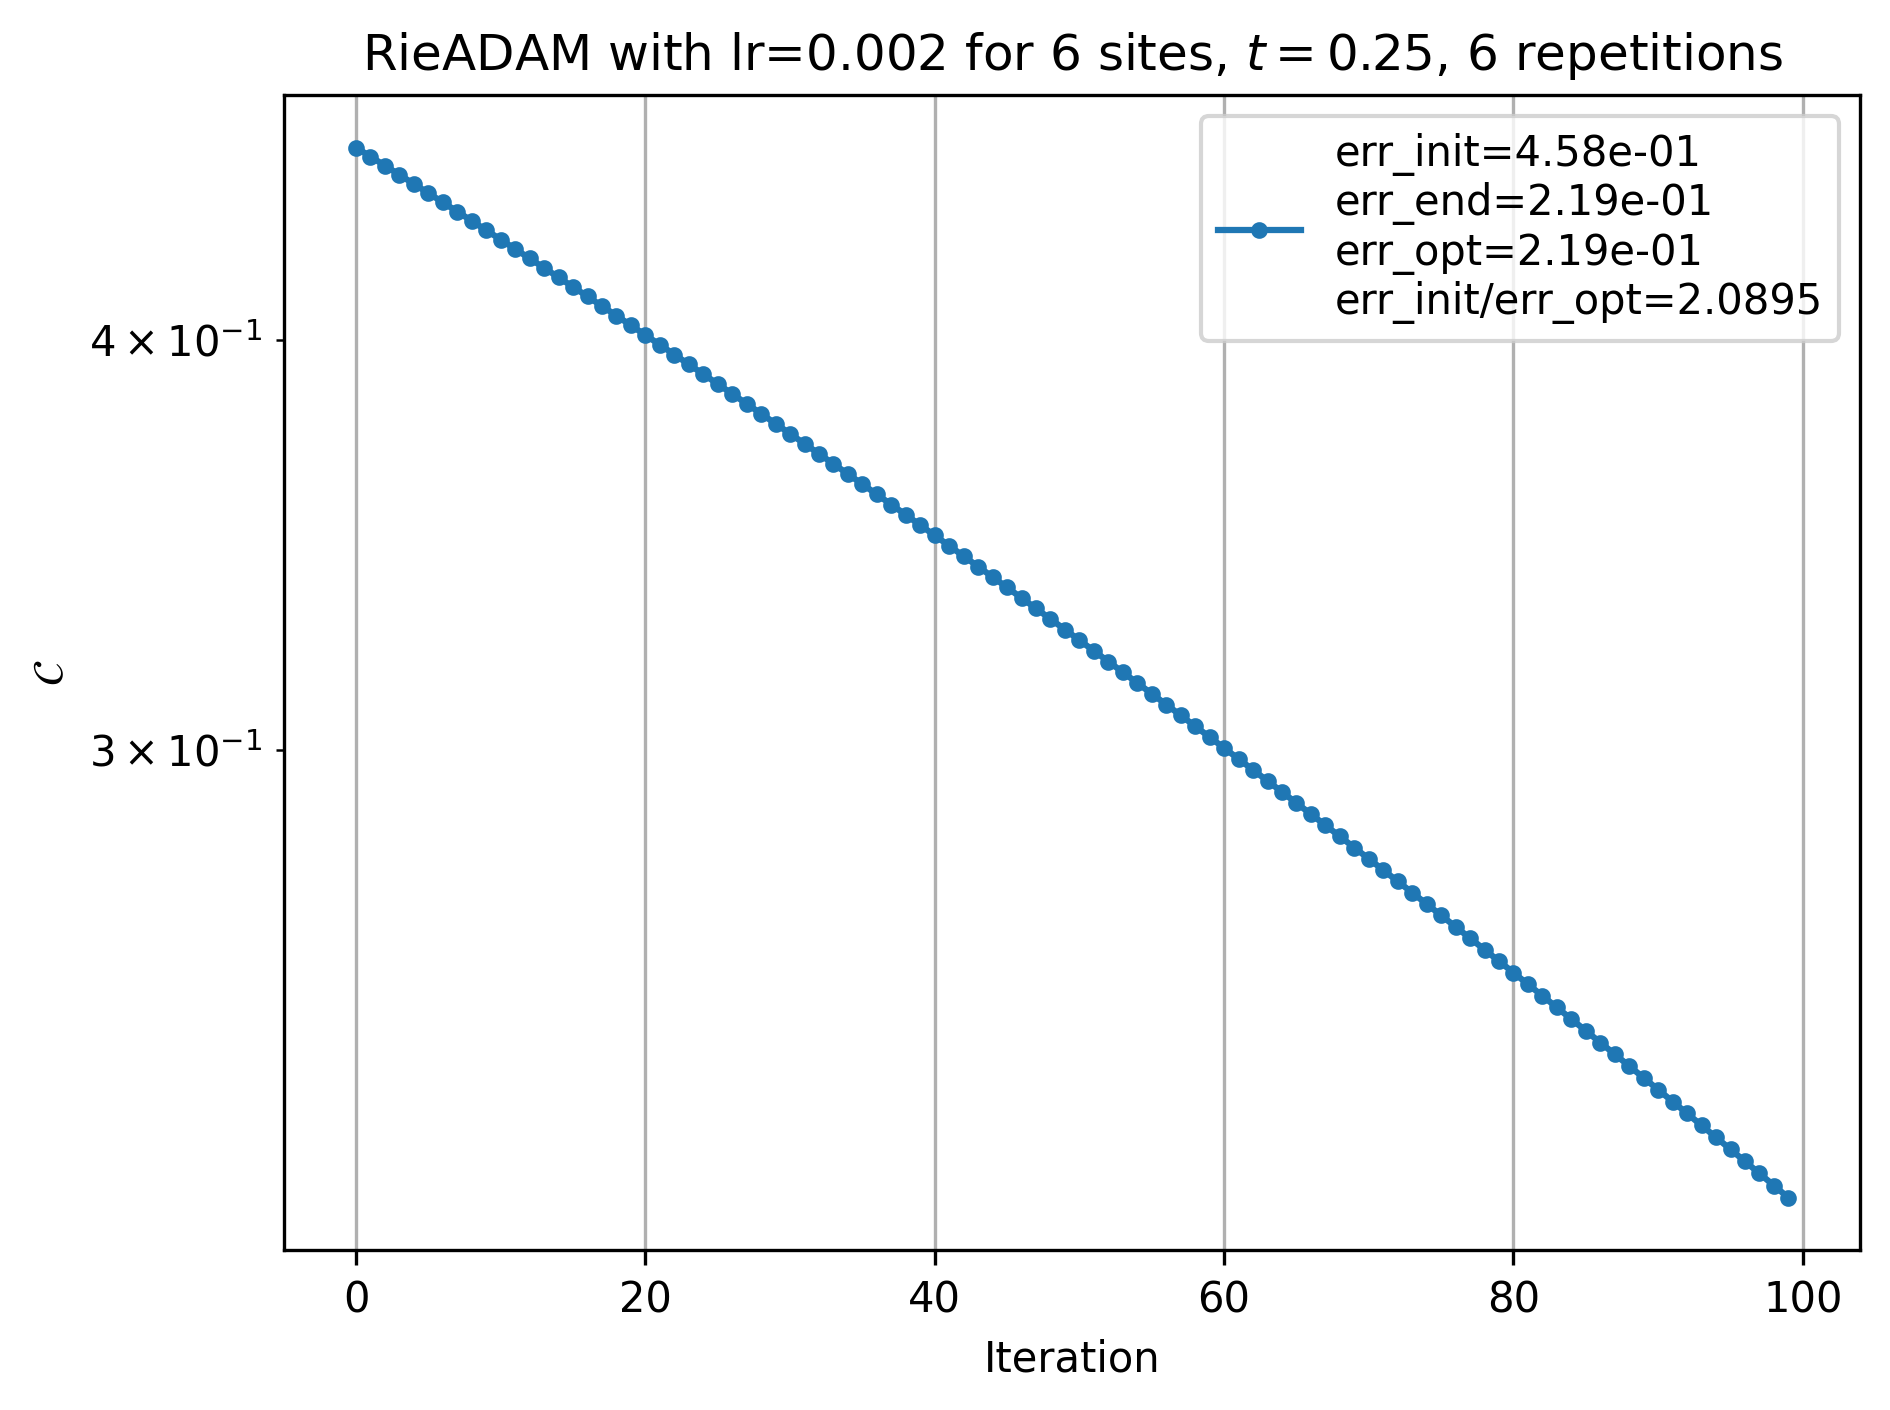

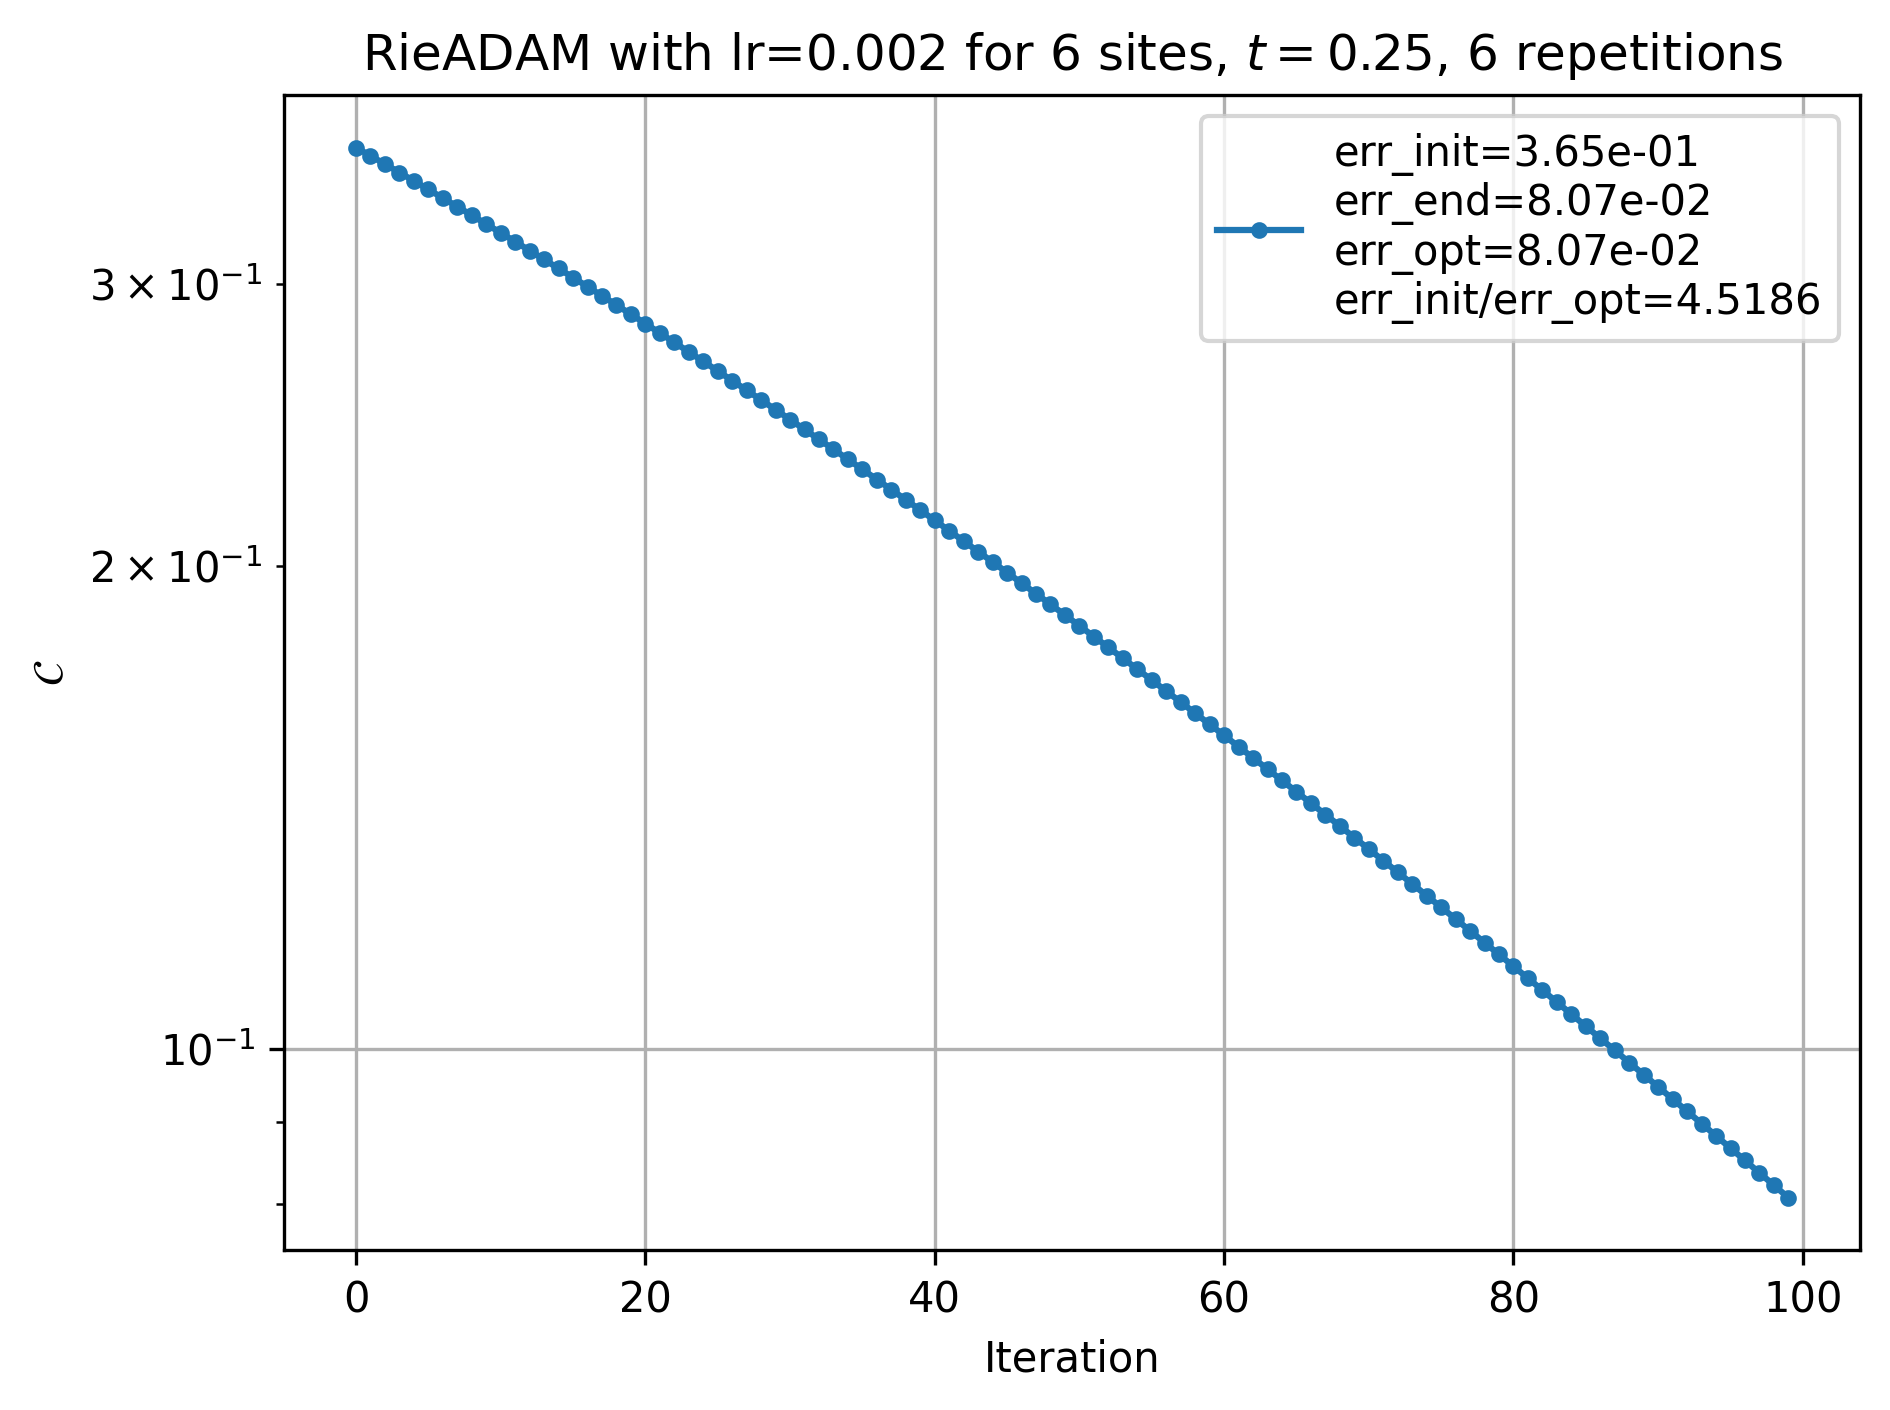

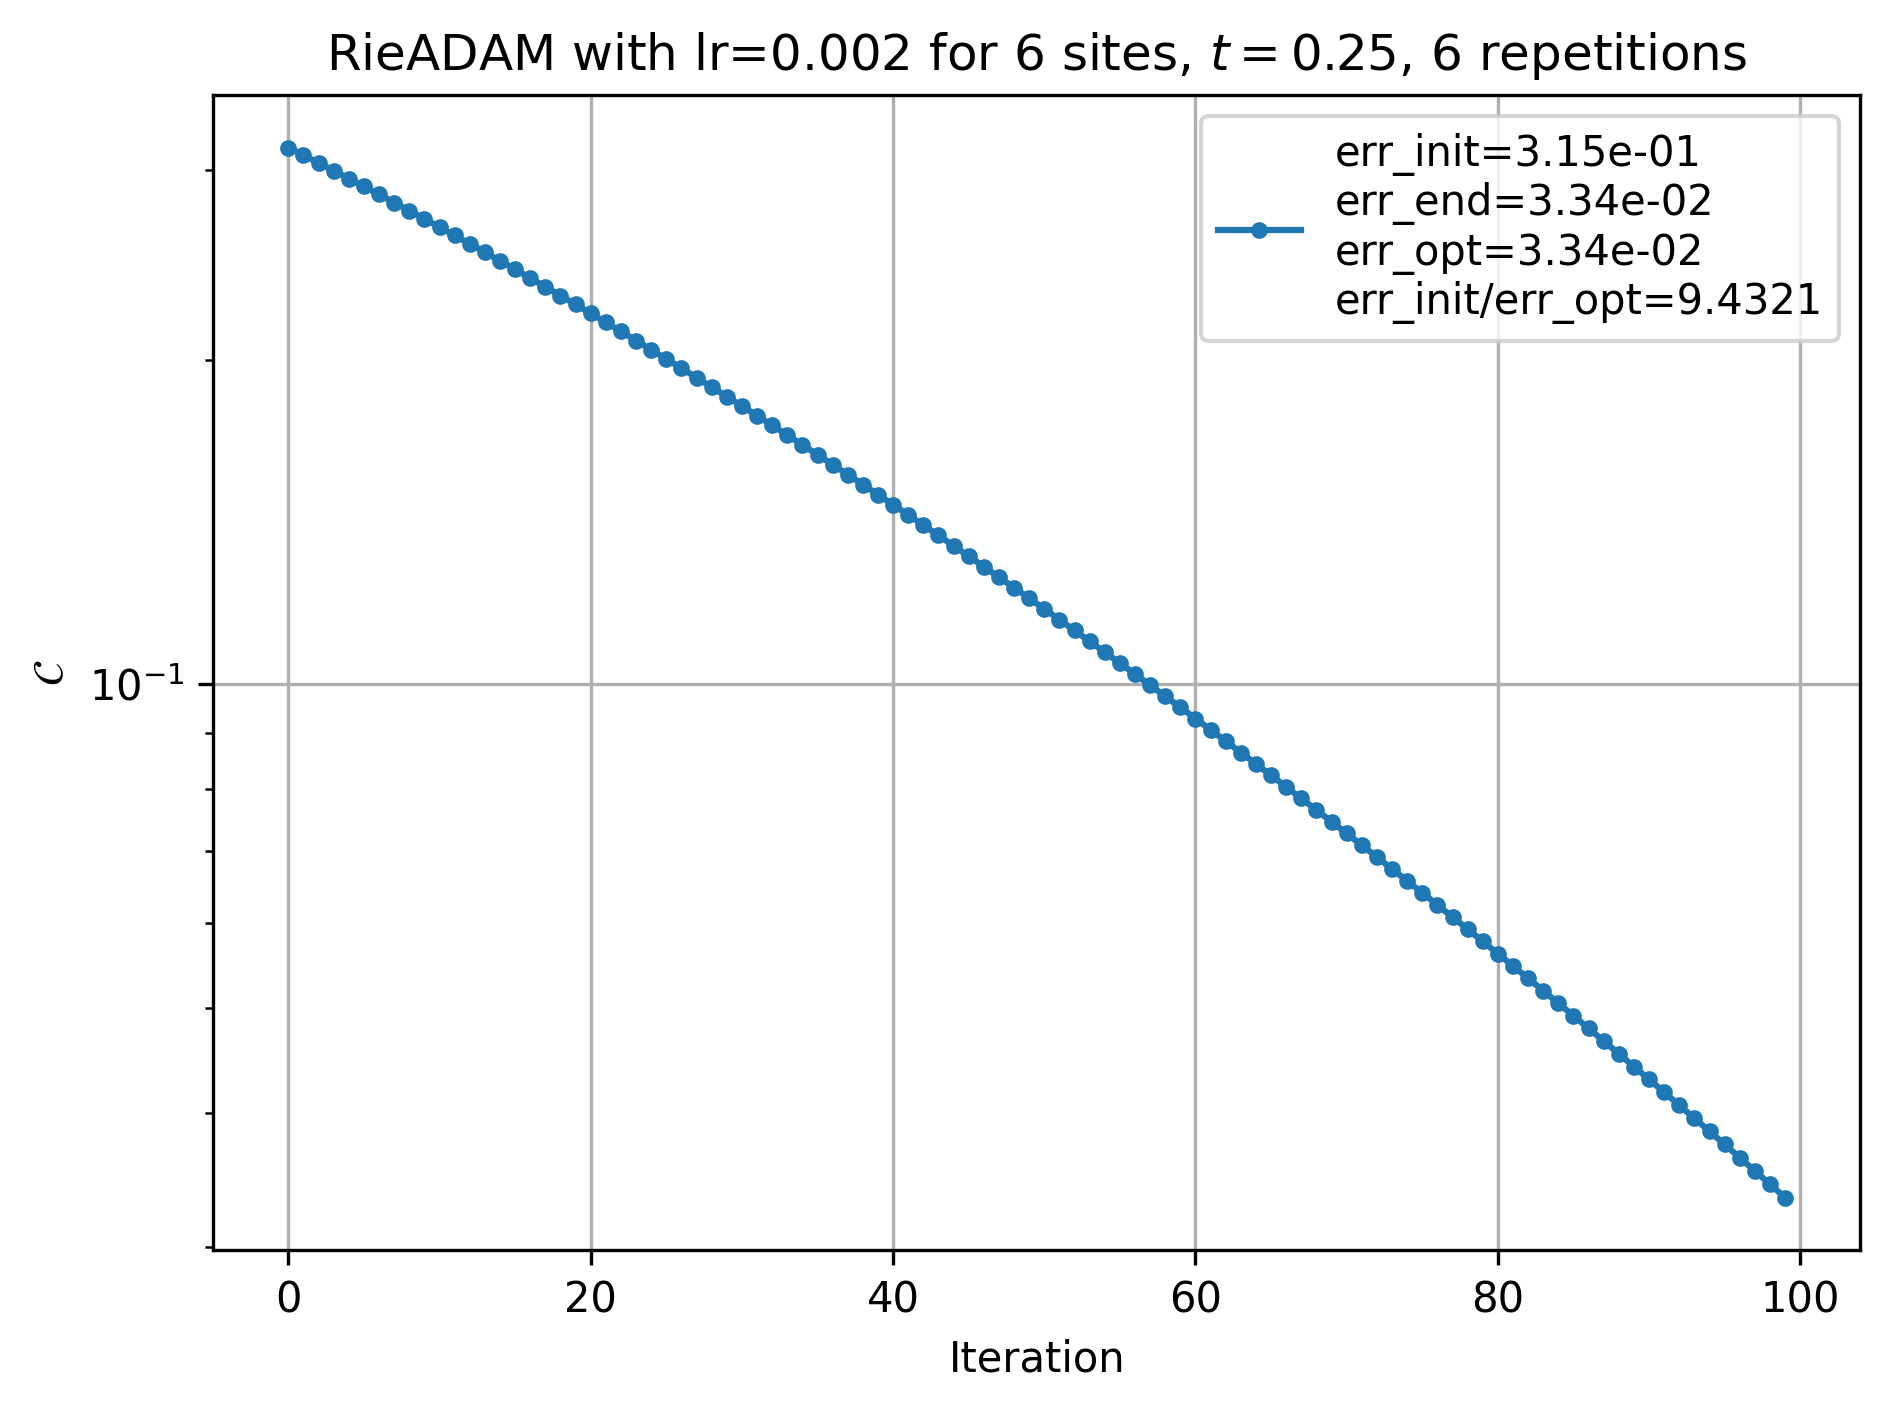

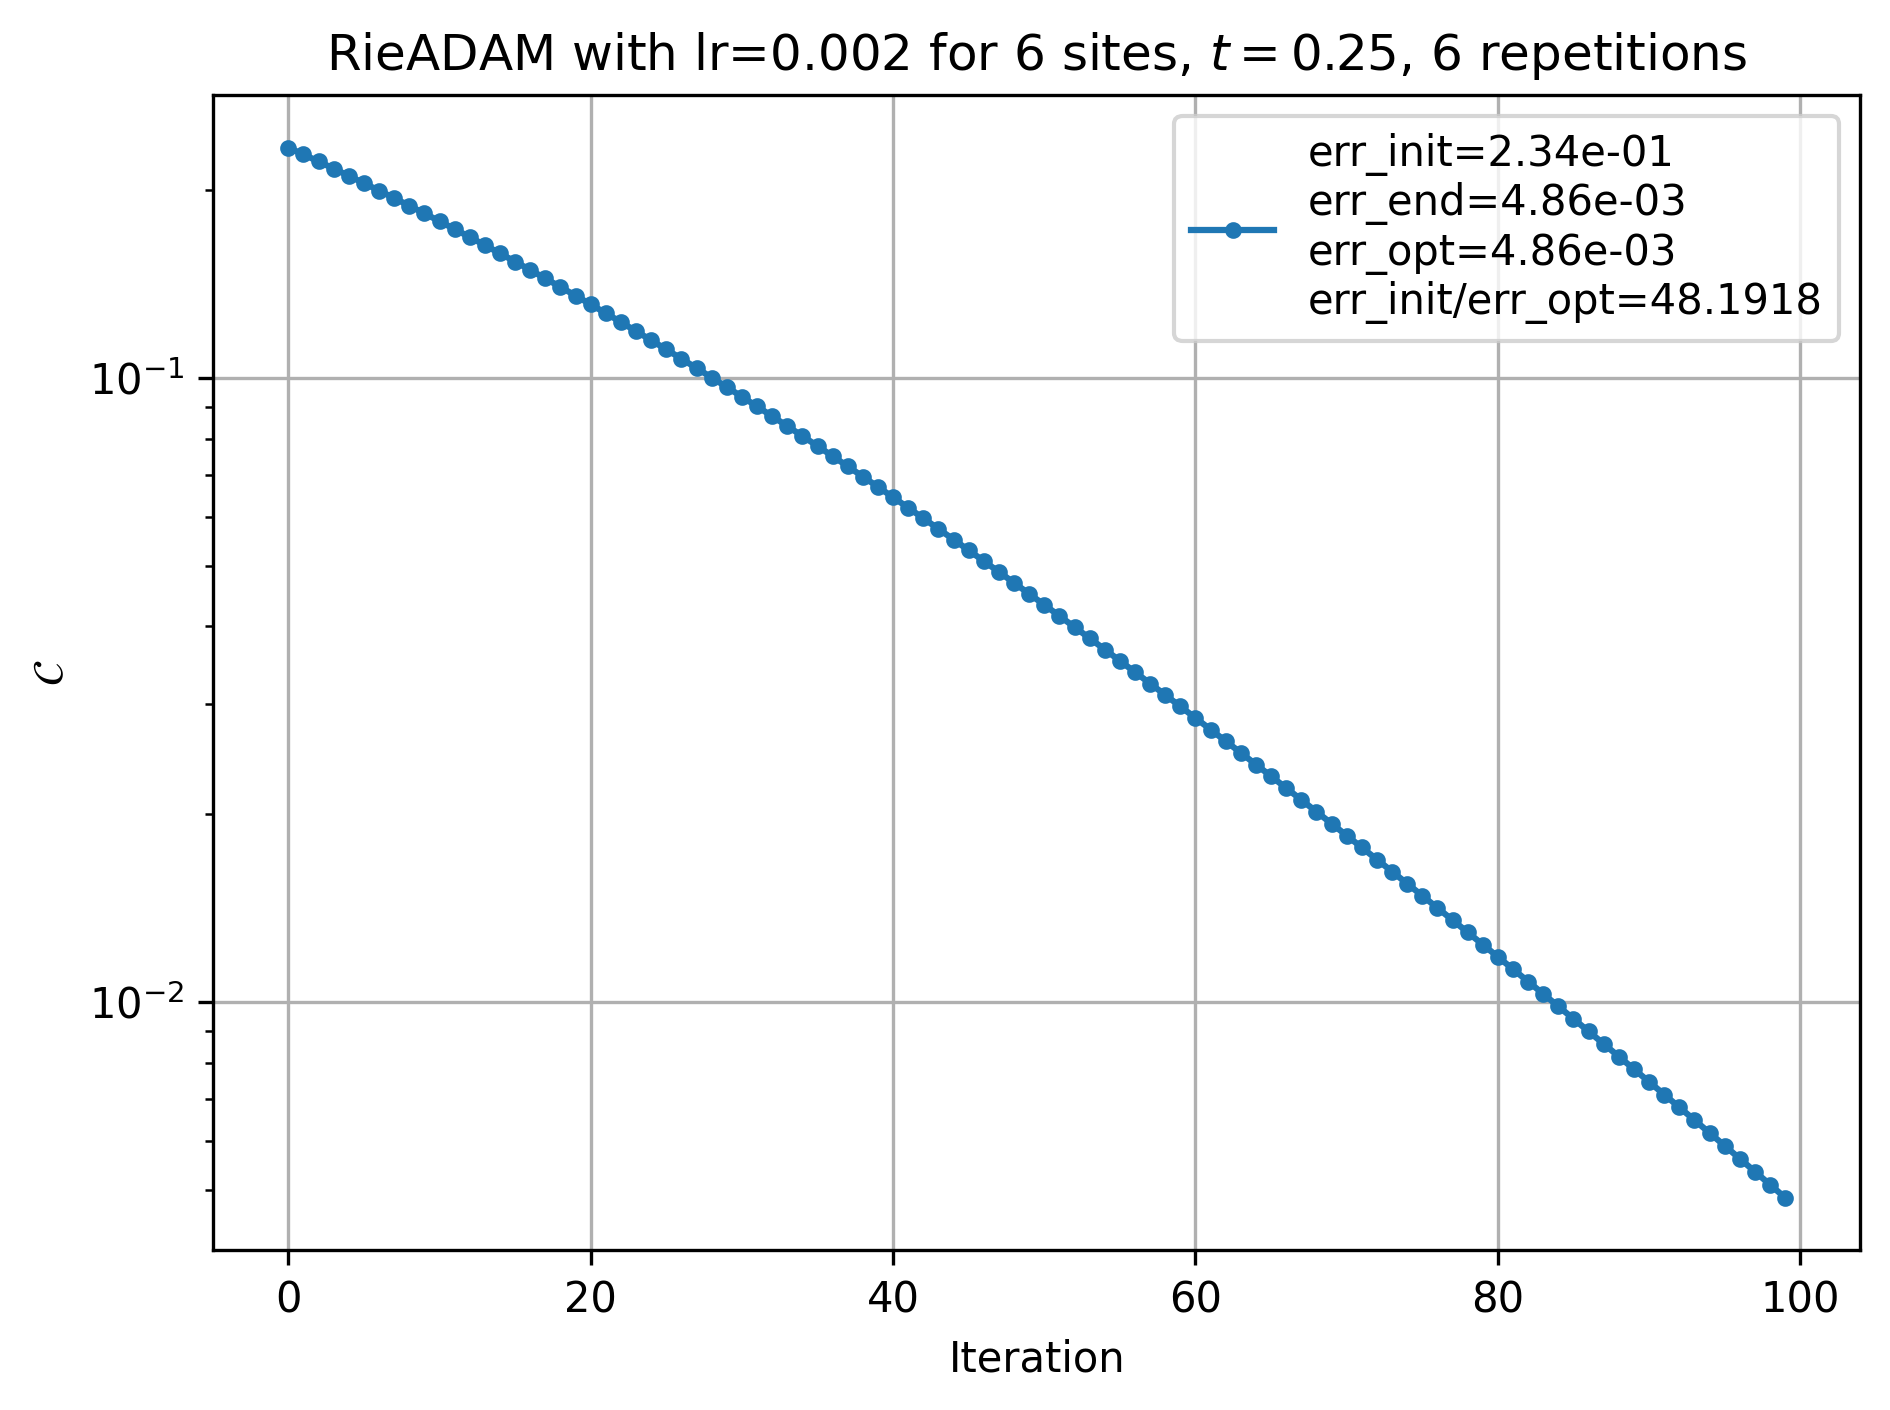

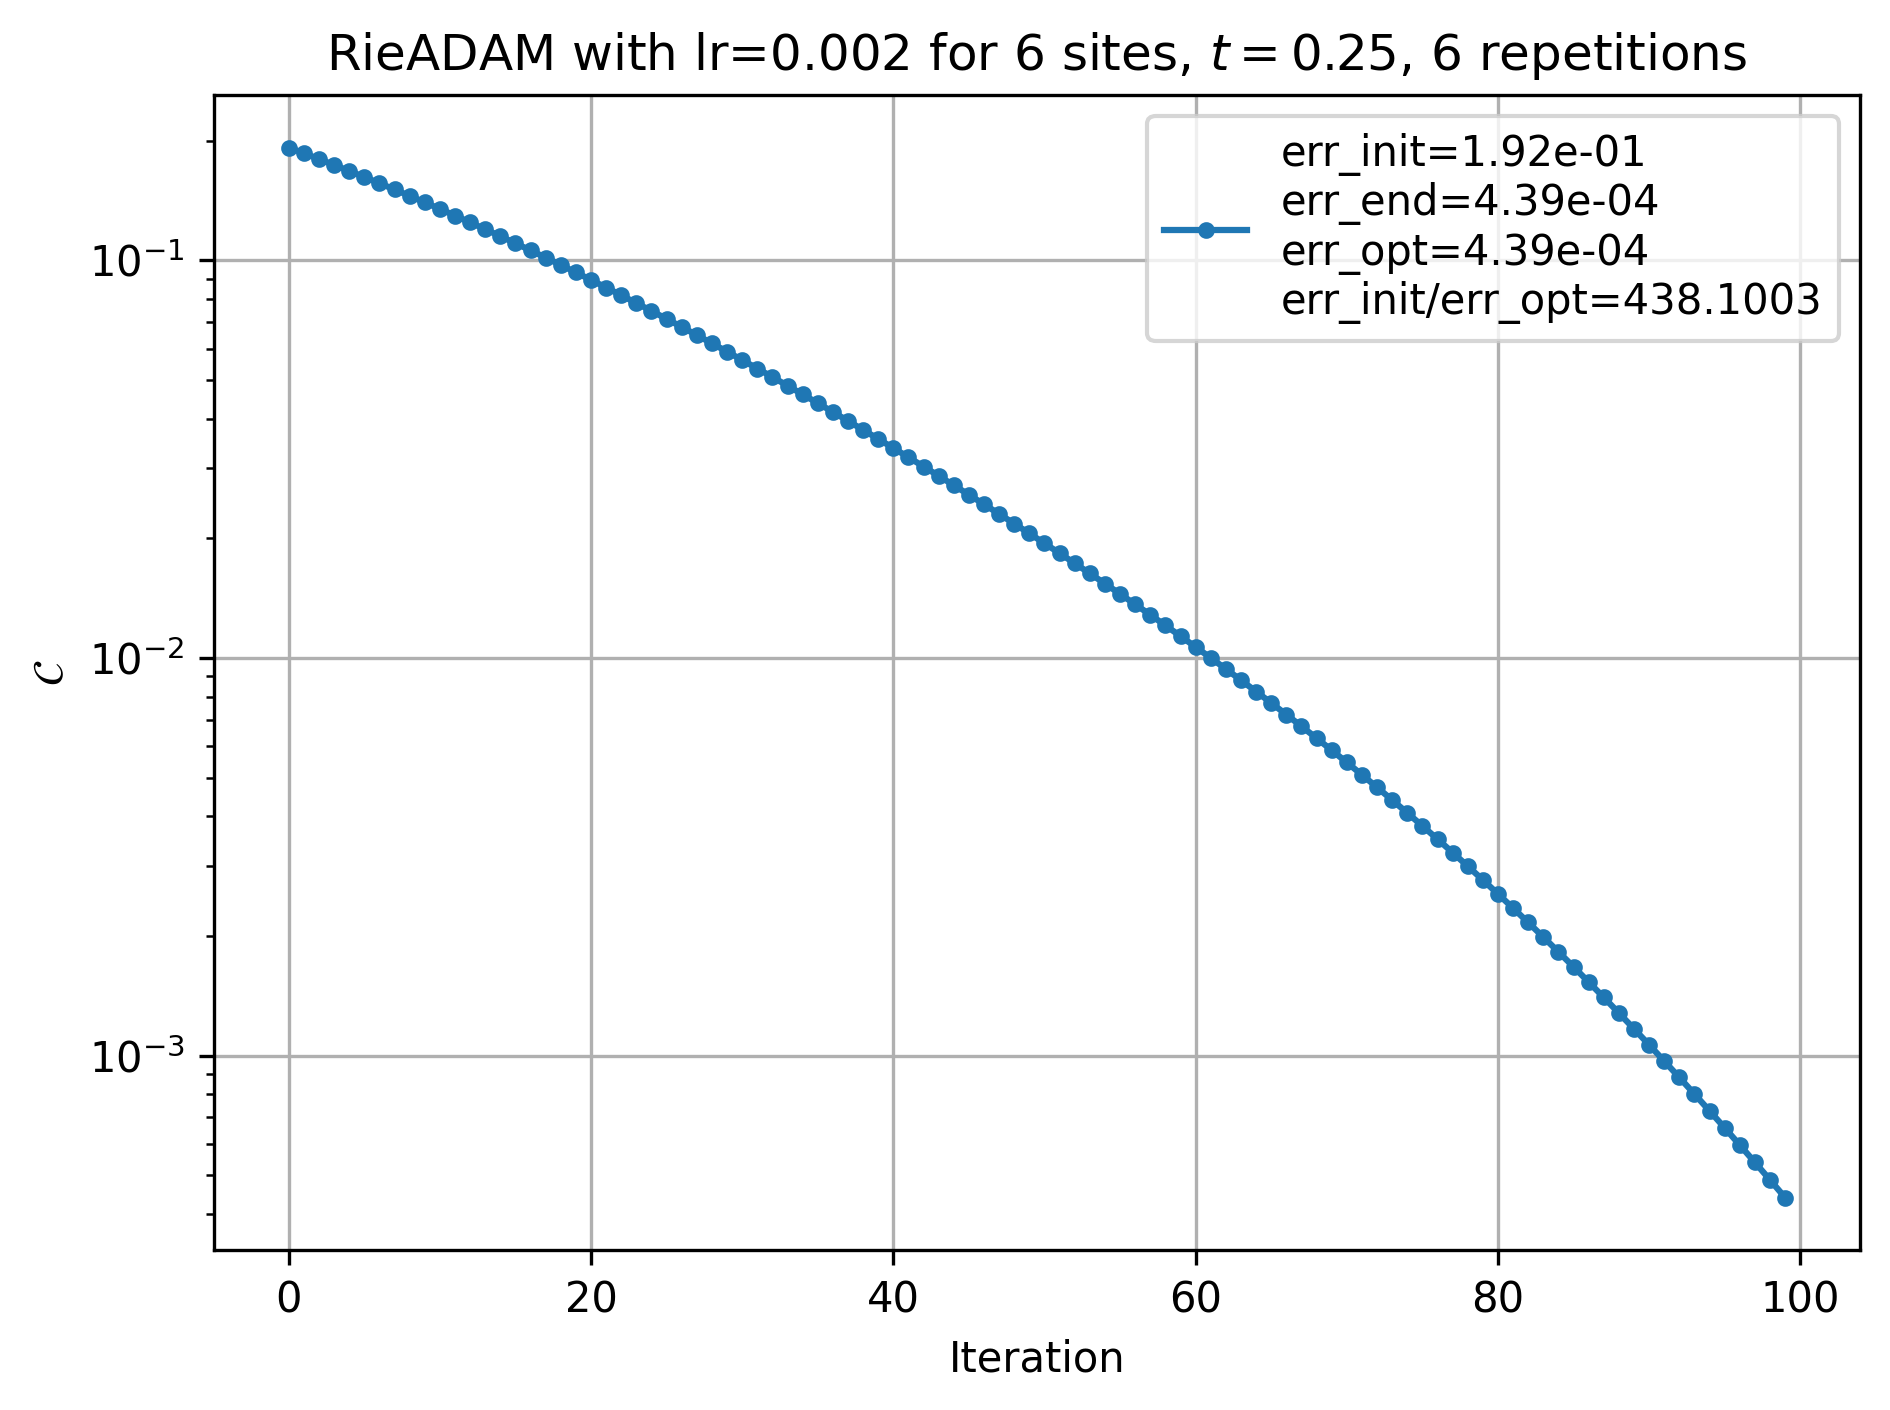

In [12]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from ropt_aqc.comparison_methods import compress_HS

initial_state = QuantumCircuit(num_sites)
for i in range(num_sites):
    if i % 2:
        initial_state.x(i)
psi0 = Statevector.from_instruction(initial_state)

# N_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
N_vals = range(1,depth)

df, gates_optimised_reshaped = compress_HS(gates, config, U_ref, N_vals, qc_initial)

In [ ]:
for g in gates_optimised_reshaped:
    print(np.linalg.norm(g.conj().T @ g - np.eye(4)))

2.3787217516498432e-15
1.5417722655529118e-15
1.5714860516420518e-15
1.7667871382719282e-15
1.9602160415834695e-15
2.5841201704954e-15
1.4128742412149498e-15
1.6776789097388946e-15
8.006246584199498e-16
1.5519117877646505e-15
2.079668755310954e-15
1.5210528990193102e-15
1.1677331764234663e-15
1.8071078531805486e-15
1.6677849227963062e-15
1.6967383281690745e-15
1.3025257091770677e-15
9.668902725578266e-16
1.3944744965590865e-15
2.5144800892549924e-15
1.813269553408427e-15
1.0006124686416281e-15
2.2540958360622103e-15
1.0877871100309377e-15
2.1575134684290663e-15
2.88033589166604e-15
1.4655697603594444e-15
1.8506450630444496e-15
2.021363690166707e-15
1.0743910034051955e-15


In [ ]:
import pandas as pd
file_path_ising = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_Ising_results_6_0.25.csv'
# file_path_ising = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_Ising_results_1000.csv'

df.to_csv(file_path_ising, index=False, header=True)
# df.to_csv(file_path_ising, index=False, mode="a", header=False)

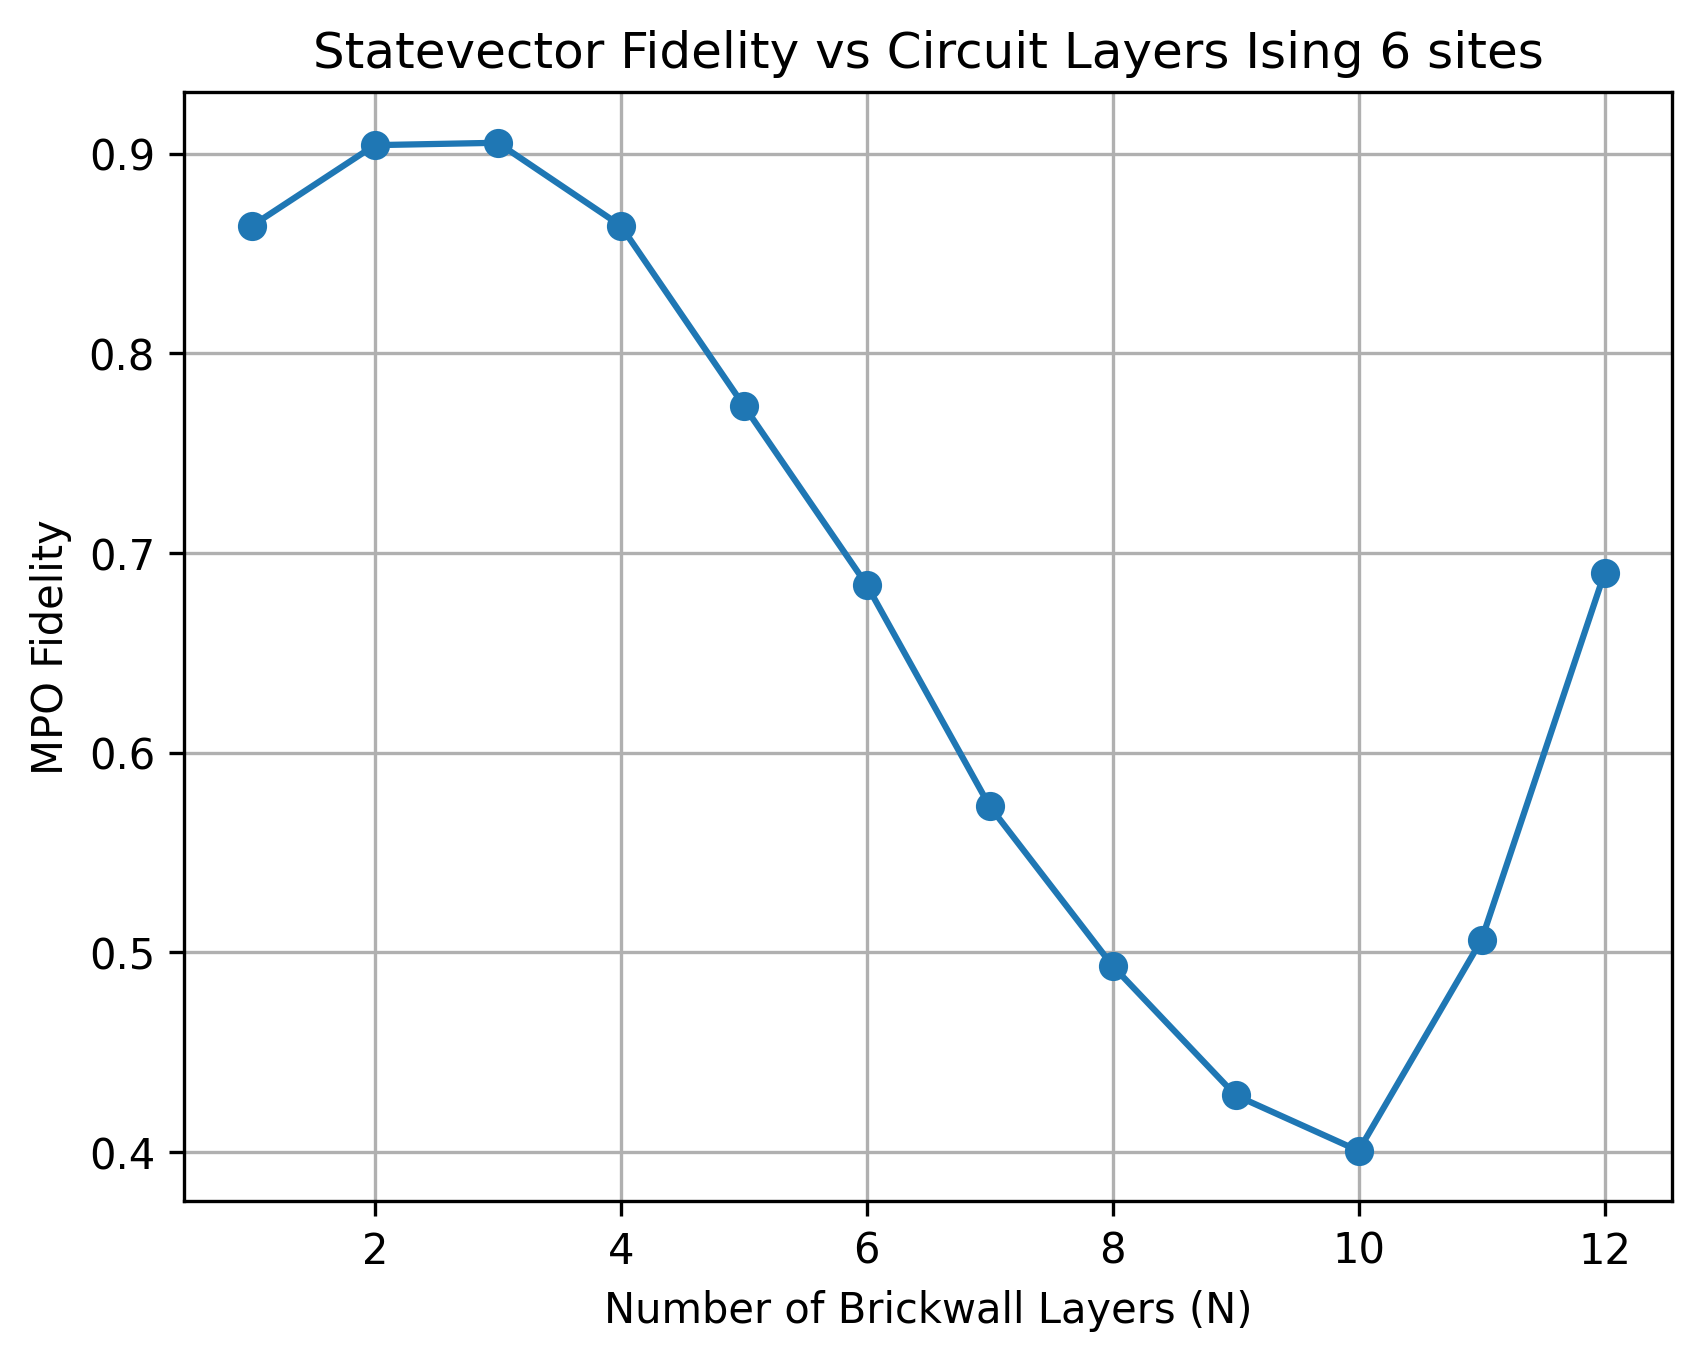

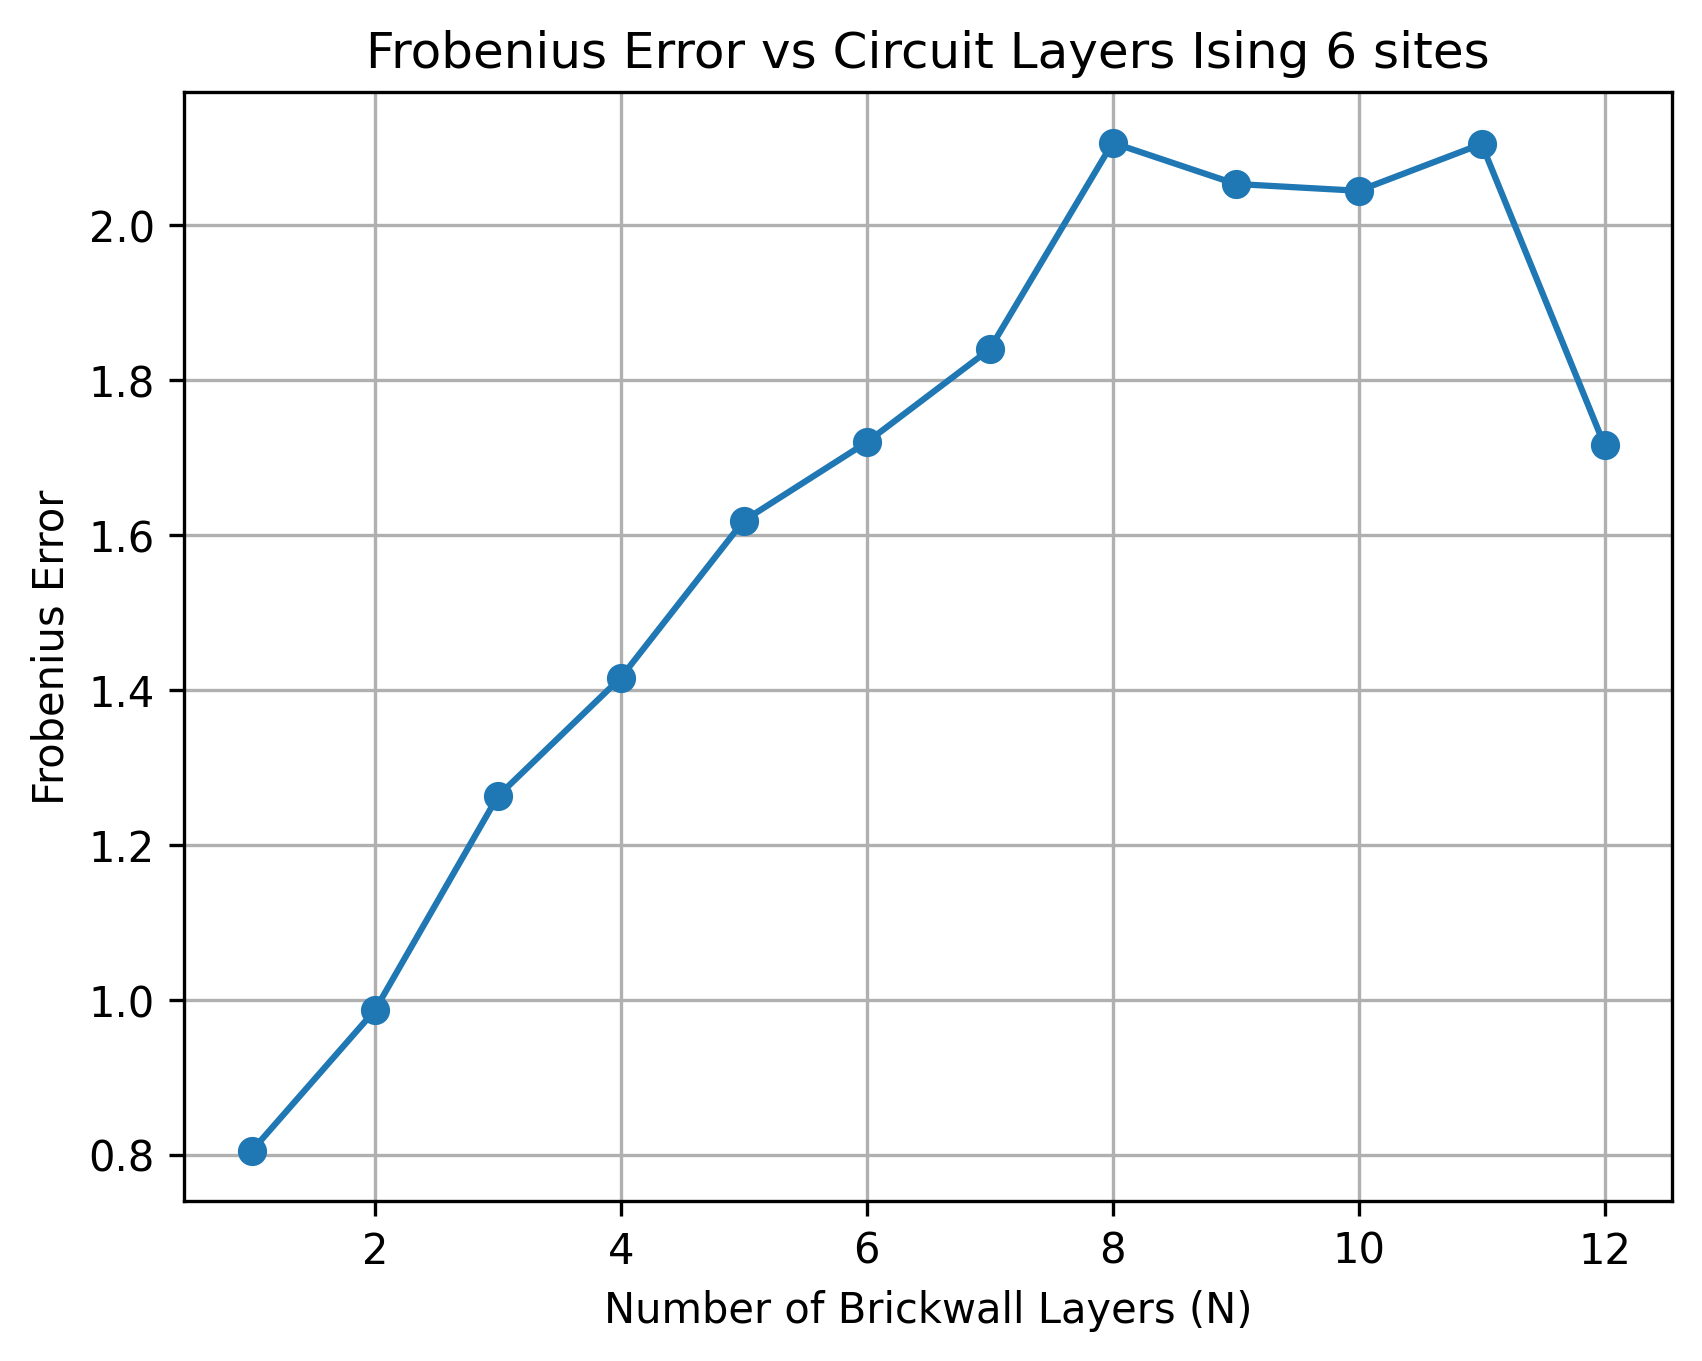

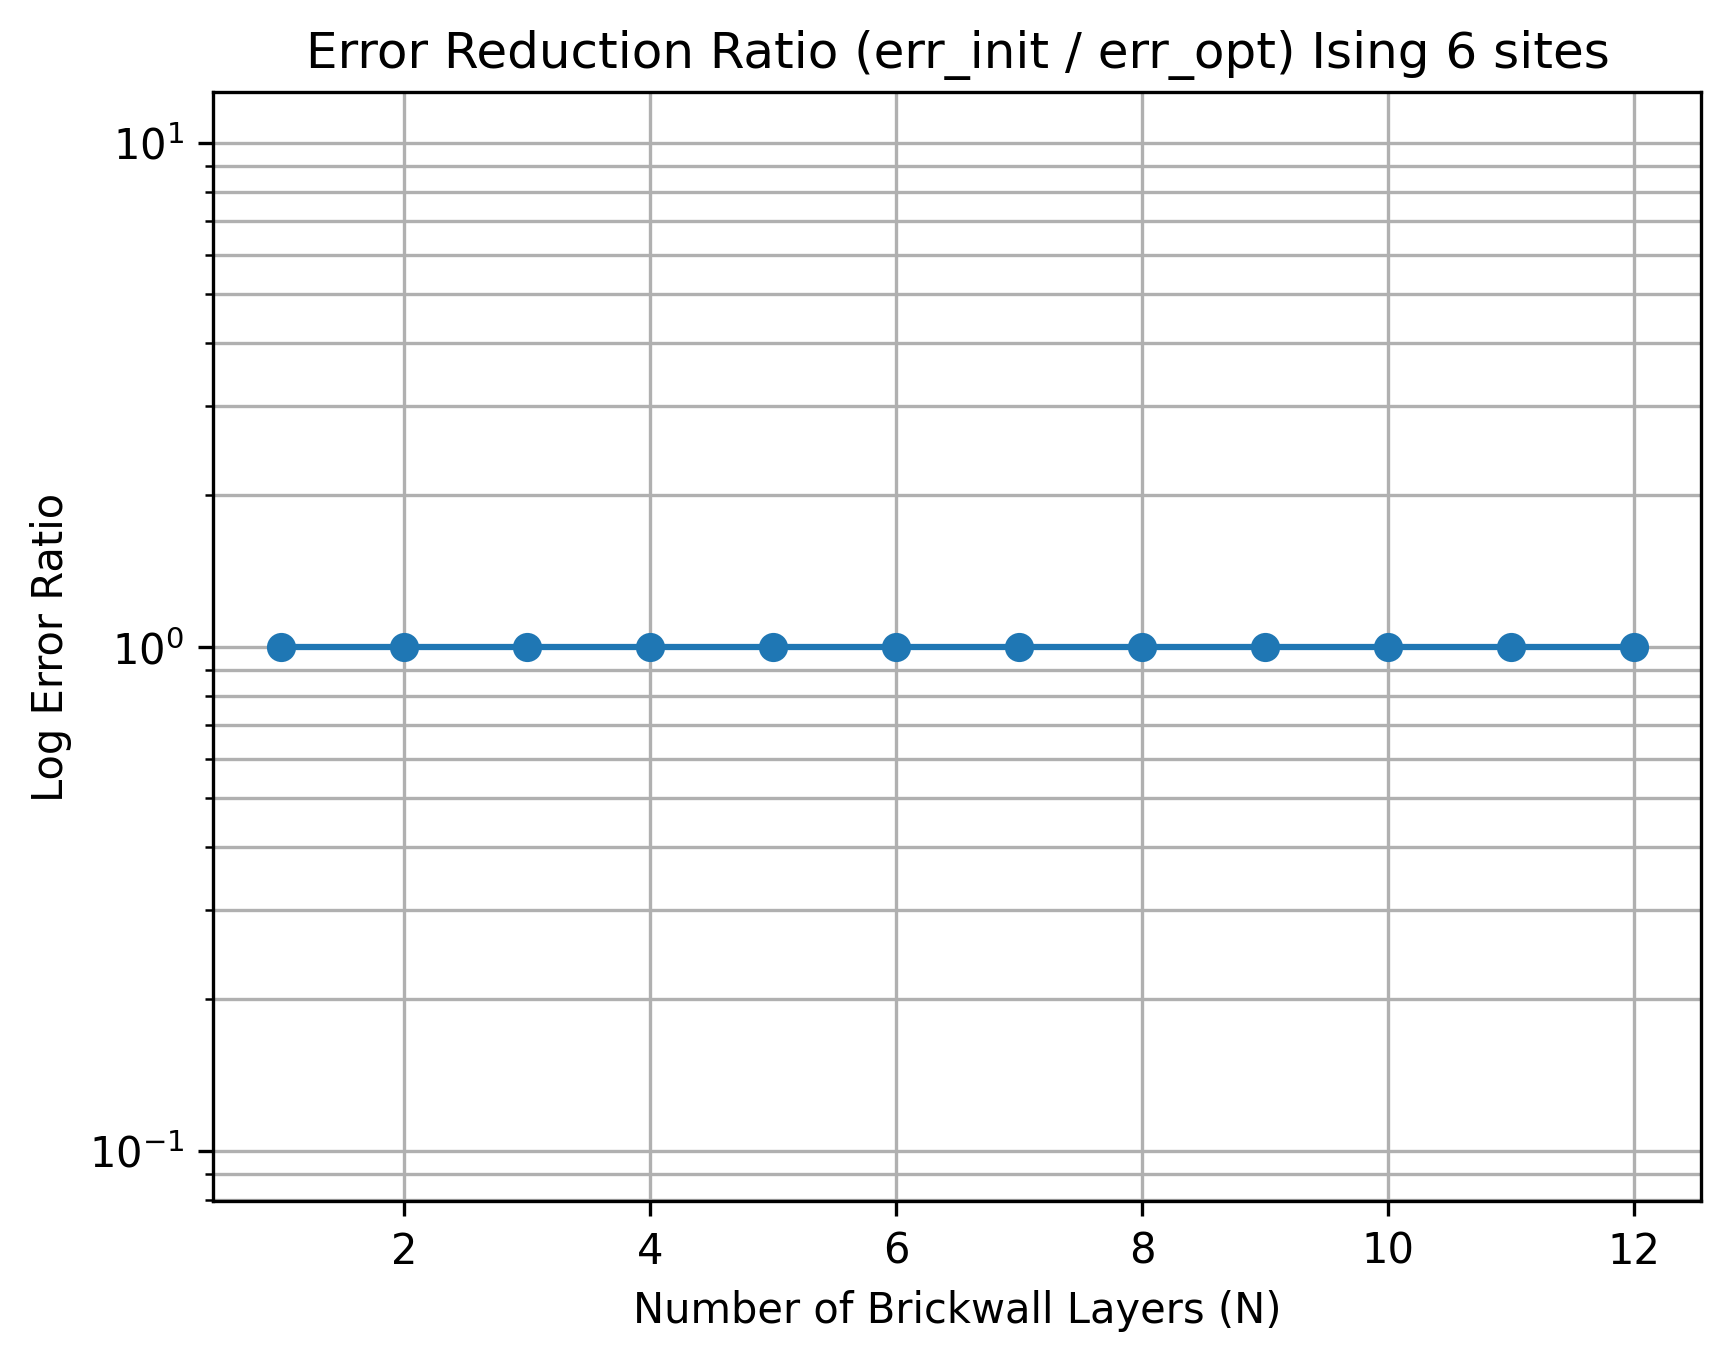

In [ ]:
import matplotlib.pyplot as plt
# df = pd.read_csv(file_path_ising)
# Plot MPO fidelity
plt.figure(dpi=300)
plt.plot(df['circuit_layers'], df['statevector_fidelity'], marker='o')
plt.title('Statevector Fidelity vs Circuit Layers Ising 6 sites')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('MPO Fidelity')
plt.grid(True)
plt.show()

# Plot Frobenius Error
plt.figure(dpi=300)
plt.plot(df['circuit_layers'], df['frobenius_error'], marker='o')
plt.title('Frobenius Error vs Circuit Layers Ising 6 sites')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('Frobenius Error')
plt.grid(True)
plt.show()

# Plot error ratio (log scale)
plt.figure(dpi=300)
plt.semilogy(df['circuit_layers'], df['err_init/err_opt'], marker='o')
plt.title('Error Reduction Ratio (err_init / err_opt) Ising 6 sites')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('Log Error Ratio')
plt.grid(True, which='both')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/b/aag/ropt-aqc/production/Figures/Le_0.25_ising-1d_infidelity.pdf'

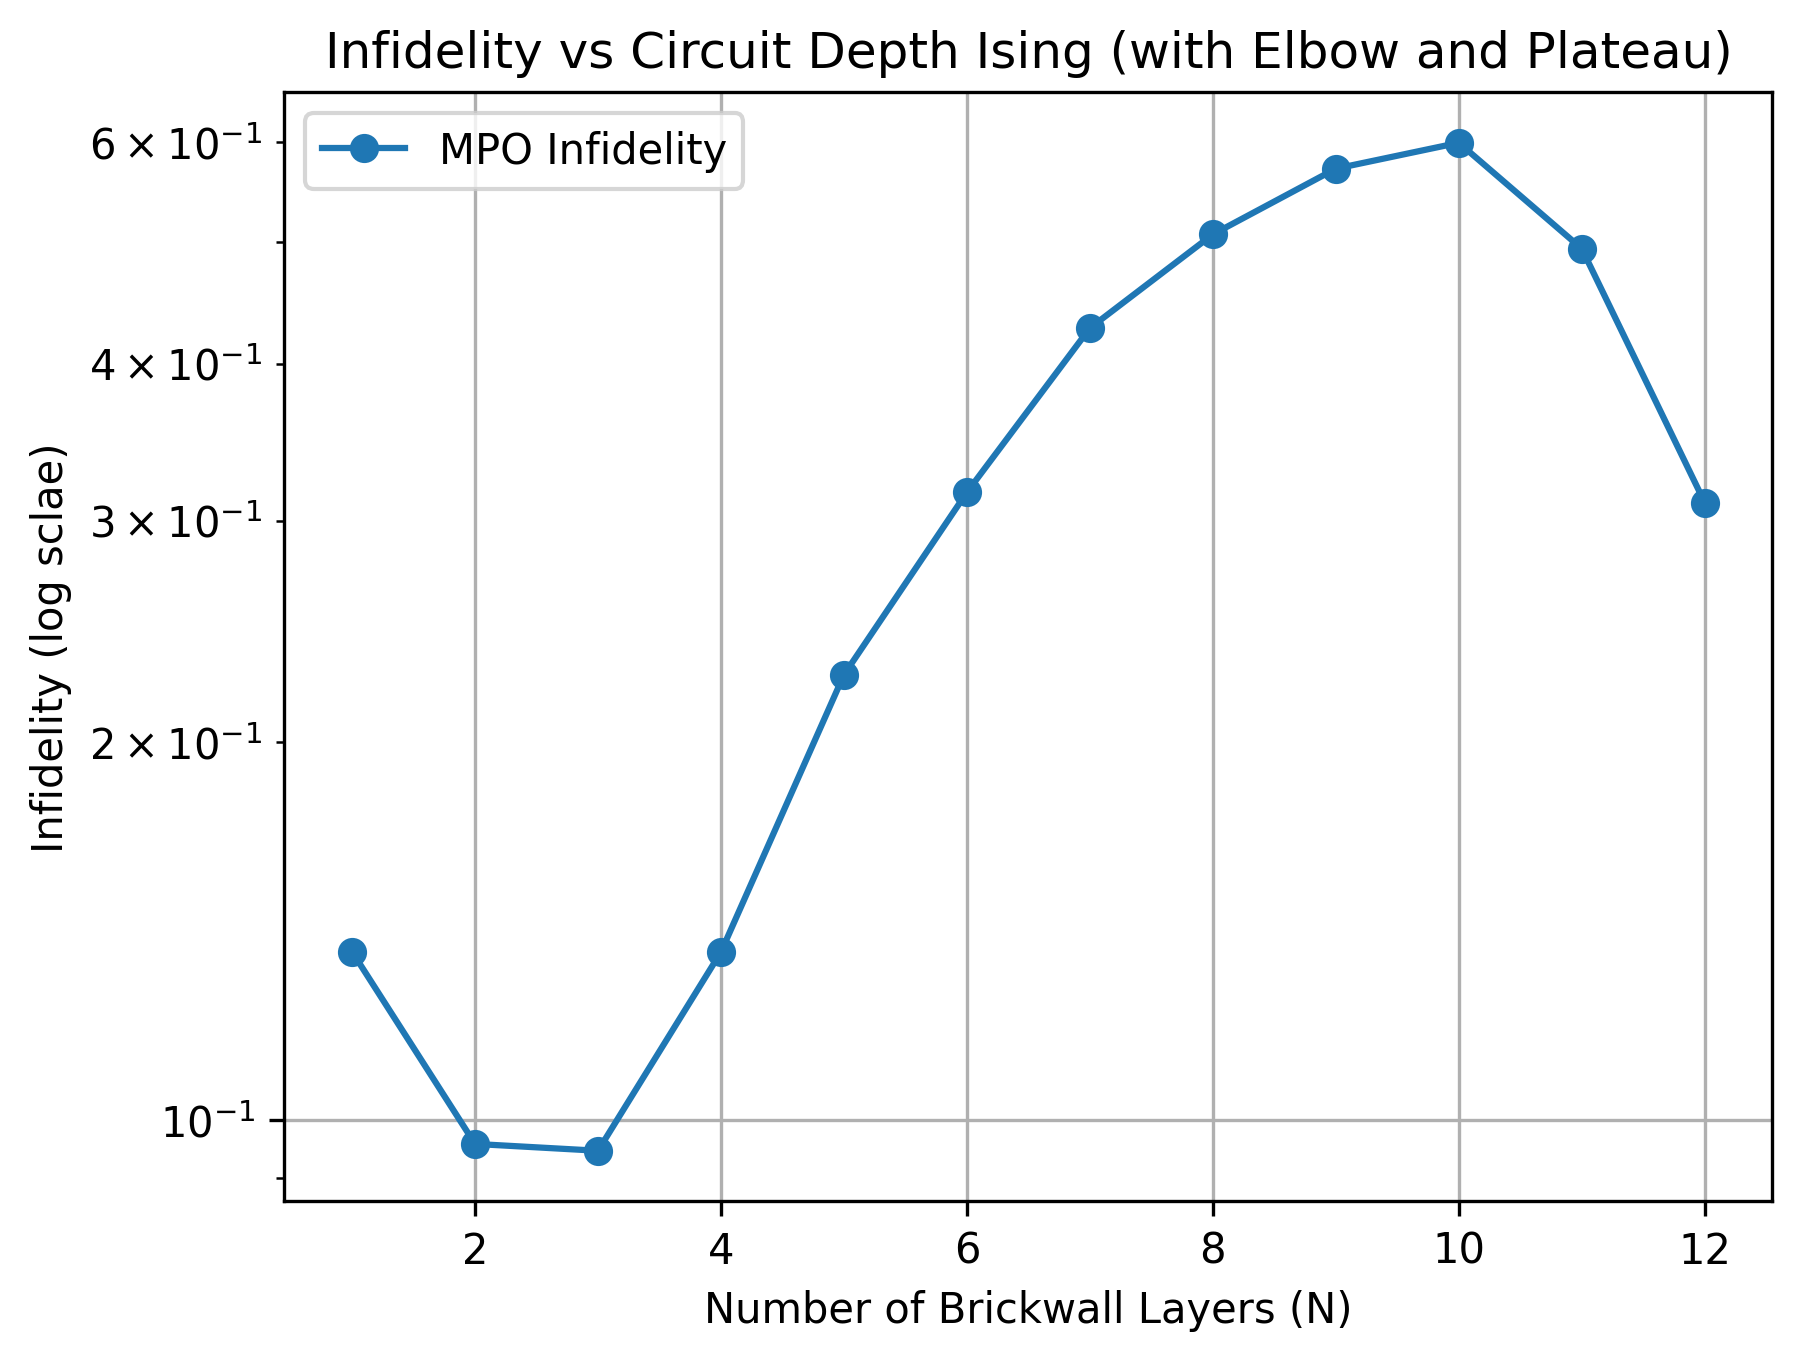

In [ ]:
from ropt_aqc.brickwall_opt import plot_fidelity

elbow_N, plateau_N = plot_fidelity(df, 'statevector_fidelity', t, 1e-3, method, system, save_path=True)

Heisenberg

In [ ]:
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms, build_matrix_from_terms

num_sites = 50
degree = 2
n_repetitions = 20
n_id_layers = 0

# Heisenberg
t = 2
system = 'heisenberg'

terms, params = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=[1.0, 1.0, -0.5], h=[0.75, 0.0, 0.0])

J= params['J']
h= params['h']

In [ ]:
from ropt_aqc.spin_systems import get_brickwall_trotter_gates_spin_chain

gates_heisenberg = get_brickwall_trotter_gates_spin_chain(t=t, n_sites=num_sites, n_repetitions=n_repetitions, hamiltonian=system, degree=degree, J=J, h=h)

In [ ]:
# Matrices for qc
import numpy as np
from ropt_aqc.brickwall_circuit import get_initial_gates

gates_initial_h = get_initial_gates(n_sites=num_sites, t=t, n_repetitions=n_repetitions, degree=degree, hamiltonian=system, n_id_layers=n_id_layers, use_TN=False, J=-J, h=h)
print(np.array(gates_initial_h).shape) 

(1005, 4, 4)


In [ ]:
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate

qc_initial_h = transform_to_bw_qc_unitarygate(num_sites=num_sites, n_repetitions=n_repetitions, system = system, gates=gates_initial_h)
depth_h = qc_initial_h.depth()
# qc_initial_h.draw('mpl')

In [ ]:
# TN for optimisation
from ropt_aqc.brickwall_circuit import get_initial_gates
gates_h = get_initial_gates(n_sites=num_sites, t=t, n_repetitions=n_repetitions, degree=degree, hamiltonian=system, n_id_layers=n_id_layers, use_TN=True, J=J, h=h)
print(np.array(gates_h).shape)  # Should be (N, 4, 4) for 2-qubit gates


(1005, 2, 2, 2, 2)


In [ ]:
from ropt_aqc.save_model import load_reference
import os
import yaml
repo_root = "/Users/aag/Documents/ropt-aqc/"
config_file = os.path.join(repo_root, "run", system, "configs", "config.yml") 

with open(config_file, "r") as f:
    config = yaml.safe_load(f)

config['ref_nbr'] = n_repetitions

config['reference_dir'] = f'/Users/aag/Documents/ropt-aqc/run/{system}/reference'

U_ref, t, _, _, _, _, _, _, _, J, h= load_reference(config['reference_dir'], config['n_sites'], config['n_repetitions'], config['t'])

In [ ]:
from ropt_aqc.tn_helpers import left_to_right_QR_sweep

U_ref = left_to_right_QR_sweep(U_ref, get_norm=False, normalize=config['normalize_reference'])
print("U_ref shape:", [m.shape for m in U_ref])

U_ref shape: [(1, 2, 2, 4), (4, 2, 2, 16), (16, 2, 2, 64), (64, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 127), (127, 2, 2, 64), (64, 2, 2, 16), (16, 2, 2, 4), (4, 2, 2, 1)]


In [ ]:
from ropt_aqc.brickwall_opt import optimize_swap_network_circuit_RieADAM

gates_optimised_h, err_iter_h = optimize_swap_network_circuit_RieADAM(config, U_ref, gates_h)

Start Riemannian ADAM optimization ...
R (16, 16)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (127, 127)
R (16, 16)
R (4, 4)
R (64, 64)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (64, 64)
R (4, 4)
R (16, 16)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (128, 128)
R (16, 16)
R (4, 4)
R (64, 64)
R (128, 128)

KeyboardInterrupt: 

4. Optimisation of Frobenius norm


=== Optimizing with N = 1 layers ===
Start Riemannian ADAM optimization ...
	 0 	Current cost:  0.6722115863322387
	 1 	Current cost:  0.6678681882452553
	 2 	Current cost:  0.6635418042762089
	 3 	Current cost:  0.6592327704303083
	 4 	Current cost:  0.6549414168876804
	 5 	Current cost:  0.6506680674769707
	 6 	Current cost:  0.6464130391637584
	 7 	Current cost:  0.6421766415780767
	 8 	Current cost:  0.6379591765873804
	 9 	Current cost:  0.6337609379184497
	 10 	Current cost:  0.6295822108304863
	 11 	Current cost:  0.6254232718408672
	 12 	Current cost:  0.6212843885043036
	 13 	Current cost:  0.6171658192454113
	 14 	Current cost:  0.6130678132441447
	 15 	Current cost:  0.6089906103728802
	 16 	Current cost:  0.6049344411833582
	 17 	Current cost:  0.6008995269412991
	 18 	Current cost:  0.5968860797059288
	 19 	Current cost:  0.5928943024513949
	 20 	Current cost:  0.5889243892266502
	 21 	Current cost:  0.5849765253502179
	 22 	Current cost:  0.5810508876360478
	 23 	Current

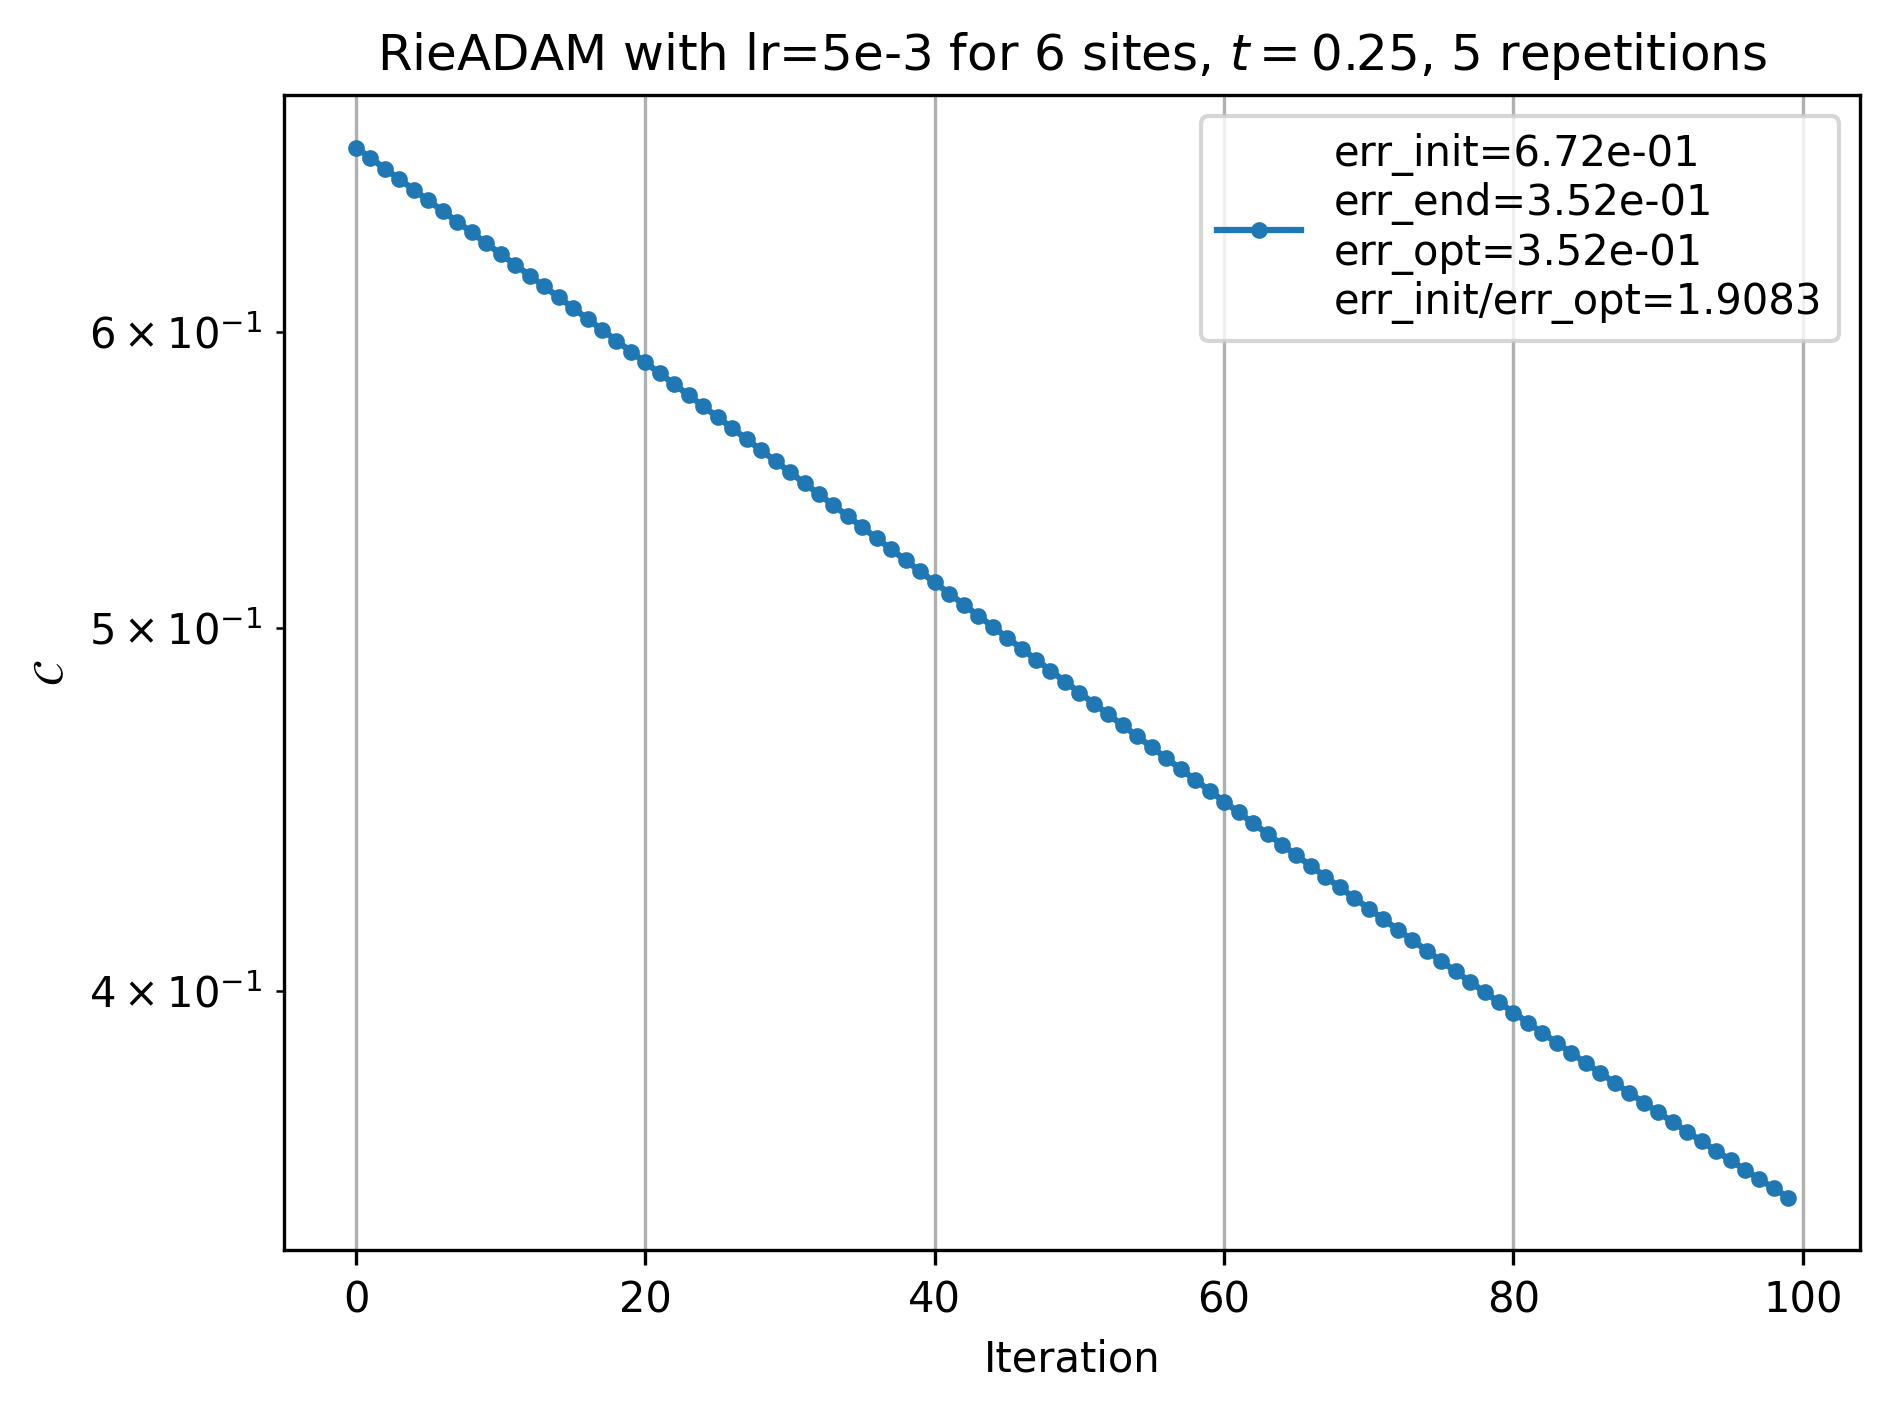

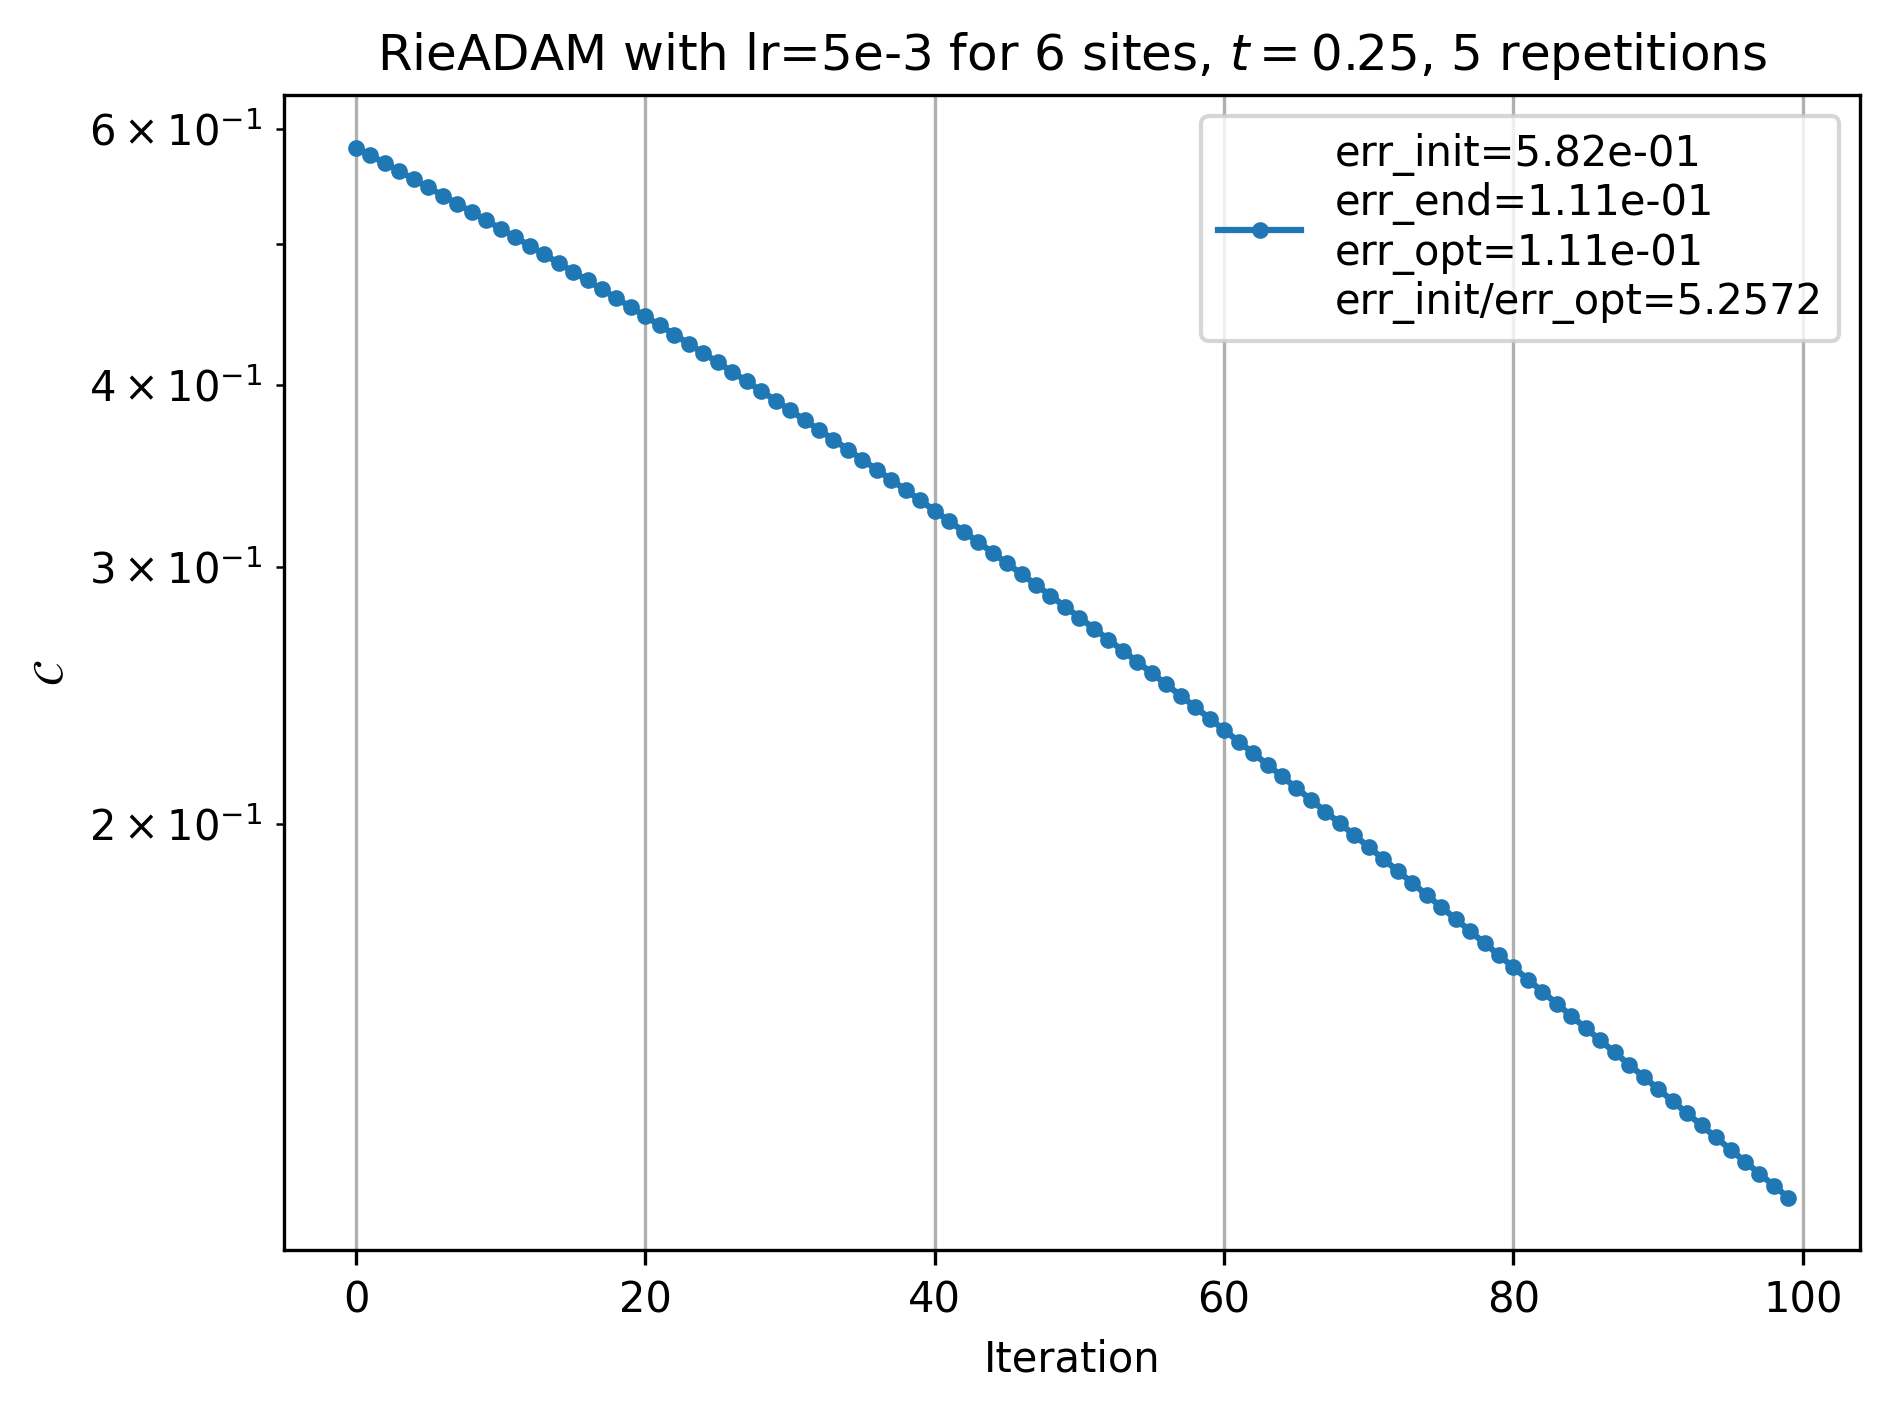

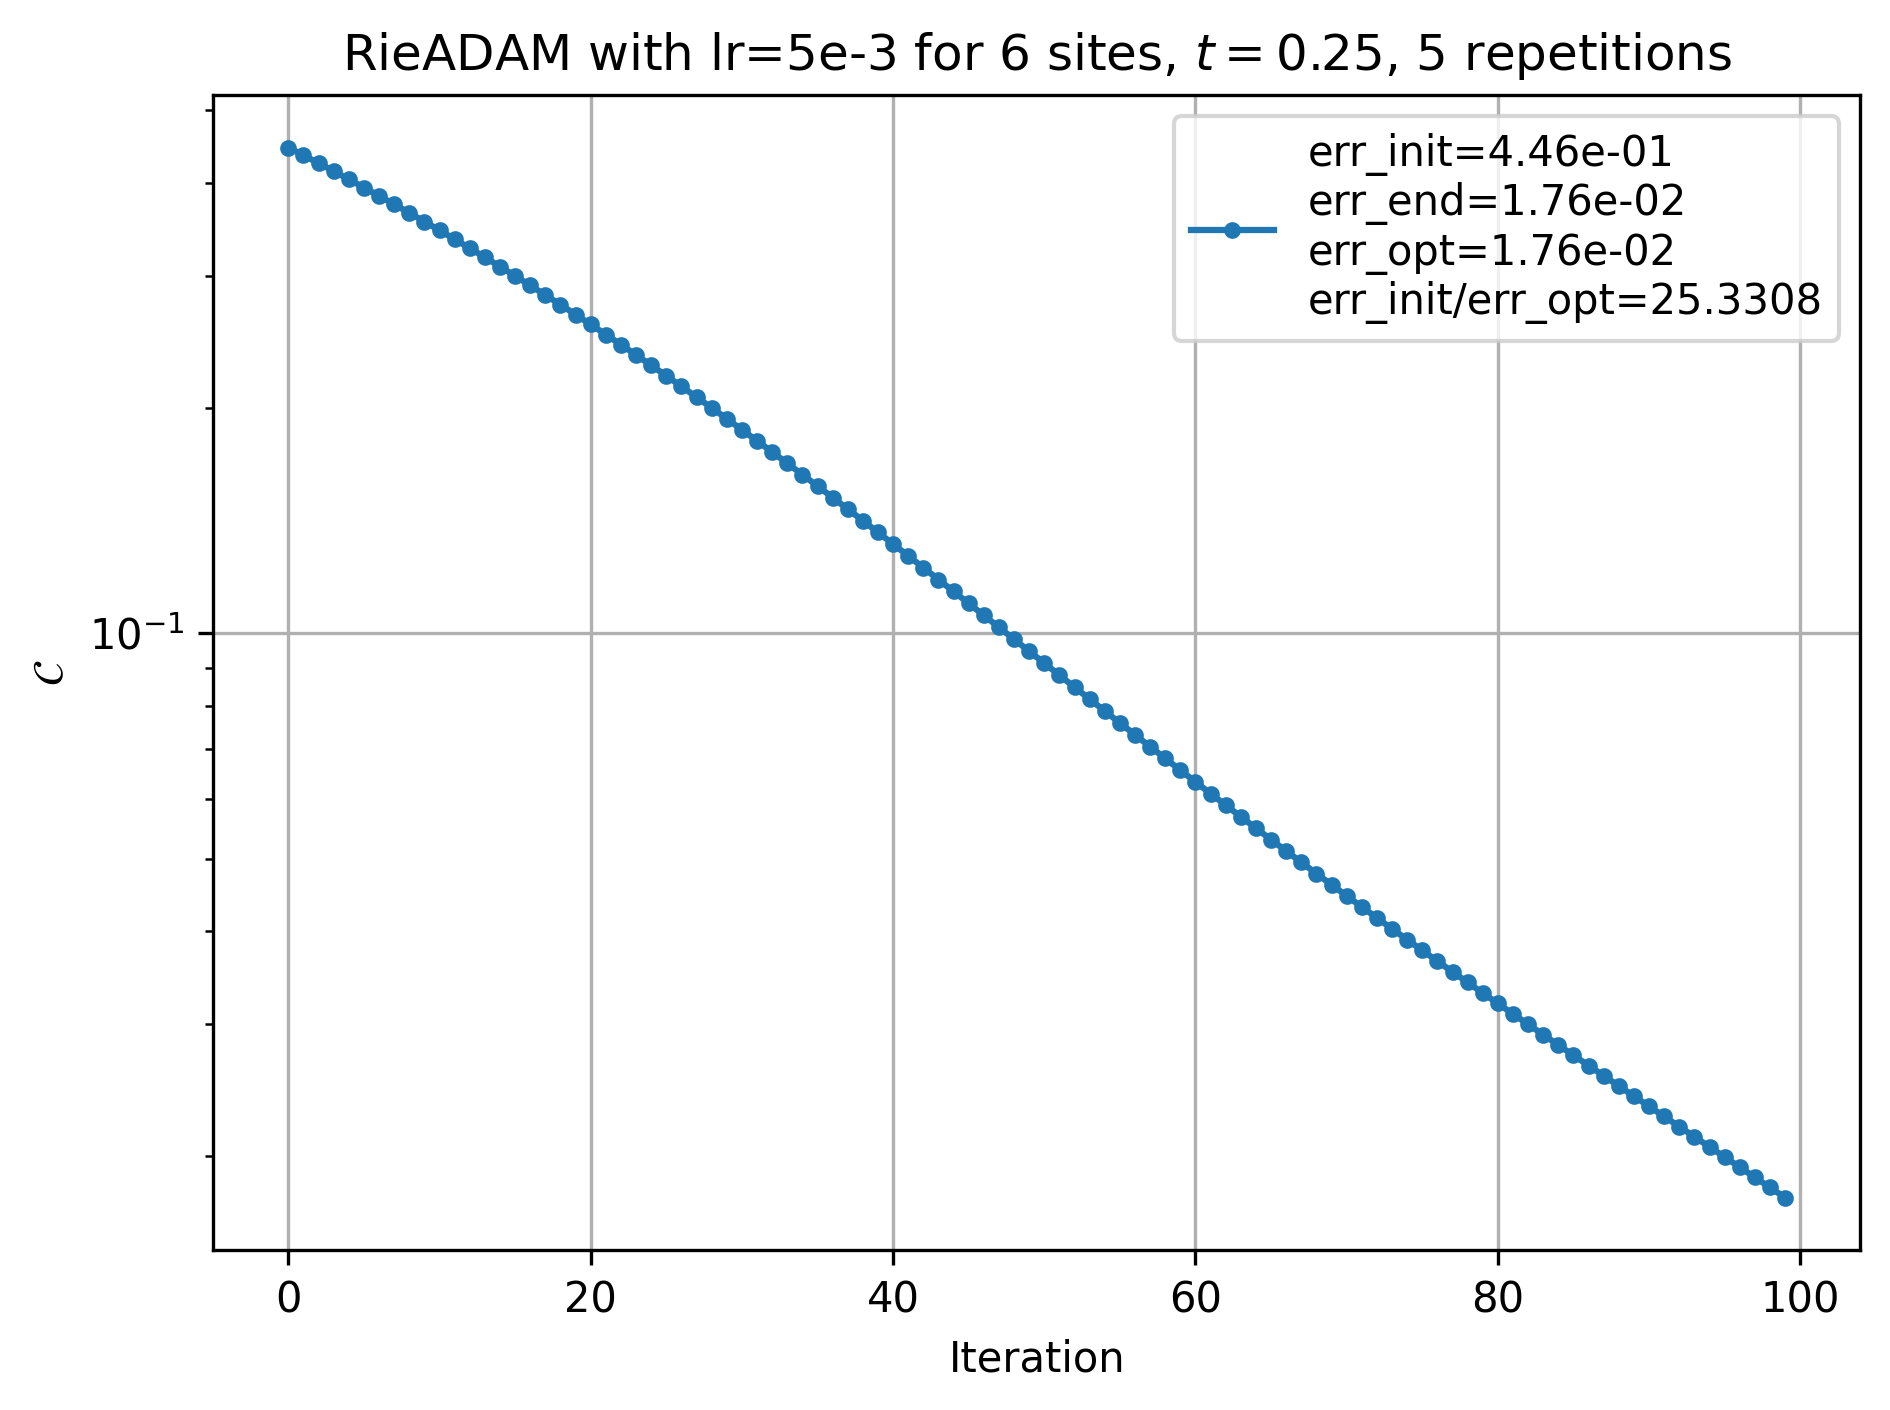

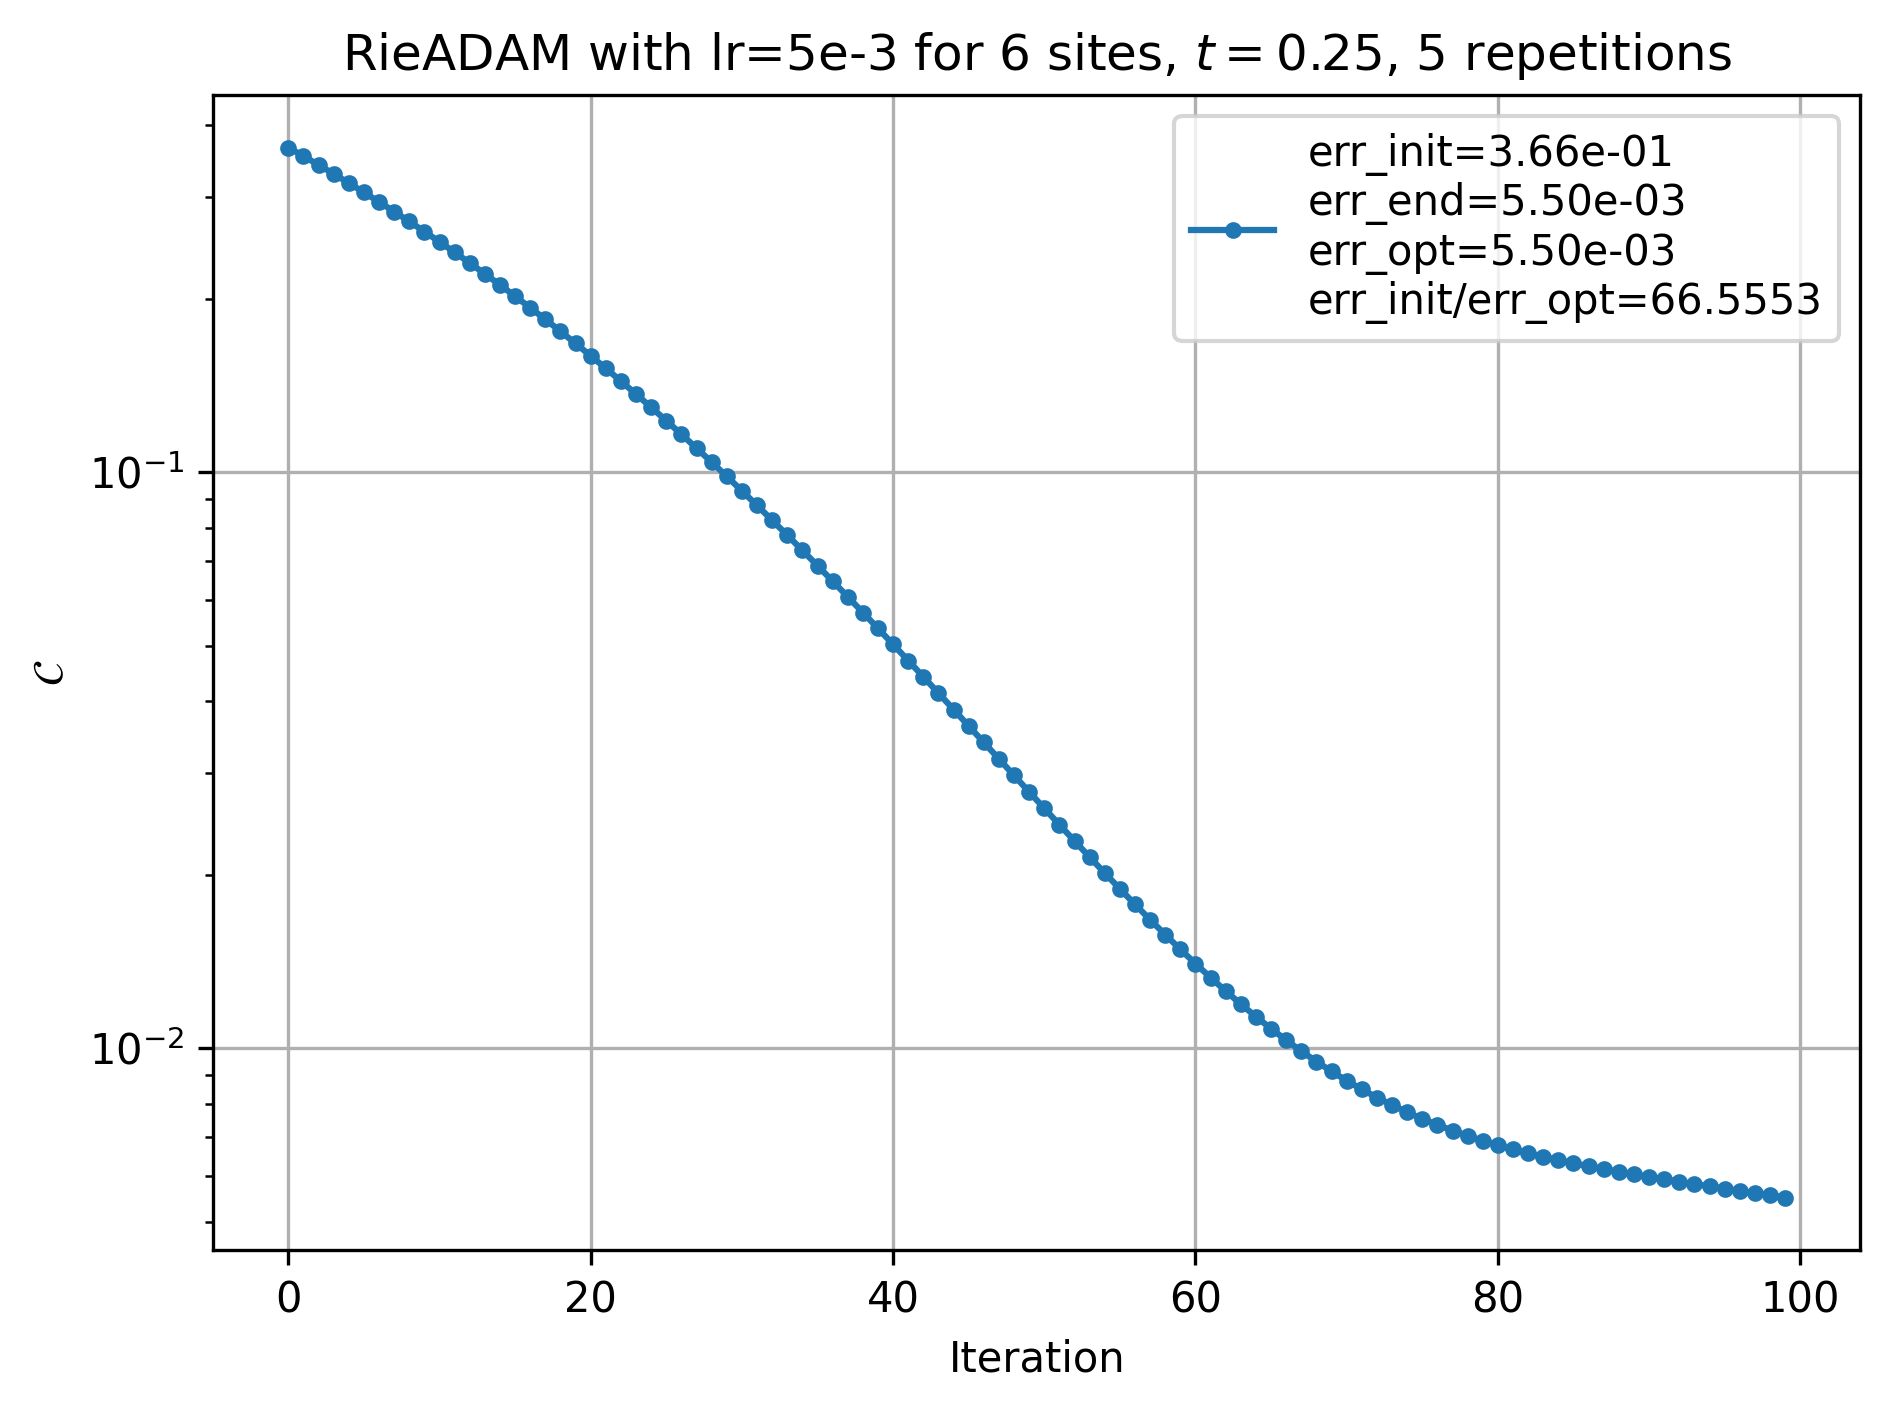

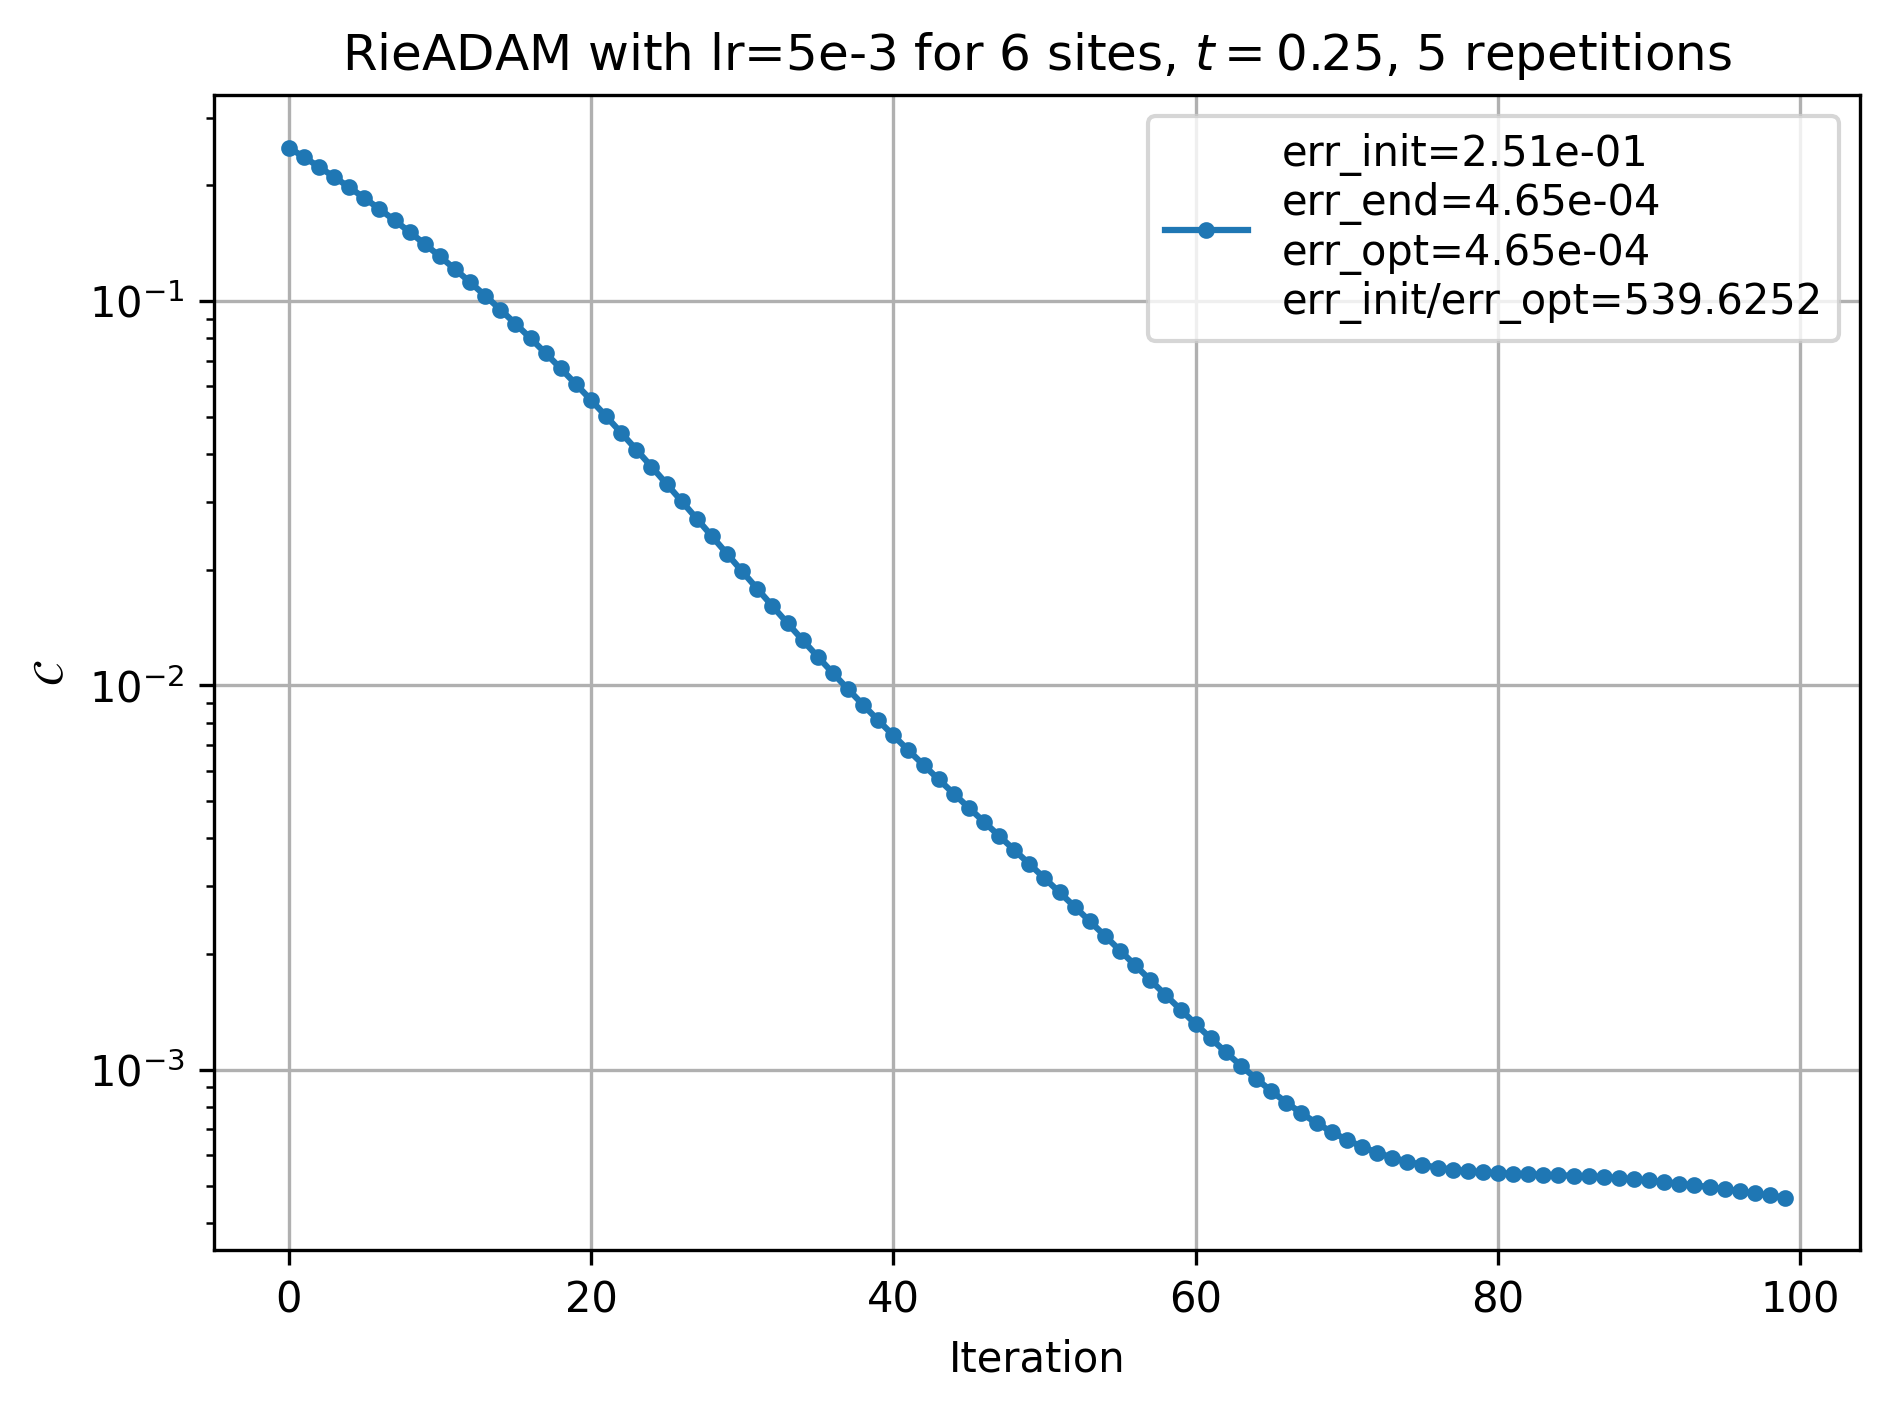

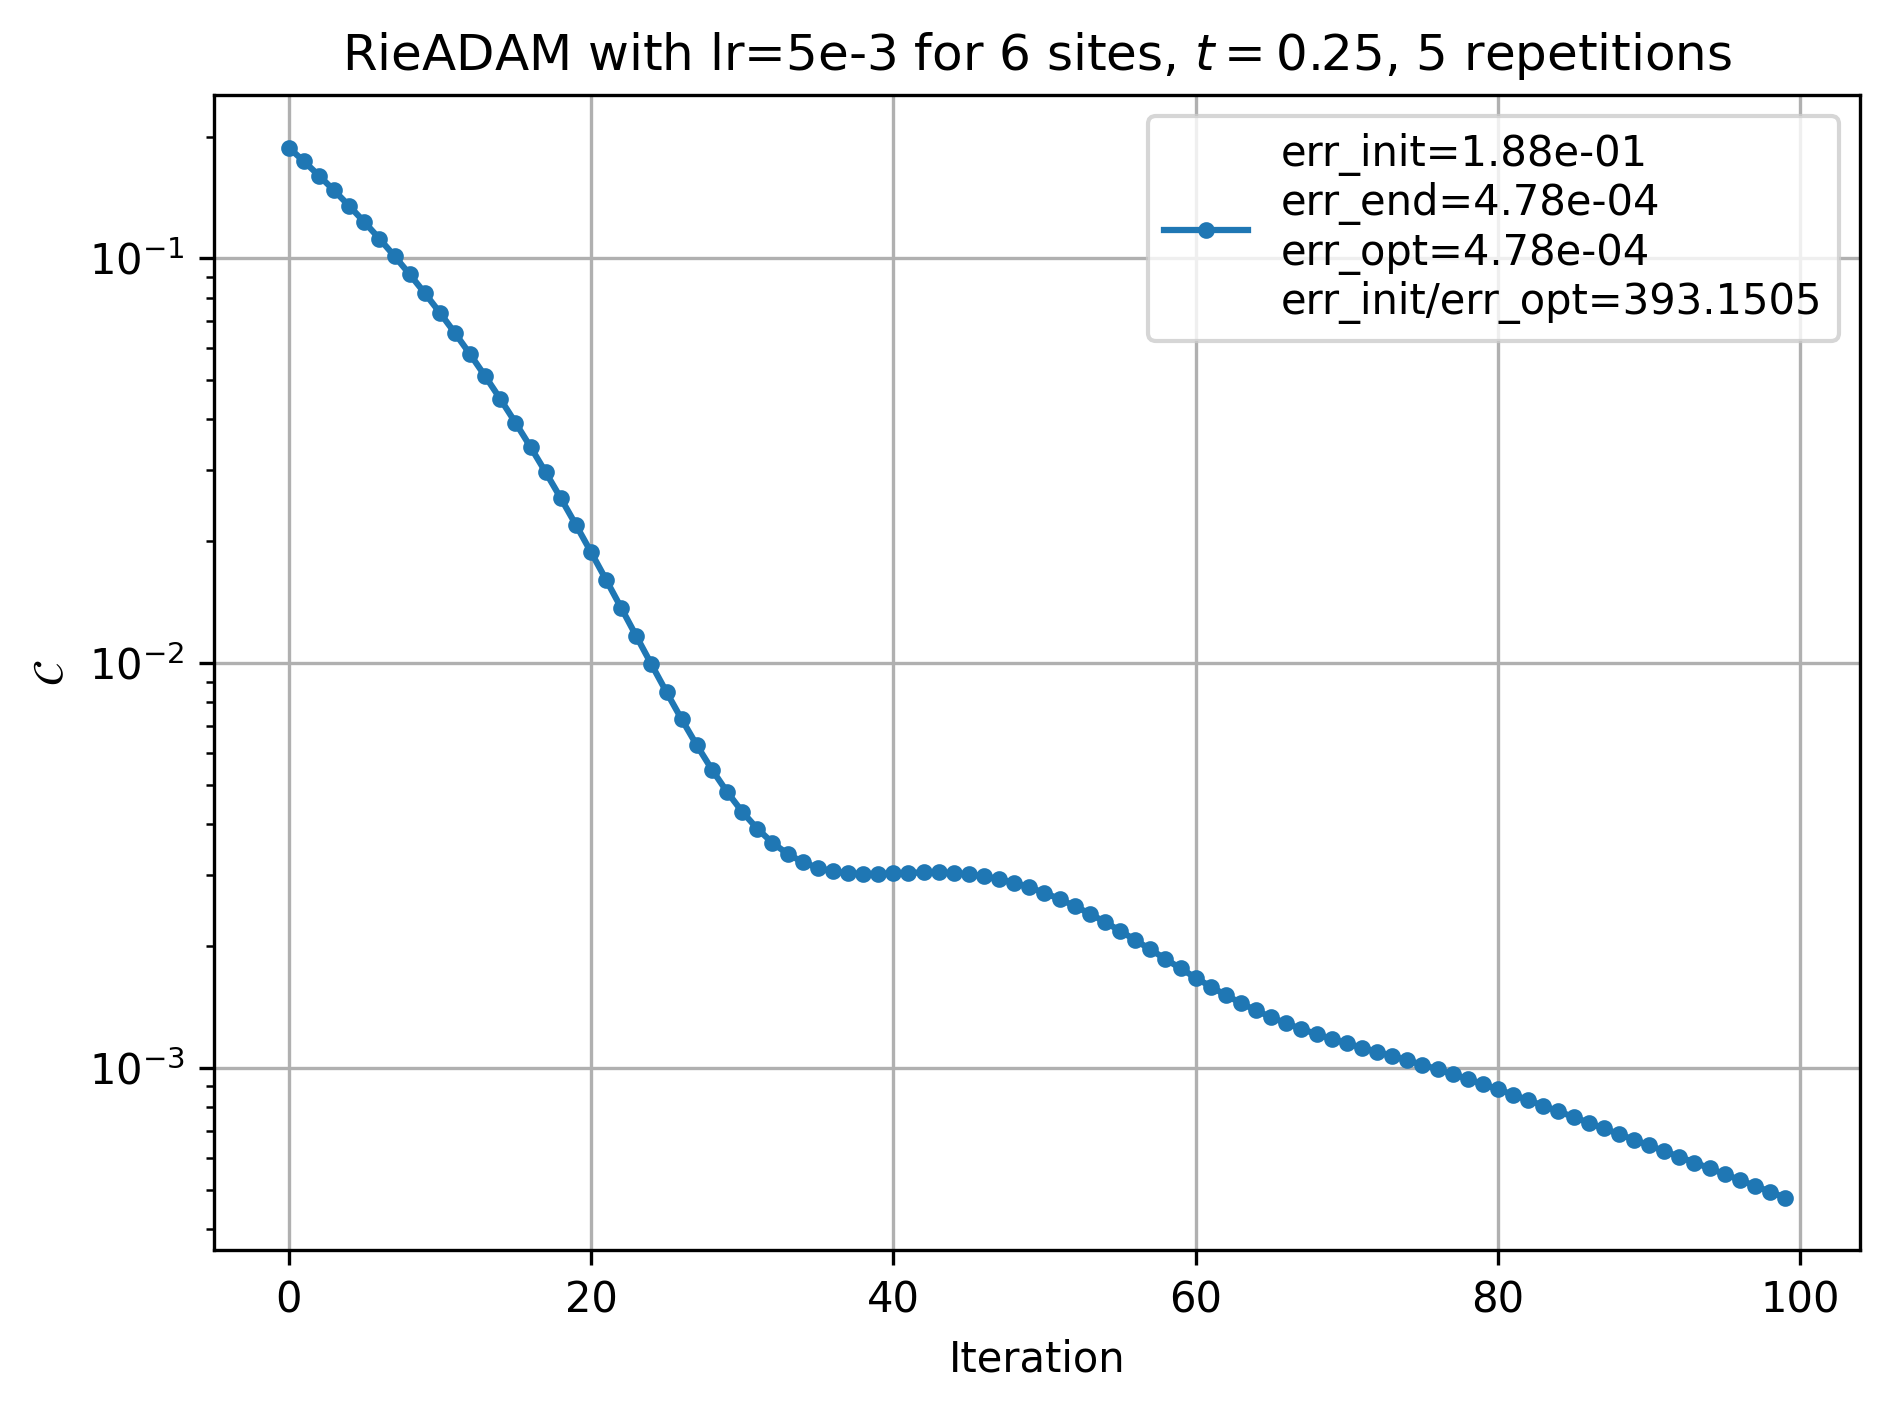

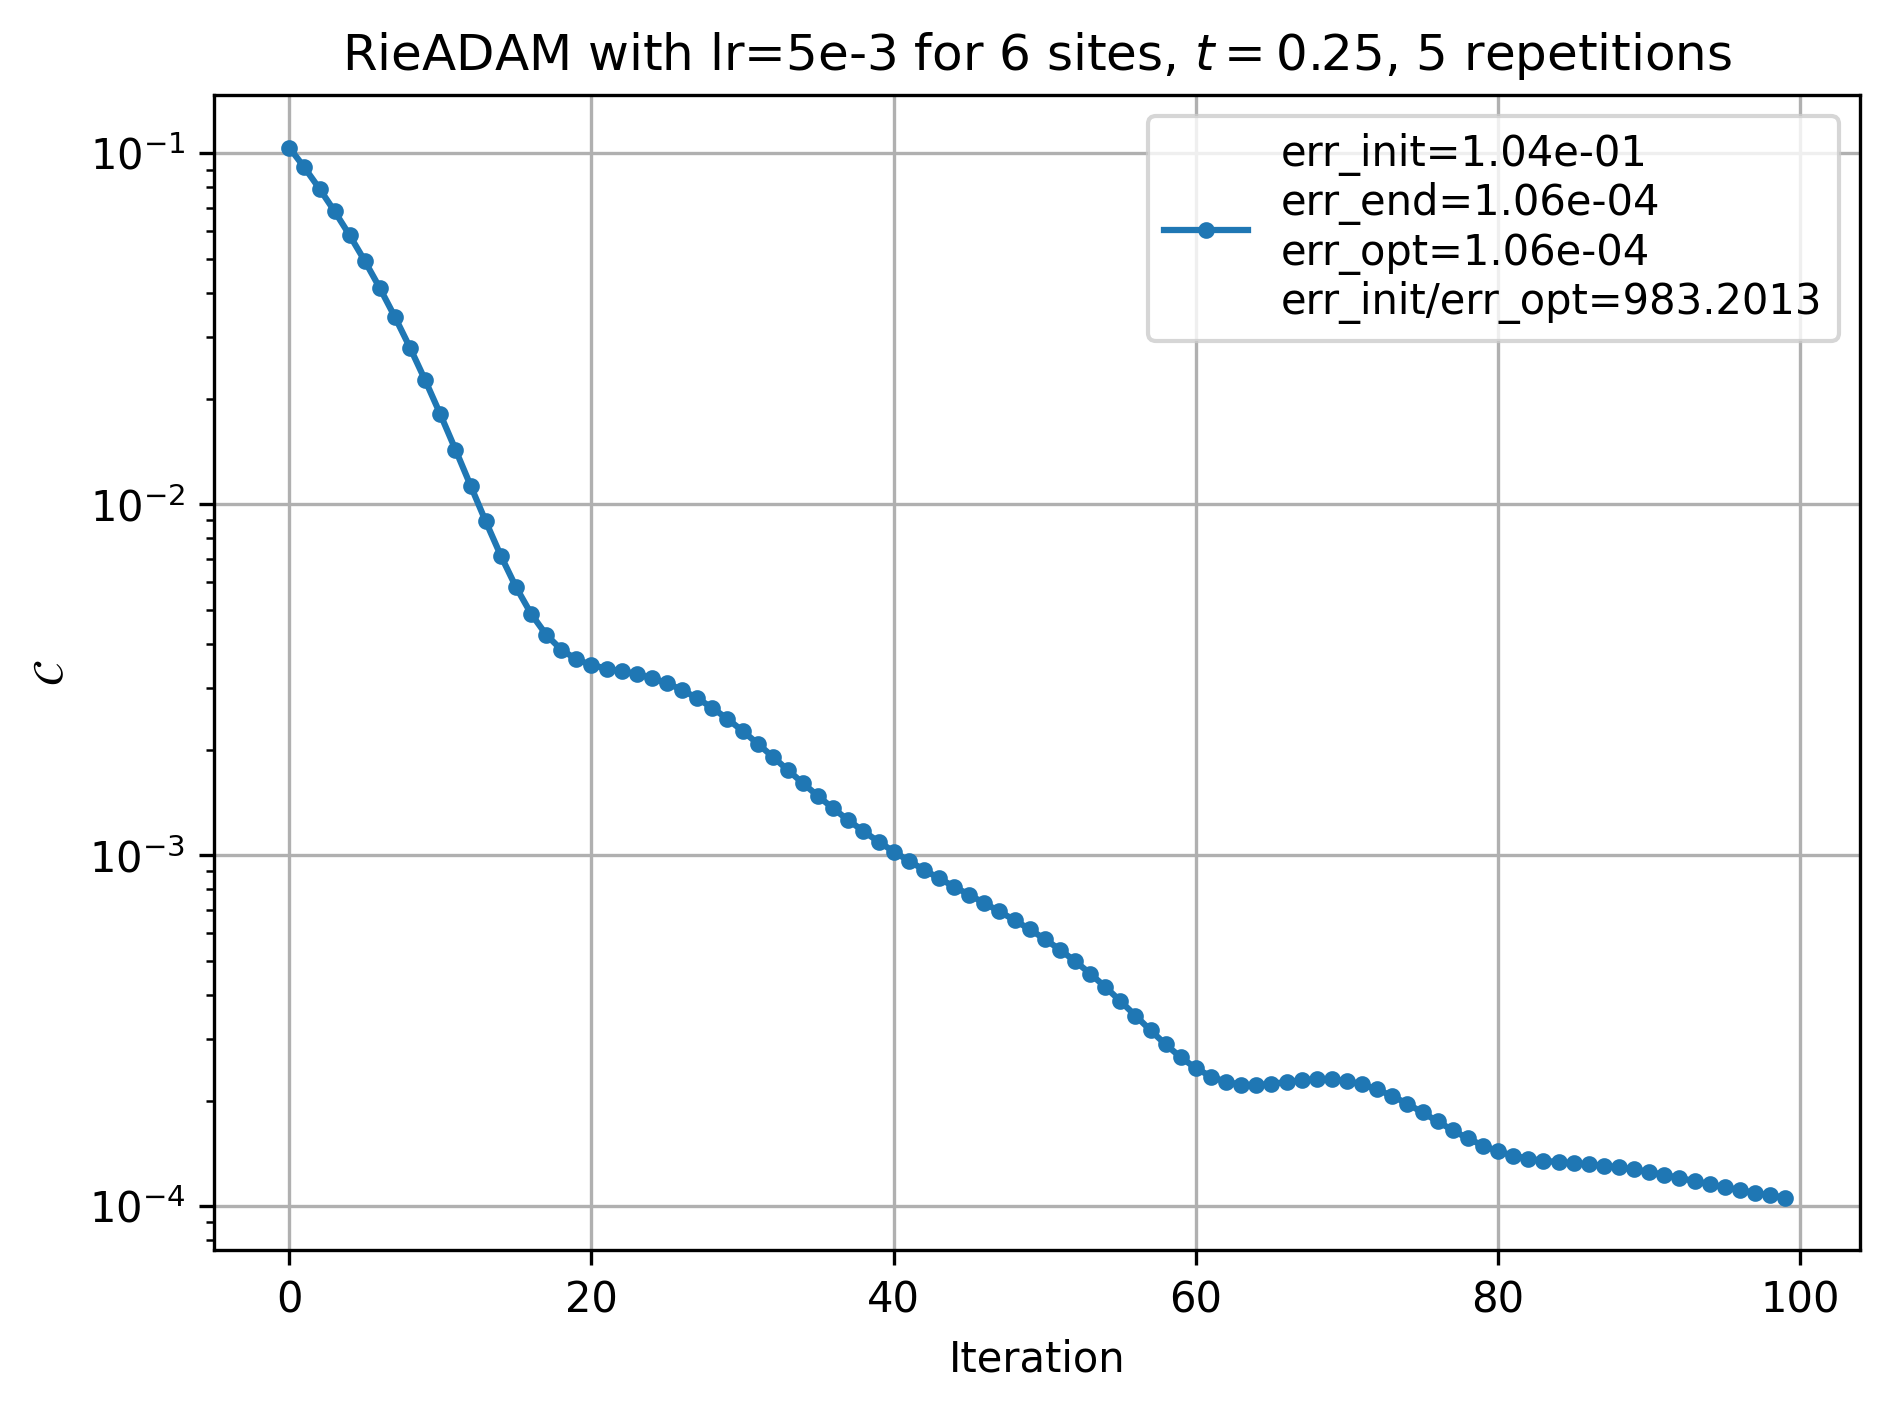

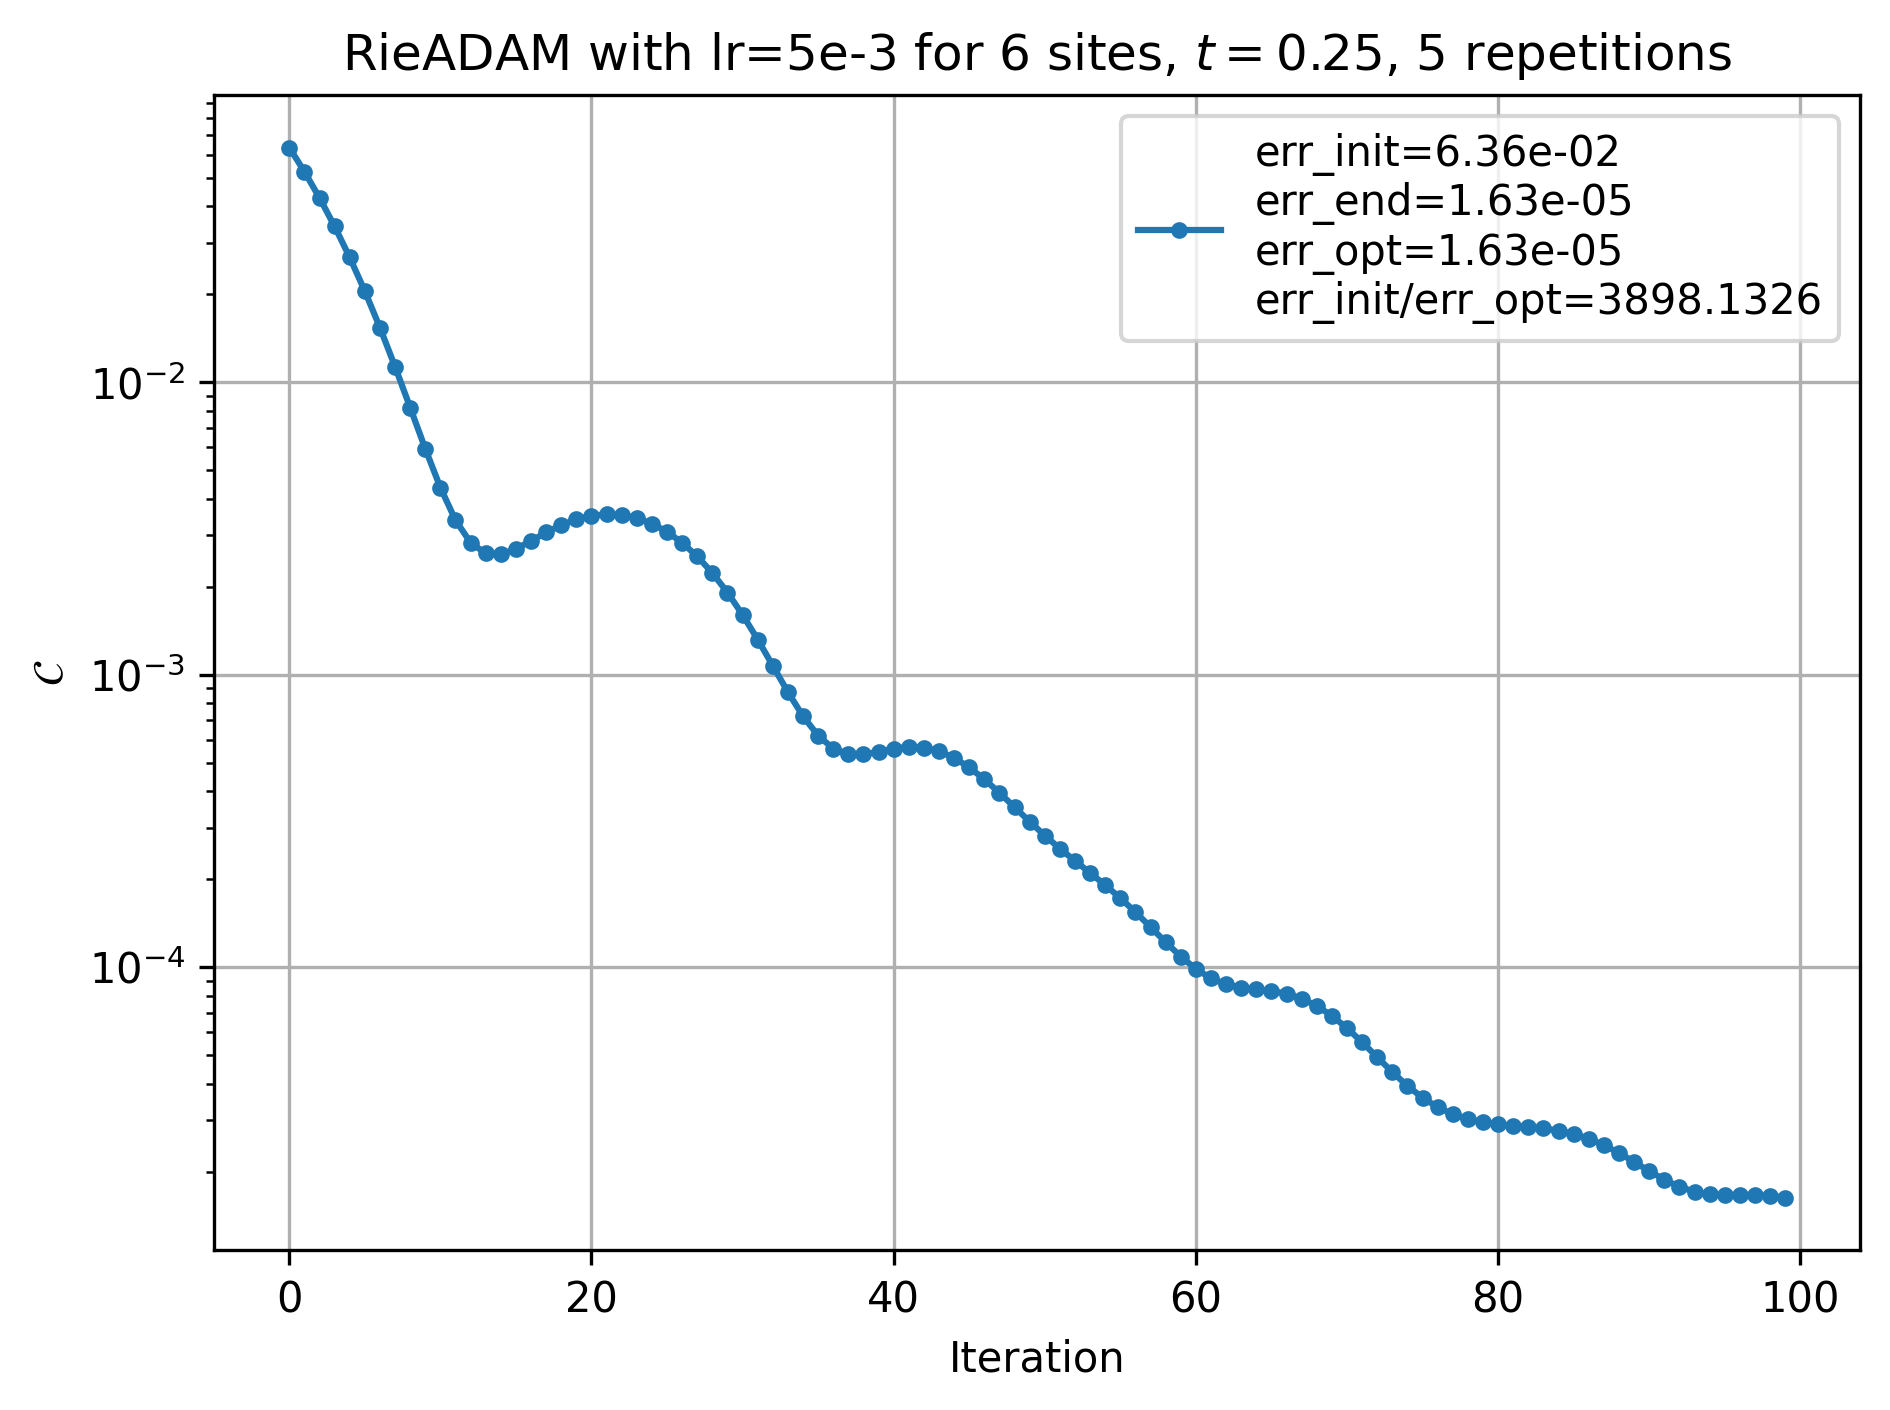

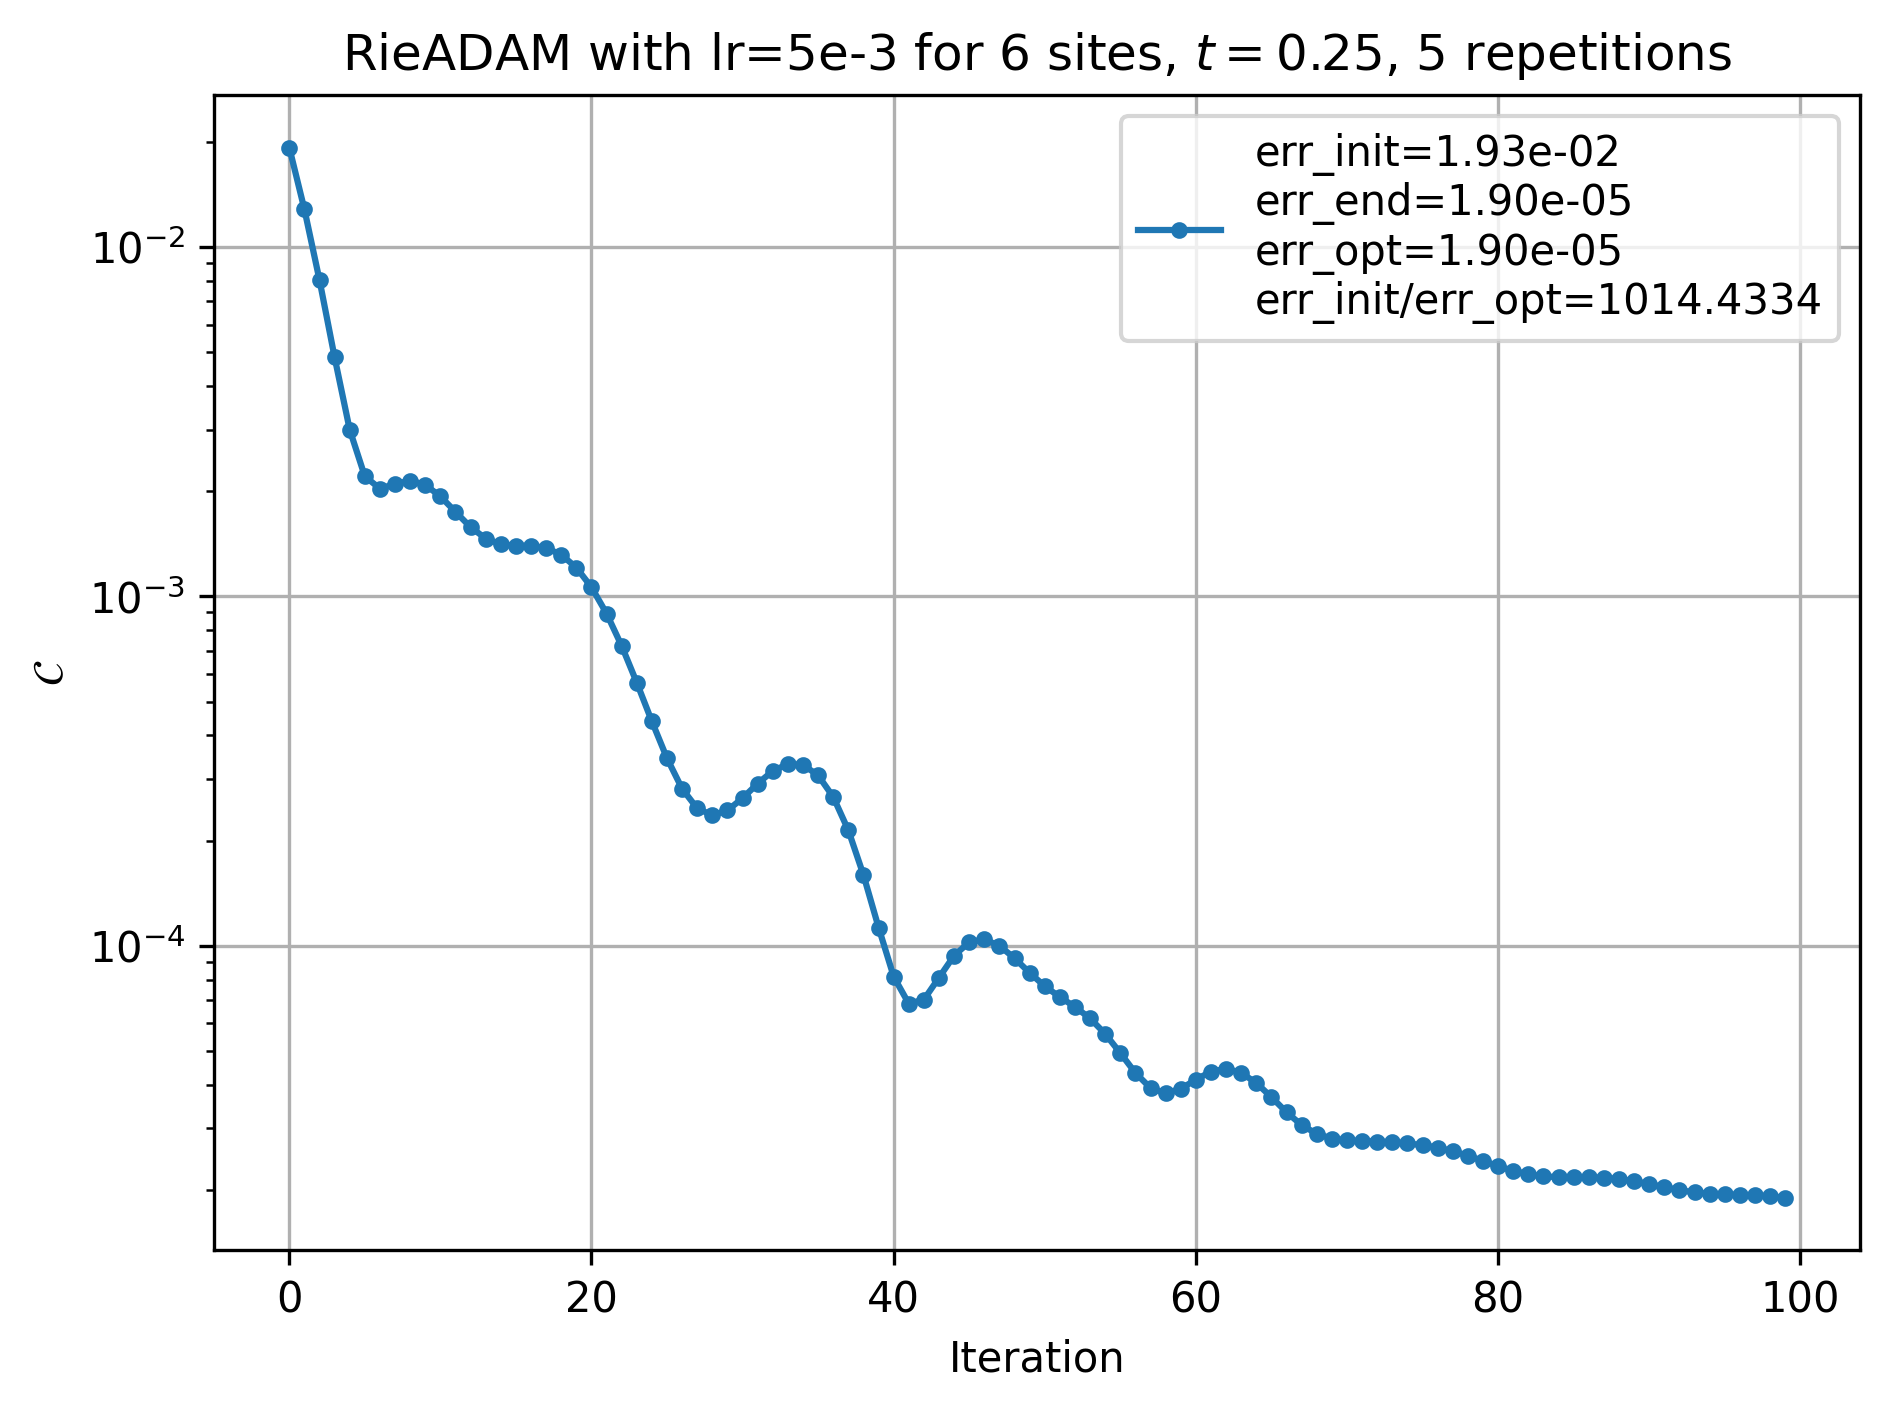

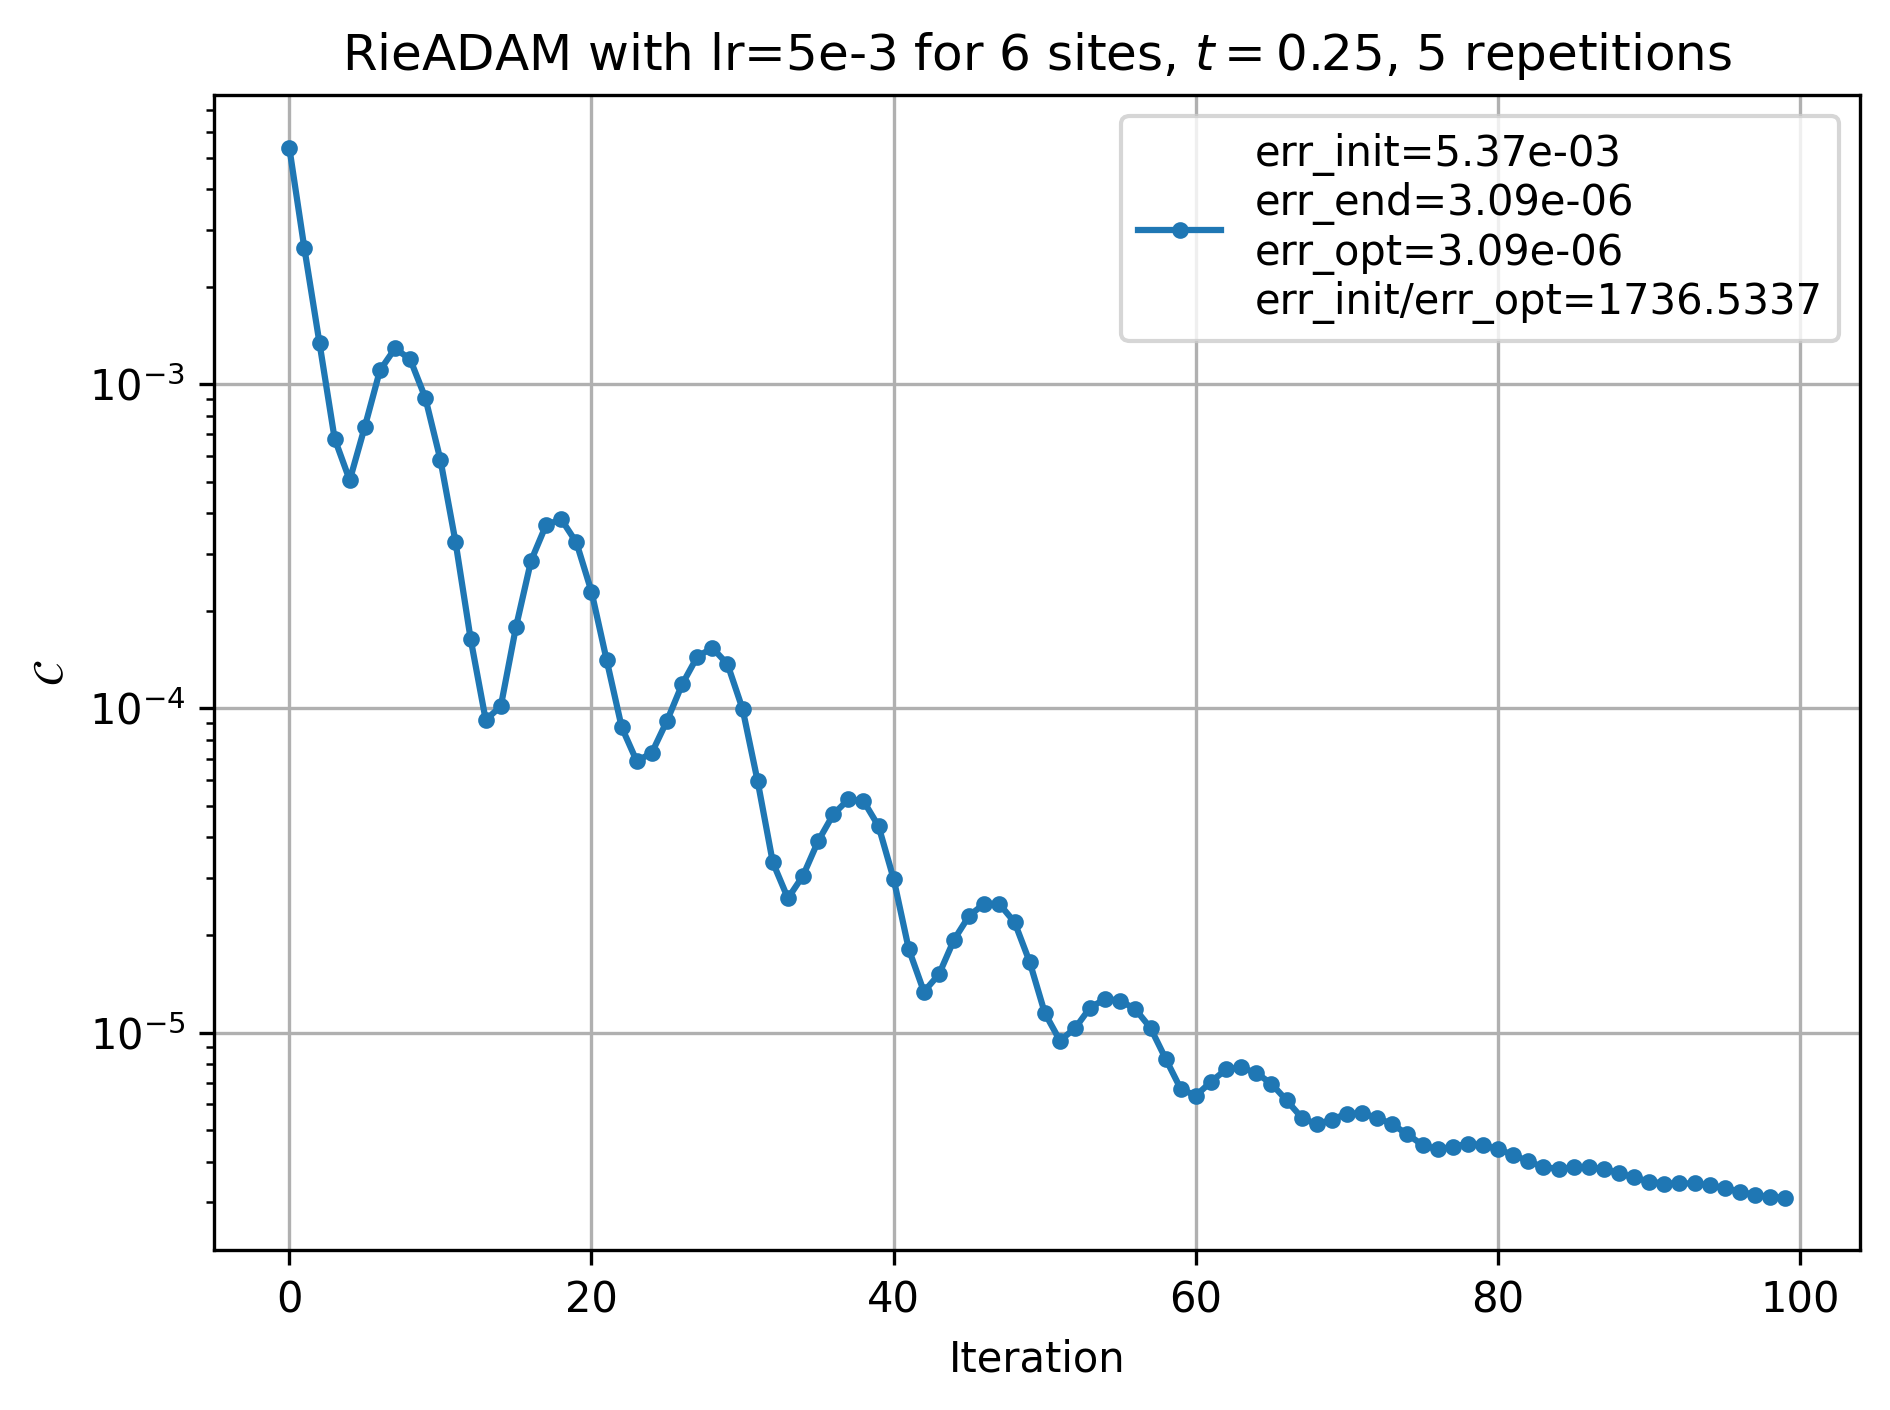

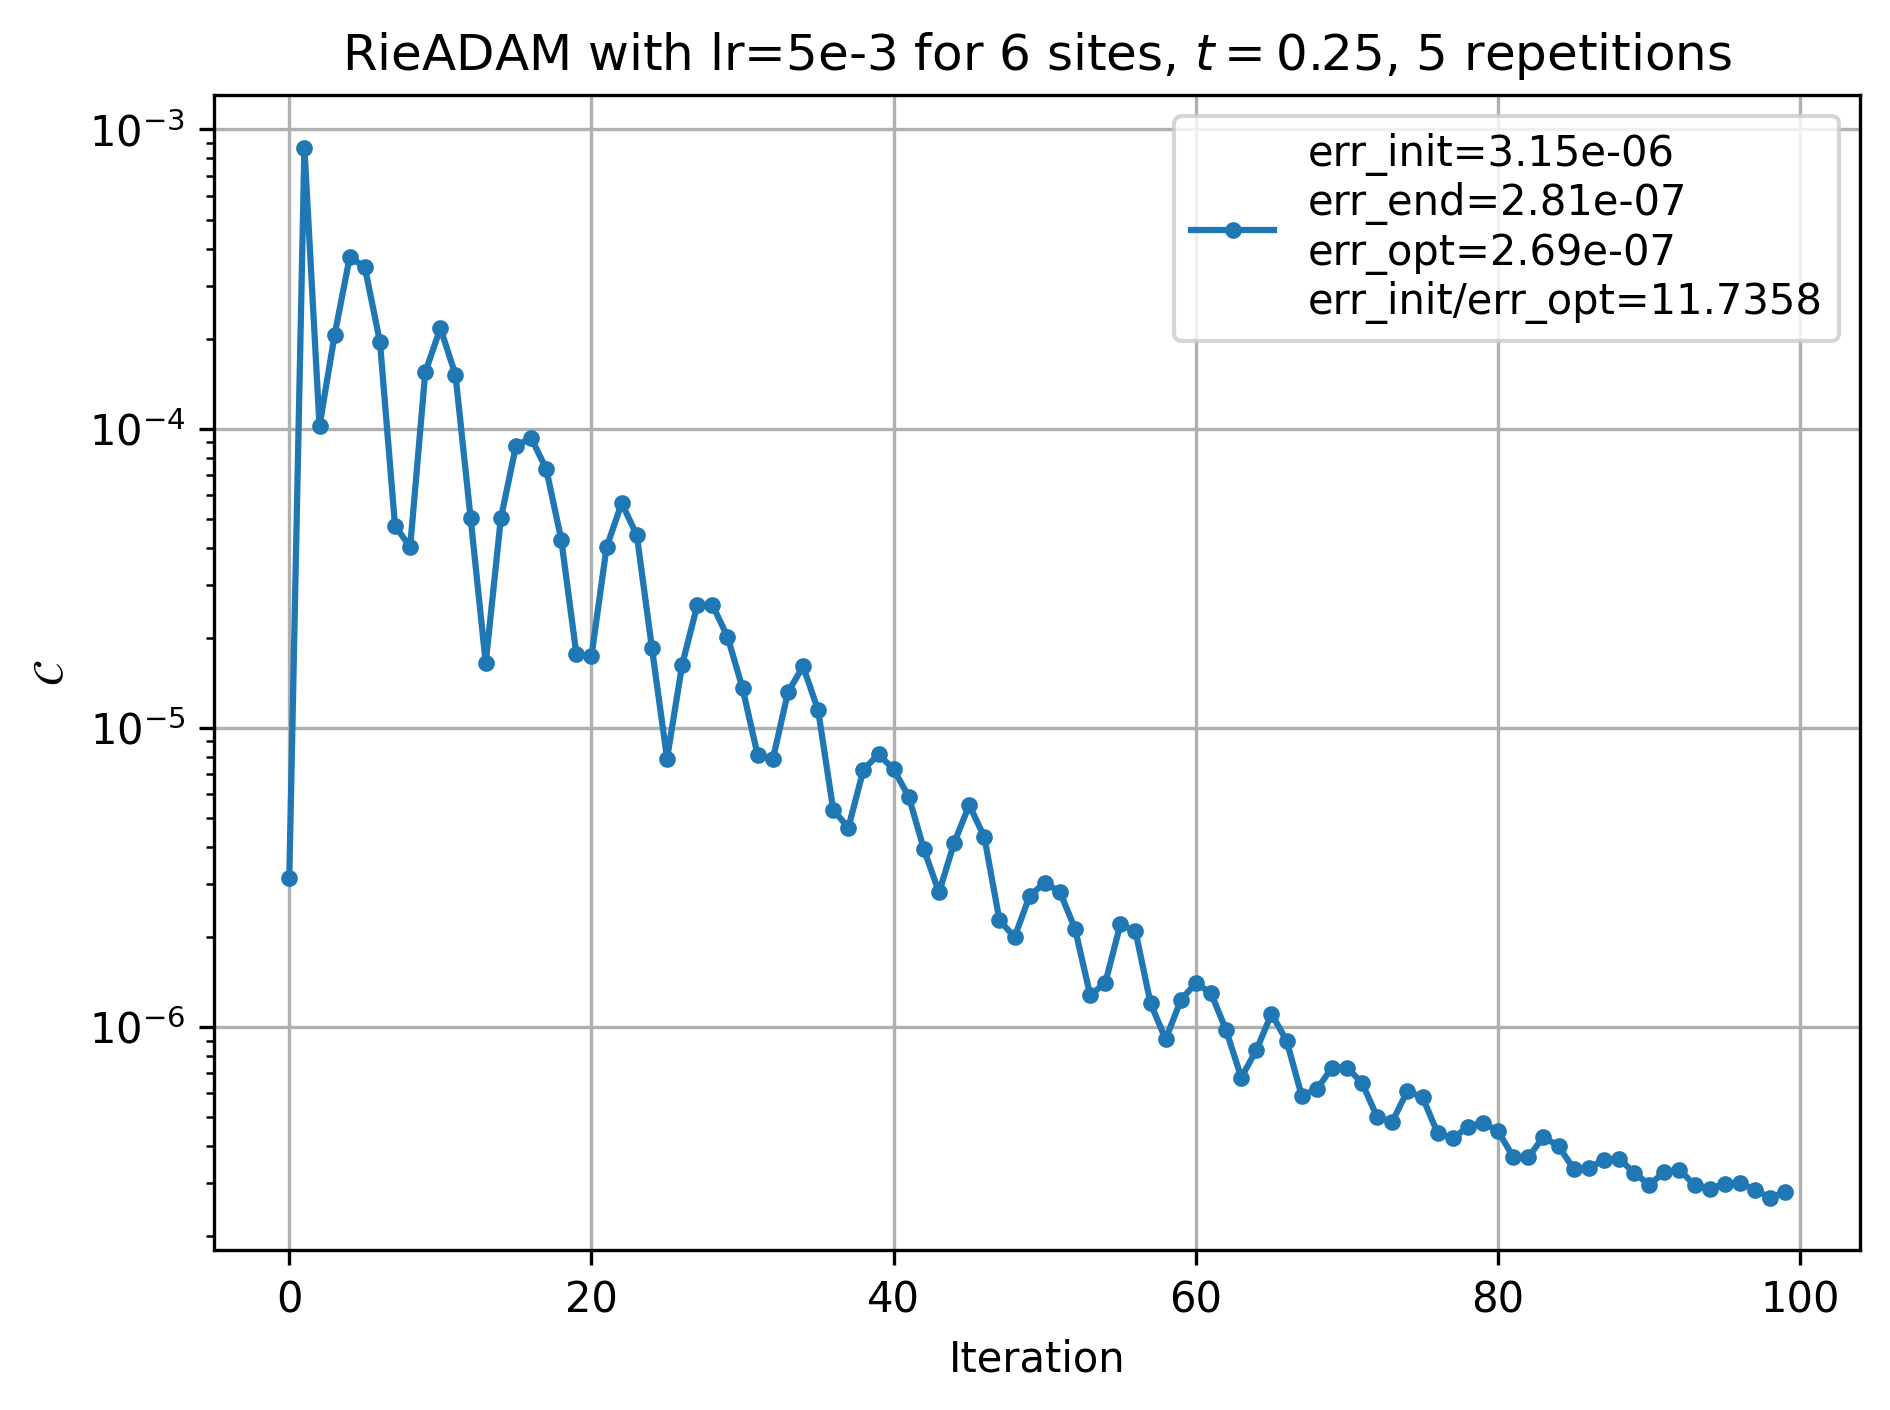

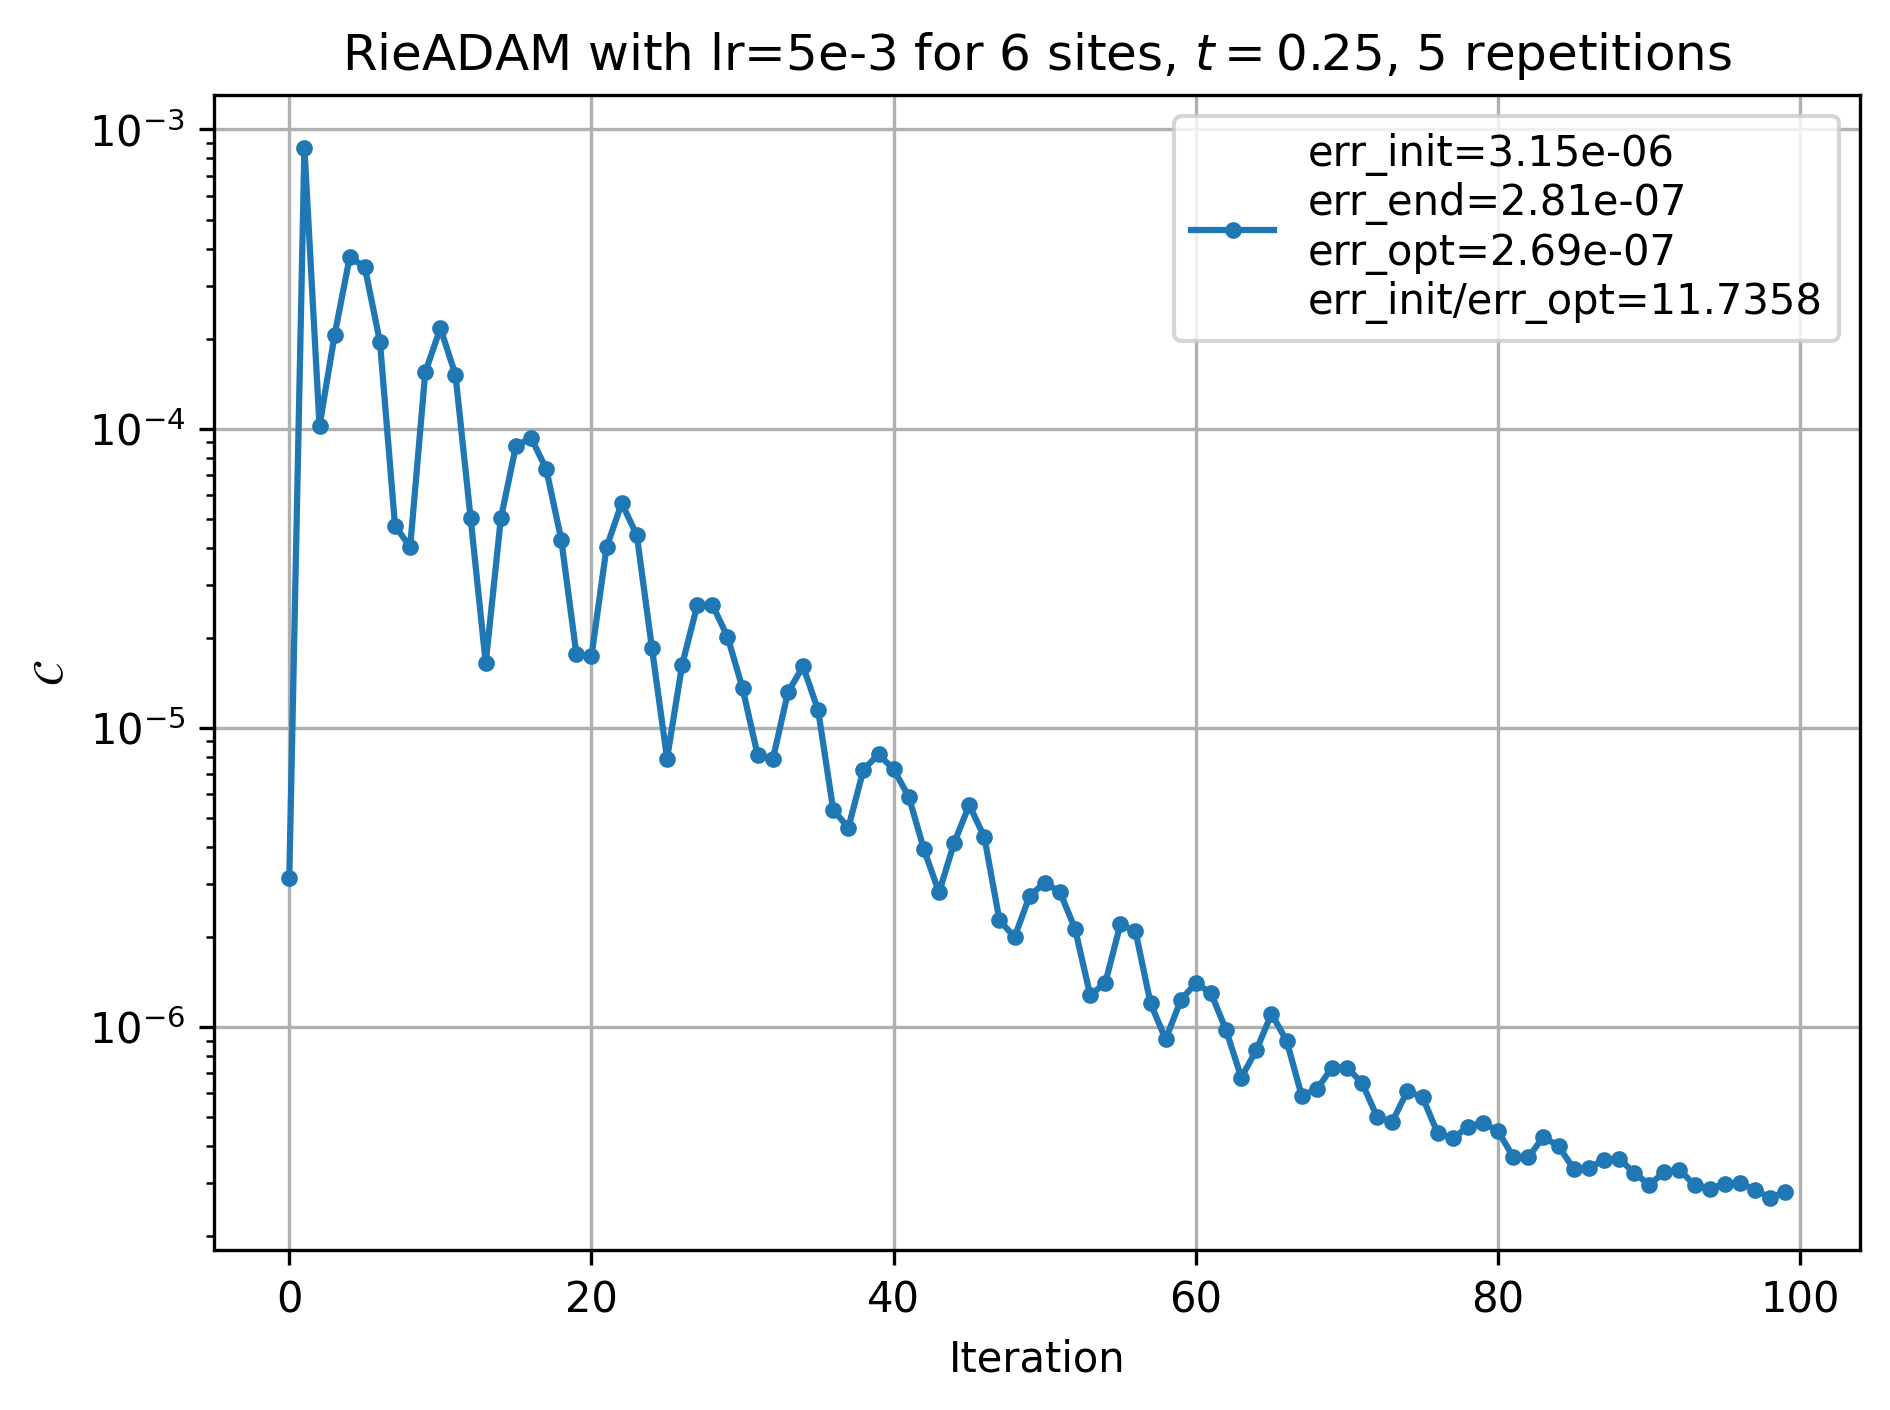

In [ ]:
N_vals = range(1,depth_h)

df_h, gates_optimised_reshaped_h = compress_HS(gates_h, config, U_ref, N_vals, qc_initial_h)

In [ ]:
import pandas as pd
file_path_fid = "/Users/aag/Documents/ropt-aqc/method_comparison/results/fidelities_le_heisenberg.csv"
data_fid = []

for _, row in df.iterrows():
    data_fid.append({
        "n_repetitions": n_repetitions,
        "t": t,
        "statevector_fidelity": row["statevector_fidelity"],
        "err_init/err_opt": row["err_init/err_opt"]
    })
df_fid = pd.DataFrame(data_fid)

df_fid.to_csv(file_path_fid, index=False, mode="a", header=False)


In [ ]:
import pandas as pd
# file_path = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_heisenberg_results.csv'
# file_path = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_heisenberg_results_1000.csv'
file_path_heisenberg = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_heisenberg_results_5_0.25.csv'


df_h.to_csv(file_path_heisenberg, index=False, header=True)
# df_h.to_csv(file_path_heisenberg, index=False, mode="a", header=False)


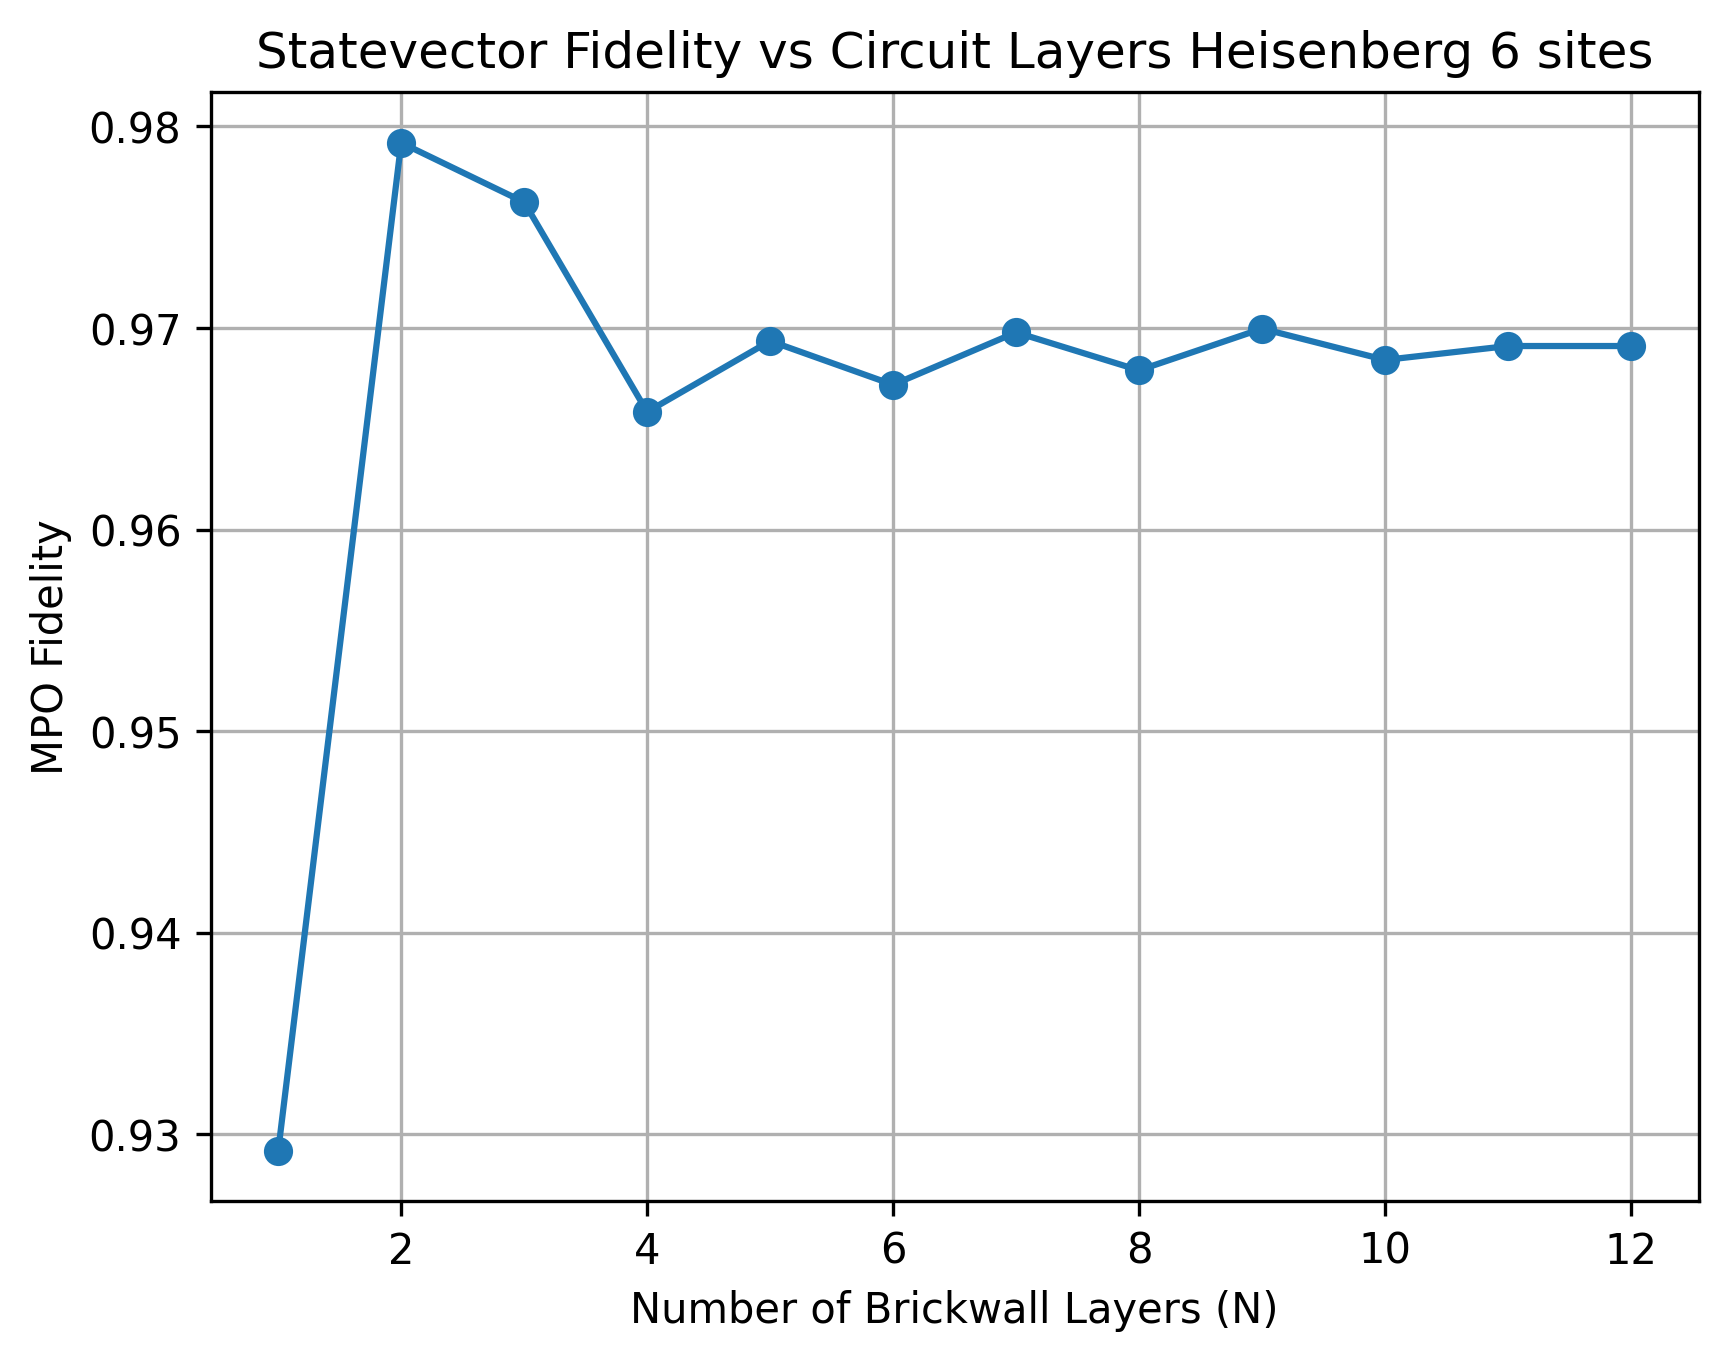

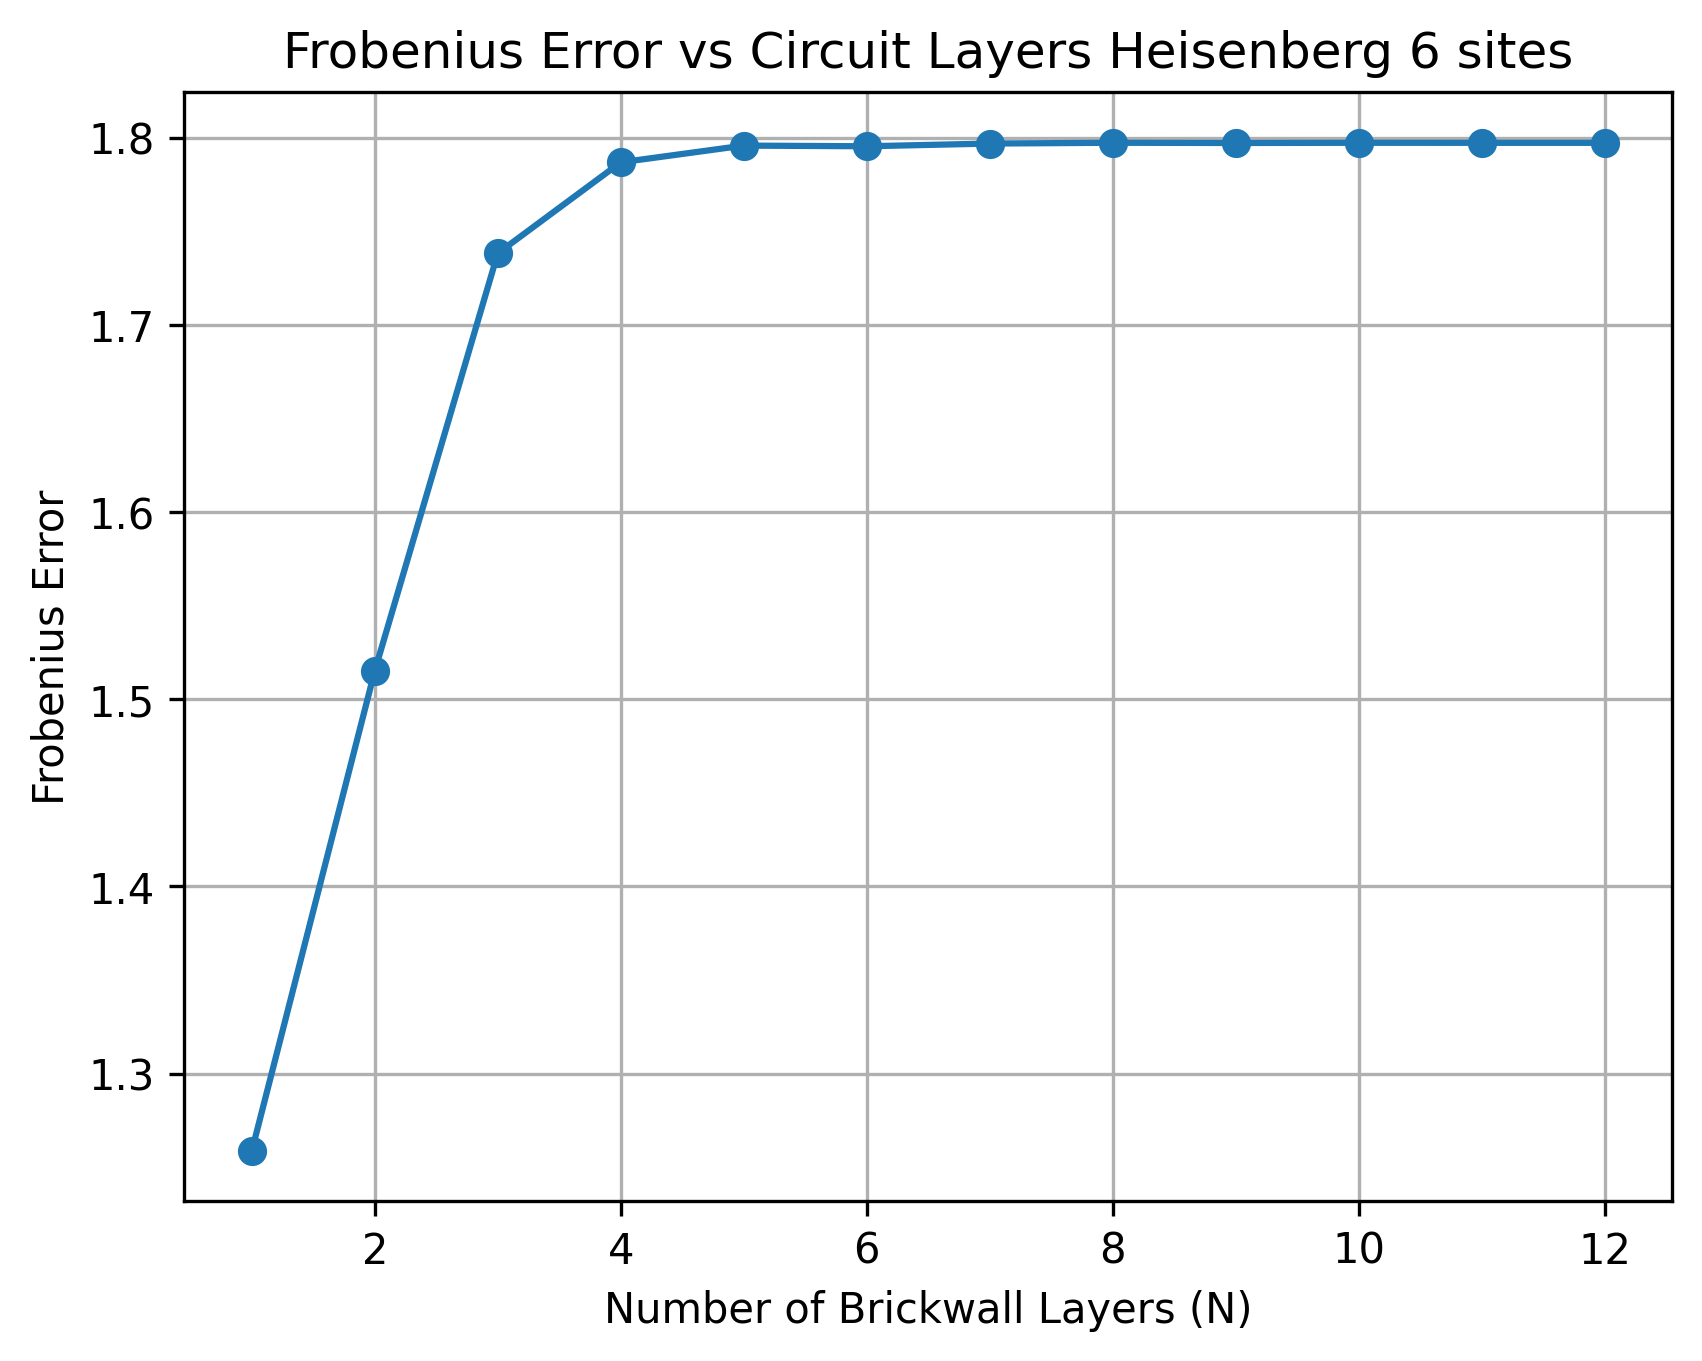

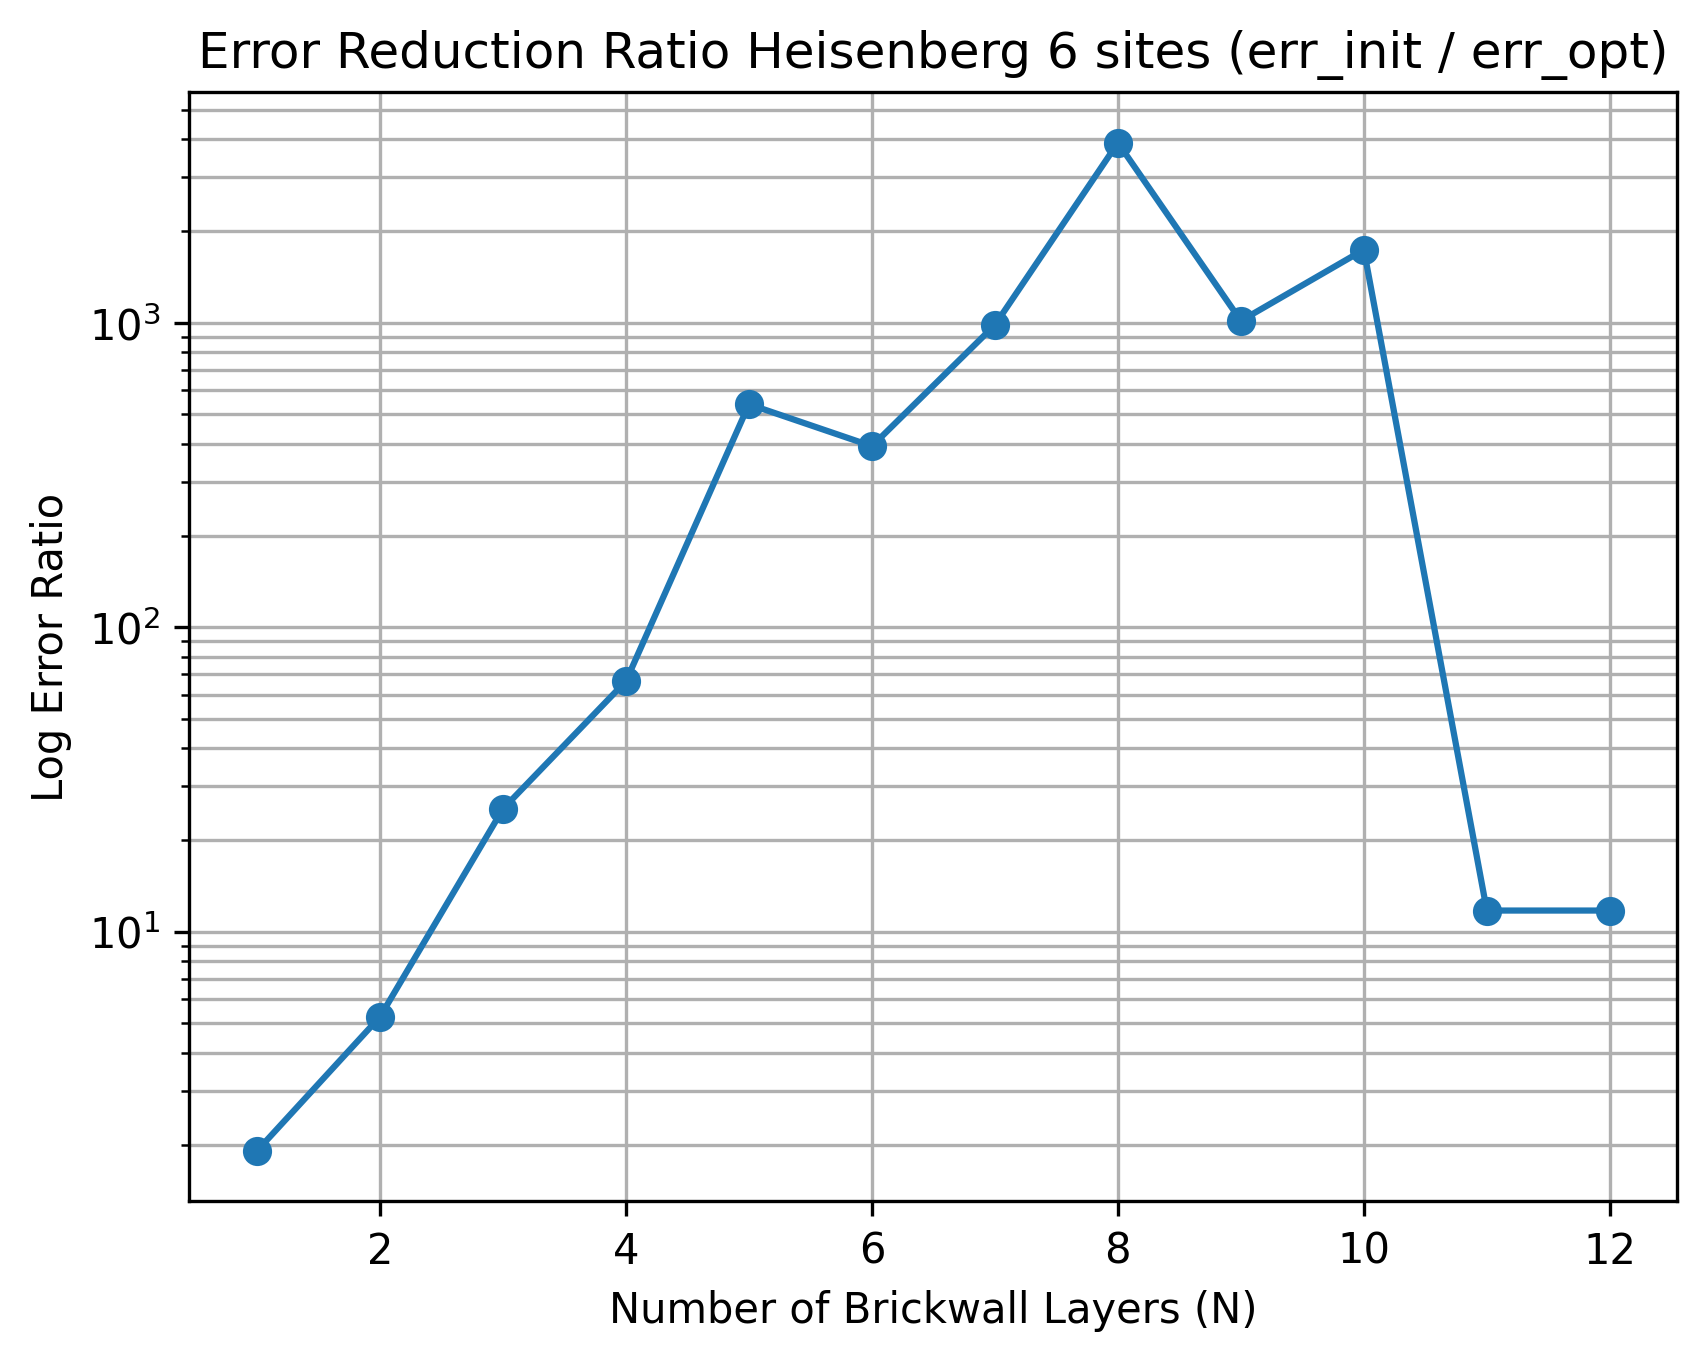

In [ ]:
import matplotlib.pyplot as plt
# file_path = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_heisenberg_results.csv'
# file_path = '/Users/aag/Documents/ropt-aqc/method_comparison/Le_heisenberg_results_1000.csv'

df_h = pd.read_csv(file_path_heisenberg)
# Plot MPO fidelity
plt.figure(dpi=300)
plt.plot(df_h['circuit_layers'], df_h['statevector_fidelity'], marker='o')
plt.title('Statevector Fidelity vs Circuit Layers Heisenberg 6 sites')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('MPO Fidelity')
plt.grid(True)
plt.show()

# Plot Frobenius Error
plt.figure(dpi=300)
plt.plot(df_h['circuit_layers'], df_h['frobenius_error'], marker='o')
plt.title('Frobenius Error vs Circuit Layers Heisenberg 6 sites')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('Frobenius Error')
plt.grid(True)
plt.show()

# Plot error ratio (log scale)
plt.figure(dpi=300)
plt.semilogy(df_h['circuit_layers'], df_h['err_init/err_opt'], marker='o')
plt.title('Error Reduction Ratio Heisenberg 6 sites (err_init / err_opt)')
plt.xlabel('Number of Brickwall Layers (N)')
plt.ylabel('Log Error Ratio')
plt.grid(True, which='both')
plt.show()

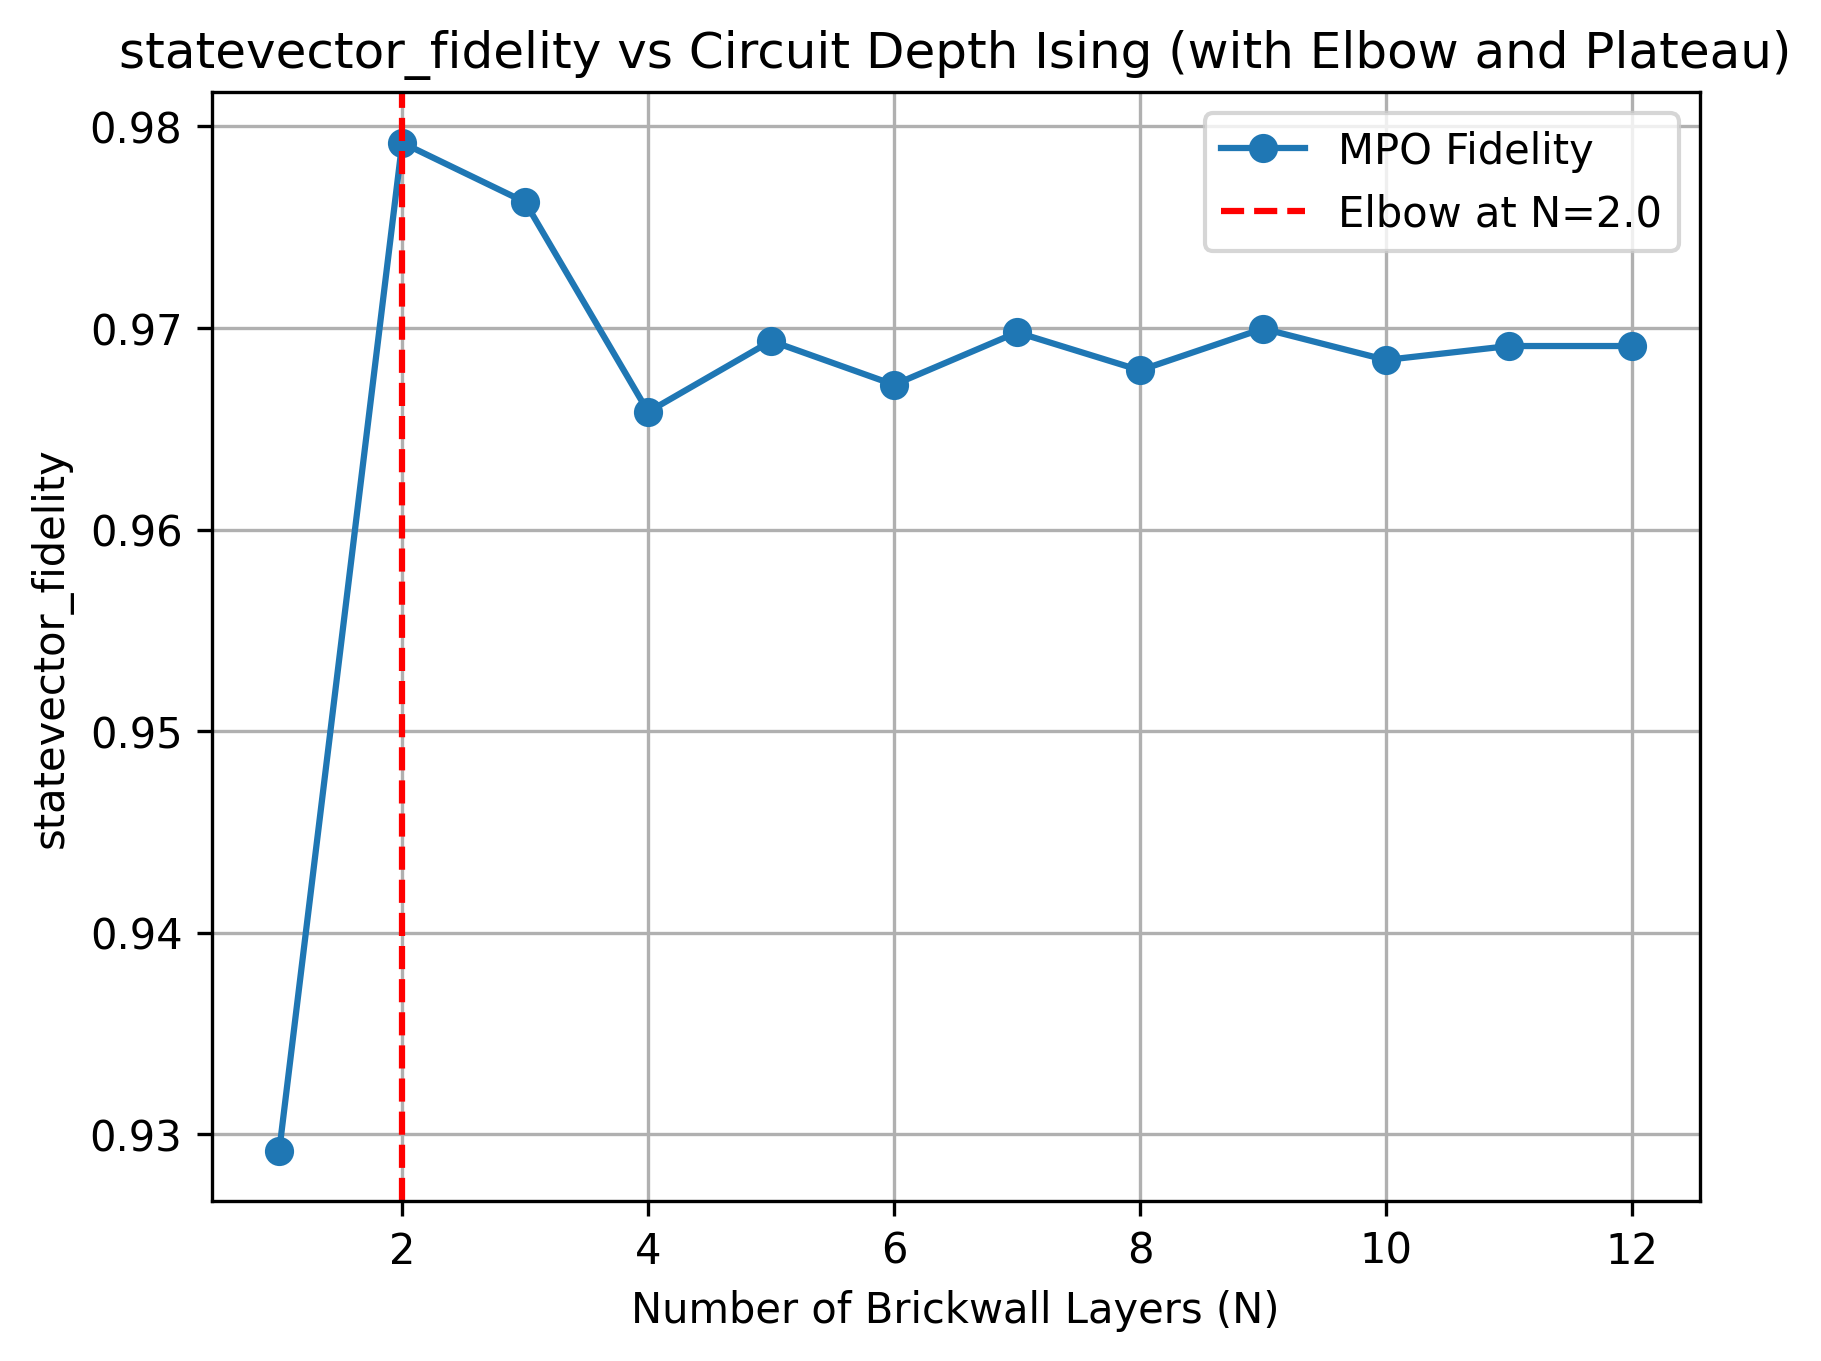


🔍 Suggested optimal compression depth: N = None


In [ ]:
from ropt_aqc.brickwall_opt import plot_fidelity

elbow_N_h, plateau_N_h = plot_fidelity(df_h, 'statevector_fidelity', t, 1e-3, method, system, save_path=True)